# The Usual stuff, IMPORTING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
# define a function where we pass the new width
# do load me

title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace'}

def Width(ax, new_width: float):
    
    """ 
    sets the width for the bar or bar type plots.
    ax: matplotlib axes
    new_width: width_size

    """ 
    for patch in ax.patches:
        current_width = patch.get_width()
        difference = current_width - new_width

        # set new width
        patch.set_width(new_width)

        # Now Recenter the Bars
        patch.set_x(patch.get_x() + difference * .5)

In [ ]:
# read the data, prop_data stands for property_data

# prop_data = pd.read_csv("/content/drive/MyDrive/Dataset/bd_housing_data/property_listing_data_in_Bangladesh.csv")
prop_data = pd.read_csv("/content/drive/MyDrive/Dataset/bd_housing_data/property_listing_data_in_Bangladesh_new.csv")
prop_data.head(5)

title beds bath        area  \
0  Eminent Apartment Of 2200 Sq Ft Is Vacant For ...   3    4   2,200 sqft   
1  Apartment Ready To Rent In South Khulshi, Near...   3    4   1,400 sqft   
2  Smartly priced 1950 SQ FT apartment, that you ...   3    4   1,950 sqft   
3  2000 Sq Ft Residential Apartment Is Up For Ren...   3    3   2,000 sqft   
4  Strongly Structured This 1650 Sq. ft Apartment...   3    4   1,650 sqft   

                               adress       type   purpose  \
0     Block A, Bashundhara R-A, Dhaka  Apartment  For Rent   
1  South Khulshi, Khulshi, Chattogram  Apartment  For Rent   
2     Block F, Bashundhara R-A, Dhaka  Apartment  For Rent   
3             Sector 9, Uttara, Dhaka  Apartment  For Rent   
4     Block I, Bashundhara R-A, Dhaka  Apartment  For Rent   

                                            flooPlan  \
0  https://images-cdn.bproperty.com/thumbnails/10...   
1  https://images-cdn.bproperty.com/thumbnails/44...   
2  https://images-cdn.bproperty.com/thumbnails/11...   
3  https://images-cdn.bproperty.com/thumbnails/14...   
4  https://images-cdn.bproperty.com/thumbnails/10...   

                                                 url        lastUpdated  \
0  https://www.bproperty.com/en/property/details-...    August 13, 2022   
1  https://www.bproperty.com/en/property/details-...   January 25, 2022   
2  https://www.bproperty.com/en/property/details-...  February 22, 2023   
3  https://www.bproperty.com/en/property/details-...   October 28, 2021   
4  https://www.bproperty.com/en/property/details-...  February 19, 2023   

         price  
0  50 Thousand  
1  30 Thousand  
2  30 Thousand  
3  35 Thousand  
4  25 Thousand

In [ ]:
duplicates = prop_data.loc[prop_data.duplicated(keep=False)]
duplicates

Empty DataFrame
Columns: [title, beds, bath, area, adress, type, purpose, flooPlan, url, lastUpdated, price]
Index: []

>> NO duplicates! Perhaps!!

>> At a glance, there are lots of columns with text, and also some columns which are really unnecessary like flooPlan. What is flooPlan anyway!! this is going to hurt!!

In [ ]:
prop_data.loc[1, ['title', 'flooPlan', 'url']]

title       Apartment Ready To Rent In South Khulshi, Near...
flooPlan    https://images-cdn.bproperty.com/thumbnails/44...
url         https://www.bproperty.com/en/property/details-...
Name: 1, dtype: object

In [ ]:
# let's find some insight about the data

prop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7557 non-null   object
 1   beds         7557 non-null   object
 2   bath         7557 non-null   object
 3   area         7557 non-null   object
 4   adress       7557 non-null   object
 5   type         7557 non-null   object
 6   purpose      7557 non-null   object
 7   flooPlan     7556 non-null   object
 8   url          7557 non-null   object
 9   lastUpdated  7557 non-null   object
 10  price        7557 non-null   object
dtypes: object(11)
memory usage: 649.6+ KB


>> Total 7557 rows, and 11 columns. Dtype is object for every column, we will have to change that.

In [ ]:
prop_data.isnull().sum()

title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
flooPlan       1
url            0
lastUpdated    0
price          0
dtype: int64

>> There seems like 1 missing value in the flooPlan column

>> Let's see the unique values for different columns

In [ ]:
print(prop_data['price'].nunique())
print()
print(prop_data['price'].unique())

157

['50 Thousand' '30 Thousand' '35 Thousand' '25 Thousand' '1.1 Lakh'
 '23 Thousand' '40 Thousand' '20 Thousand' '2.5 Lakh' '1.2 Lakh'
 '21 Thousand' '60 Thousand' '28 Thousand' '75 Thousand' '55 Thousand'
 '12 Thousand' '2 Lakh' '10 Thousand' '18 Thousand' '1.5 Lakh'
 '85 Thousand' '70 Thousand' '43 Thousand' '1 Lakh' '80 Thousand'
 '45 Thousand' '26 Thousand' '16 Thousand' '14.5 Thousand' '14 Thousand'
 '15 Thousand' '90 Thousand' '4 Lakh' '3.5 Lakh' '27 Thousand'
 '22 Thousand' '15.5 Thousand' '95 Thousand' '42 Thousand' '13 Thousand'
 '11.5 Thousand' '7.3 Thousand' '1.7 Lakh' '36 Thousand' '32 Thousand'
 '17 Thousand' '13.5 Thousand' '34 Thousand' '1.8 Lakh' '65 Thousand'
 '1.65 Lakh' '19 Thousand' '18.6 Thousand' '1.3 Lakh' '4.2 Lakh'
 '47 Thousand' '72 Thousand' '1.6 Lakh' '2.8 Lakh' '1.4 Lakh' '9 Thousand'
 '1.25 Lakh' '3 Lakh' '37 Thousand' '16.5 Thousand' '9.5 Thousand'
 '33 Thousand' '4.5 Lakh' '63 Thousand' '10 Lakh' '11 Thousand'
 '19.05 Thousand' '12.5 Thousand' '38 Tho

In [ ]:
print(prop_data['adress'].nunique())
print()
print(prop_data['area'].unique())

677

['2,200 sqft' '1,400 sqft' '1,950 sqft' '2,000 sqft' '1,650 sqft'
 '3,400 sqft' '1,600 sqft' '1,250 sqft' '2,150 sqft' '1,580 sqft'
 '3,200 sqft' '3,000 sqft' '1,800 sqft' '1,750 sqft' '1,310 sqft'
 '1,700 sqft' '2,750 sqft' '2,500 sqft' '550 sqft' '1,050 sqft'
 '1,350 sqft' '3,590 sqft' '400 sqft' '2,400 sqft' '500 sqft' '2,300 sqft'
 '4,350 sqft' '1,200 sqft' '800 sqft' '2,146 sqft' '1,315 sqft'
 '1,500 sqft' '700 sqft' '600 sqft' '960 sqft' '4,200 sqft' '2,250 sqft'
 '1,517 sqft' '6,300 sqft' '1,407 sqft' '1,850 sqft' '1,150 sqft'
 '900 sqft' '1,975 sqft' '1,300 sqft' '1,450 sqft' '950 sqft' '1,100 sqft'
 '2,600 sqft' '750 sqft' '2,115 sqft' '3,600 sqft' '3,150 sqft'
 '2,100 sqft' '1,319 sqft' '1,676 sqft' '1,825 sqft' '2,977 sqft'
 '350 sqft' '1,550 sqft' '450 sqft' '1,190 sqft' '2,230 sqft' '2,280 sqft'
 '2,197 sqft' '1,393 sqft' '1,260 sqft' '650 sqft' '1,075 sqft'
 '9,000 sqft' '1,365 sqft' '1,165 sqft' '1,240 sqft' '1,630 sqft'
 '1,806 sqft' '1,360 sqft' '2,170 sqft' '1,37

In [ ]:
print(prop_data['beds'].nunique())
print()
print(prop_data['beds'].unique())

13

['3 ' '5 ' '4 ' '1 Bed' '2 ' '17 ' '6 ' '21 ' '7 ' '20 ' '32 ' '22 ' '36 ']


In [ ]:
print(prop_data['bath'].nunique())
print()
print(prop_data['bath'].unique())

9

['4 ' '3 ' '5 ' '2 ' '1 Bath' '6 ' '10 ' '8 ' '7 ']


>> The adress column has all the addresses combined altogher. We'll need to separate them

In [ ]:
print(prop_data['adress'].nunique())
print()
print(prop_data['adress'].unique())

677

['Block A, Bashundhara R-A, Dhaka' 'South Khulshi, Khulshi, Chattogram'
 'Block F, Bashundhara R-A, Dhaka' 'Sector 9, Uttara, Dhaka'
 'Block I, Bashundhara R-A, Dhaka' 'Gulshan 1, Gulshan, Dhaka'
 'Sector 6, Uttara, Dhaka' 'Block K, Bashundhara R-A, Dhaka'
 'Sector 10, Uttara, Dhaka' 'Bayazid, Chattogram'
 'Gulshan 2, Gulshan, Dhaka' 'Sector 12, Uttara, Dhaka'
 'Block D, Bashundhara R-A, Dhaka' 'Block C, Bashundhara R-A, Dhaka'
 'Ward 23, Chowdhuripara, Khilgaon, Dhaka' 'Sector 3, Uttara, Dhaka'
 'Banani, Dhaka' 'Dhanmondi, Dhaka' 'Block J, Baridhara, Dhaka'
 'West Shewrapara, Mirpur, Dhaka'
 'Block D, Mohanagar Housing, West Rampura, Rampura, Dhaka'
 'Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram'
 'Banani DOHS, Dhaka' 'Block J, Bashundhara R-A, Dhaka' 'Khilkhet, Dhaka'
 'Block C, Dhaka Uddan, Mohammadpur, Dhaka'
 'Mohammadi Housing LTD., Mohammadpur, Dhaka'
 'Block D, Section 2, Mirpur, Dhaka' 'Sector 13, Uttara, Dhaka'
 'Khulshi Hill R/A, North Khulshi, Khul

In [ ]:
print(prop_data['purpose'].unique())
print()
print(prop_data['purpose'].shape)

['For Rent']

(7557,)


>> The purpose column has only one category, which is "for rent", this column will be dropped

In [ ]:
print(prop_data['lastUpdated'].nunique())
print()
print(prop_data['lastUpdated'].unique())

679

['August 13, 2022' 'January 25, 2022' 'February 22, 2023'
 'October 28, 2021' 'February 19, 2023' 'February 14, 2023'
 'August 6, 2022' 'January 4, 2023' 'June 28, 2022' 'January 15, 2023'
 'June 26, 2022' 'March 15, 2022' 'February 15, 2023' 'August 7, 2022'
 'February 16, 2023' 'February 17, 2023' 'February 18, 2023'
 'February 20, 2023' 'March 6, 2020' 'February 13, 2023'
 'November 6, 2021' 'February 11, 2023' 'February 12, 2023'
 'August 11, 2022' 'February 10, 2023' 'January 2, 2023'
 'February 5, 2022' 'January 23, 2022' 'September 21, 2021'
 'November 3, 2022' 'January 30, 2022' 'August 10, 2022' 'August 24, 2022'
 'August 20, 2022' 'February 1, 2022' 'October 1, 2020' 'May 19, 2021'
 'September 12, 2022' 'January 16, 2023' 'February 7, 2023'
 'April 10, 2022' 'April 19, 2022' 'December 17, 2021' 'November 28, 2021'
 'February 6, 2022' 'February 3, 2022' 'February 9, 2023' 'July 30, 2022'
 'August 1, 2022' 'February 4, 2023' 'February 6, 2023' 'August 17, 2022'
 'July 30, 

>> There are 679 Unique dates over a dataset that has 7557 rows. Which means, there are a lot of overlapping

>> Let's see how many types the 'type' column hold

In [ ]:
prop_data['type'].value_counts()    # so, most of them are apartments.

Apartment    7489
Duplex         47
Building       21
Name: type, dtype: int64

>> Most of the house is of 'Apartment' type making it an imbalanced data

In [ ]:
for i, j in zip(prop_data['type'].value_counts().index, prop_data['type'].value_counts()):
    print(f"{i}     : {(j / prop_data.shape[0] * 100):.2f}%")

Apartment     : 99.10%
Duplex     : 0.62%
Building     : 0.28%


### barplot of the type column

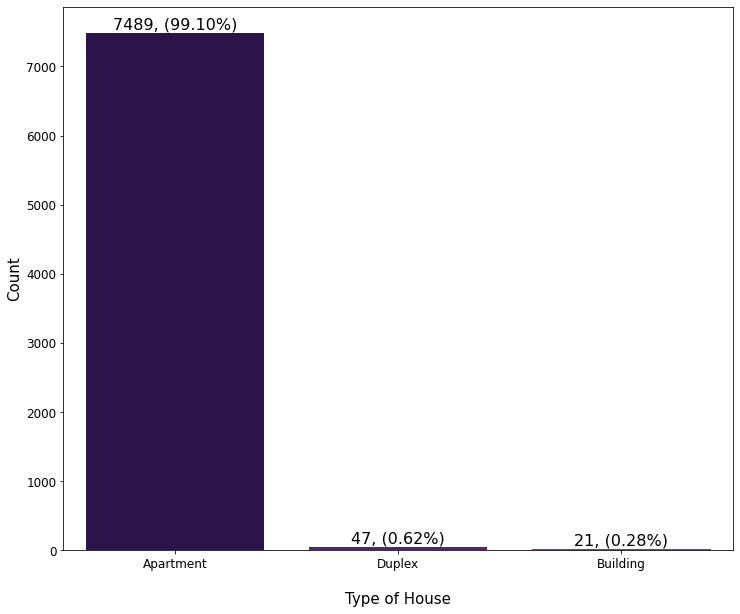

In [ ]:
plt.figure(figsize=(12, 10))

fig = sns.countplot(
        data=prop_data,
        x='type',
        palette=sns.color_palette('inferno')
)
fig.set_xlabel('\nType of House', fontsize=15)
fig.set_ylabel('Count', fontsize=15)
fig.tick_params(axis='x', labelsize=12)
fig.tick_params(axis='y', labelsize=12)
for p, val in zip(fig.patches, prop_data['type'].value_counts(ascending=False)):
    fig.annotate(f"{val}, ({(val / prop_data.shape[0] * 100):.2f}%)", (p.get_x() + p.get_width() / 2, p.get_height()),
                 xytext=(0, 4),
                 textcoords='offset points',
                 fontsize=16, ha='center')
plt.show()
plt.show()

# Preprocessing 

## Dropping columns

>> First, let's drop the columns that we don't need

In [ ]:
prop_data.columns

Index(['title', 'beds', 'bath', 'area', 'adress', 'type', 'purpose',
       'flooPlan', 'url', 'lastUpdated', 'price'],
      dtype='object')

In [ ]:
# as I've played a bit with the previous dataset that literally had 8K+ data
# that's why we are dropping almost every column off the bat that I found had less importance 

prop_data.drop(['title', 'purpose', 'flooPlan', 'url', 'lastUpdated'], axis=1, inplace=True)

In [ ]:
# Let's see if everyting went smoothly,
prop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   beds    7557 non-null   object
 1   bath    7557 non-null   object
 2   area    7557 non-null   object
 3   adress  7557 non-null   object
 4   type    7557 non-null   object
 5   price   7557 non-null   object
dtypes: object(6)
memory usage: 354.4+ KB


>> Ok, everything went smoothly, At this point, we would've done some statistical analysis. But as the dataset has only one dtype which is "object" for all the columns, we are not able to that. 
So, first we need to do type casting

## Type conversion

>>> First, we are gonna go with the 'beds', 'bath' and 'area' column

In [ ]:
# so the idea is to replace the sqft with a blank string, and keep only the number string.
# then we will convert the number stirng into a int data type
# N.B, there's a space before the sqft, and also there's comma (,) in between numbers
# we will do this in one go

prop_data['area'] = prop_data['area'].str.replace(" sqft", "").str.replace(",", "").astype(int)

# then we do the same for the 'beds' and 'bath' column

prop_data['beds'] = prop_data['beds'].str.replace(" Bed", "").astype(int)
prop_data['bath'] = prop_data['bath'].str.replace(" Bath", "").astype(int)


>> Let's see how'd it go

In [ ]:
prop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   beds    7557 non-null   int64 
 1   bath    7557 non-null   int64 
 2   area    7557 non-null   int64 
 3   adress  7557 non-null   object
 4   type    7557 non-null   object
 5   price   7557 non-null   object
dtypes: int64(3), object(3)
memory usage: 354.4+ KB


>> Seems like everything is ok, up until now. Only one left to the conversion

>>> The Price column, (This is our Target column btw, I totally forgot to mention that) needs to type casted now. We will convert it to float64

In [ ]:
# prop_data.loc[:, 'price'].shape

>> This is how our price column looks

In [ ]:
prop_data.loc[:, 'price']

0       50 Thousand
1       30 Thousand
2       30 Thousand
3       35 Thousand
4       25 Thousand
           ...     
7552    80 Thousand
7553    19 Thousand
7554    22 Thousand
7555      1.75 Lakh
7556    90 Thousand
Name: price, Length: 7557, dtype: object

In [ ]:
# let's define what's a thousand and lakh is

thousand = [" Thousand", 1000]
lakh = [" Lakh", 100_000]

for i in range(prop_data.loc[:, 'price'].shape[0]):
    if " Thousand" in prop_data.at[i, 'price']:
        prop_data.at[i, 'price'] = float(prop_data.at[i, 'price'].replace(thousand[0], "")) * thousand[1]
    
    elif " Lakh" in prop_data.at[i, 'price']:
        prop_data.at[i, 'price'] = float(prop_data.at[i, 'price'].replace(lakh[0], "")) * lakh[1]

prop_data.loc[:, 'price'] = prop_data.loc[:, 'price'].astype(float)

>> This is how it looks after the transformation

In [ ]:
prop_data.loc[:, 'price']

0        50000.0
1        30000.0
2        30000.0
3        35000.0
4        25000.0
          ...   
7552     80000.0
7553     19000.0
7554     22000.0
7555    175000.0
7556     90000.0
Name: price, Length: 7557, dtype: float64

In [ ]:
prop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   beds    7557 non-null   int64  
 1   bath    7557 non-null   int64  
 2   area    7557 non-null   int64  
 3   adress  7557 non-null   object 
 4   type    7557 non-null   object 
 5   price   7557 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 354.4+ KB


>> There, we converted all the numerical columns to their exact dtypes.

>> NOW, we set our eyes to the adress (address) column, It has a quite a few information. We're gonna extract and create columns for each gropu of extracted information. 

In [ ]:
print(prop_data.loc[:, 'adress'].nunique())

677


In [ ]:
ix_lengths = []

for address in prop_data['adress'].unique():

    ix = prop_data.loc[prop_data['adress'] == address].index[0]
    length = len(address.split(","))

    ix_lengths.append(length)
    
    print(ix, address, length)

address_len = pd.Series(ix_lengths)

0 Block A, Bashundhara R-A, Dhaka 3
1 South Khulshi, Khulshi, Chattogram 3
2 Block F, Bashundhara R-A, Dhaka 3
3 Sector 9, Uttara, Dhaka 3
4 Block I, Bashundhara R-A, Dhaka 3
5 Gulshan 1, Gulshan, Dhaka 3
6 Sector 6, Uttara, Dhaka 3
7 Block K, Bashundhara R-A, Dhaka 3
8 Sector 10, Uttara, Dhaka 3
11 Bayazid, Chattogram 2
13 Gulshan 2, Gulshan, Dhaka 3
15 Sector 12, Uttara, Dhaka 3
17 Block D, Bashundhara R-A, Dhaka 3
18 Block C, Bashundhara R-A, Dhaka 3
21 Ward 23, Chowdhuripara, Khilgaon, Dhaka 4
23 Sector 3, Uttara, Dhaka 3
24 Banani, Dhaka 2
25 Dhanmondi, Dhaka 2
27 Block J, Baridhara, Dhaka 3
28 West Shewrapara, Mirpur, Dhaka 3
29 Block D, Mohanagar Housing, West Rampura, Rampura, Dhaka 5
30 Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram 4
32 Banani DOHS, Dhaka 2
35 Block J, Bashundhara R-A, Dhaka 3
36 Khilkhet, Dhaka 2
37 Block C, Dhaka Uddan, Mohammadpur, Dhaka 4
39 Mohammadi Housing LTD., Mohammadpur, Dhaka 3
41 Block D, Section 2, Mirpur, Dhaka 4
45 Sector 13

In [ ]:
address_len.describe()

count    677.000000
mean       3.463811
std        0.921765
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        6.000000
dtype: float64

>> so, most of them has length 3, minimum length is 1 and max is 6

In [ ]:
# let's create a copy of the datasset

prop_copy = prop_data.copy()

prop_copy[['Sector_or_Block', "Region", "Town", "City"]] = "null"   # creating the necessary columns and assigning "null"

In [ ]:
# code for the fixing the address column, creating four new columns for city, town, region and secotor or block
# putting no info if there is no info for the corresponding column(s)

block_list = []     # a list for the blcok info
sector_list = []    # a list for the sector/section info

for i, s in enumerate(prop_copy['adress']):   # iterating over the addresses
    string_list = s.split(", ")     # The address list >> spliting the addresses into a list by the comma (,) following with a space (" ")
    if len(string_list) > 2:        # chekcking if the string_list is greater than 2
        prop_copy.at[i, 'City'] = string_list.pop()   # putting the city name to the df['City']
        prop_copy.at[i, 'Town'] = string_list.pop()   # putting the town name to the df['Town']
        # city = string_list.pop()
        # town = string_list.pop()

        if len(string_list) > 2:    # checking if the length of the list is still greater than 2, which means 3, 4, 5 so on...
            prop_copy.at[i, 'Region'] = string_list.pop()     # putting the region name to the df['region']
            # region = string_list.pop()
            # print(string_list)

            for string in string_list:      # iterating over the split address list 
                # print(string)
                if "Block" in string:
                    # print("updating block list")
                    block_list.append(string)
                    # print(block_list)
                    # print("Block list updated")
                elif ("Sector" or "Section") in string:
                    # print("Sector or Section in", string)
                    sector_list.append(string)
                    # print("Why this is executing", sector_list)
                    break
            # print("Printing the block list ", block_list)
            # print("Printing the sector list ", sector_list)
            if sector_list and block_list:
                prop_copy.at[i, 'Sector_or_Block'] = sector_list.pop()
                # print(sector_or_block)
            elif sector_list:
                prop_copy.at[i, 'Sector_or_Block'] = sector_list.pop()
                # print(sector_or_block)
            elif block_list:
                prop_copy.at[i, 'Sector_or_Block'] = block_list.pop()
                # print(sector_or_block)
            else:
                prop_copy.at[i, 'Sector_or_Block'] = "No Sector/Block info"
        
        # for the case there are two info. left in the address list
        
        elif len(string_list) == 2:

            for string in string_list:
                if "Block" in string:
                    block_list.append(string_list.pop(string_list.index(string)))
                    # print("Block list ", block_list)
                elif ("Sector" or "Section") in string:
                    sector_list.append(string_list.pop(string_list.index(string)))
                    # print("Sector list", sector_list)
                    break
            
            if sector_list and block_list:
                
                # The remining two info contains both sector and block info
                # that's why the Town name becomes the Region name

                prop_copy.at[i, 'Sector_or_Block'] = sector_list.pop()
                prop_copy.at[i, 'Region'] = prop_copy.at[i, 'Town']     
                # print(prop_copy['Sector_or_Block'][i])

            elif sector_list:
                prop_copy.at[i, 'Sector_or_Block'] = sector_list.pop()
                prop_copy.at[i, 'Region'] = string_list.pop()
                
            elif block_list:
                prop_copy.at[i, 'Sector_or_Block'] = block_list.pop()
                prop_copy.at[i, 'Region'] = string_list.pop()
                
            else:
                
                # as there are no info about sector or block, the info is mostly about the region

                prop_copy.at[i, 'Region'] = string_list.pop()
                prop_copy.at[i, 'Sector_or_Block'] = "No Sector/Block"
                
                # We could've done this too..
                # prop_copy.at[i, 'Region'] = ', '.join(string_list)  # to store all the remaining info to the Region column

                # print("The else", prop_copy['Sector_or_Block'][i])
        
        # for the case when only one string left in the address list

        else:
            
            for string in string_list:
                if "Block" in string:
                    block_list.append(string)
                elif ("Sector" or "Section") in string:
                    sector_list.append(string)
                    break

            if sector_list:
                prop_copy.at[i, 'Sector_or_Block'] = sector_list.pop()
                prop_copy.at[i, 'Region'] = prop_copy.at[i, "Town"]   # if there's no region info, put the town info to it
                
            elif block_list:
                prop_copy.at[i, 'Sector_or_Block'] = block_list.pop()
                prop_copy.at[i, 'Region'] = prop_copy.at[i, "Town"]   # if there's no region info, put the twon info to it.
                
            else:
                prop_copy.at[i, 'Region'] = string_list.pop()
                prop_copy.at[i, 'Sector_or_Block'] = "No Sector/Block"
                
    # When the list has only two values from the beginning
    
    elif len(string_list) == 2:

        prop_copy.at[i, 'City'] = string_list.pop()

        for string in string_list:
            if "Block" in string:
                block_list.append(string)
            elif ("Sector" or "Section") in string:
                sector_list.append(string)
                break

        # if sector_list and block_list:
        #     prop_copy.at[i, 'Sector_or_Block'] = sector_list.pop()
        
        if sector_list:
            prop_copy.loc[i, 'Sector_or_Block'] = sector_list.pop()
            prop_copy.loc[i, ['Town', 'Region']] = prop_copy.at[i, 'City']
        elif block_list:
            prop_copy.loc[i, 'Sector_or_Block'] = block_list.pop()
            prop_copy.loc[i, ['Town', 'Region']] = prop_copy.at[i, 'City']
        else:
            prop_copy.at[i, 'Sector_or_Block'] = "No Sector/Block"
            prop_copy.loc[i, ['Town', 'Region']] = string_list.pop()
            # prop_copy.loc[i, 'Region'] = "No info"

    # When the list has only one info in the address list
    
    else:
        prop_copy.loc[i, ['City', 'Town','Region']] = string_list.pop()
        # prop_copy.loc[i, 'Town'] = "No info"
        # prop_copy.loc[i, 'Region'] = "No info"
        # prop_copy.loc[i, 'Town'] = "No info"
        prop_copy.at[i, 'Sector_or_Block'] = "No Sector/Block"


In [ ]:
prop_copy

beds  bath  area                              adress       type  \
0        3     4  2200     Block A, Bashundhara R-A, Dhaka  Apartment   
1        3     4  1400  South Khulshi, Khulshi, Chattogram  Apartment   
2        3     4  1950     Block F, Bashundhara R-A, Dhaka  Apartment   
3        3     3  2000             Sector 9, Uttara, Dhaka  Apartment   
4        3     4  1650     Block I, Bashundhara R-A, Dhaka  Apartment   
...    ...   ...   ...                                 ...        ...   
7552     4     4  3600             Sector 3, Uttara, Dhaka     Duplex   
7553     3     2   900            Sector 13, Uttara, Dhaka  Apartment   
7554     2     2  1000            Sector 13, Uttara, Dhaka  Apartment   
7555     3     4  3600           Gulshan 1, Gulshan, Dhaka  Apartment   
7556     4     4  2600               Baridhara DOHS, Dhaka  Apartment   

         price  Sector_or_Block           Region             Town        City  
0      50000.0          Block A  Bashundhara R-A  Bashundhara R-A       Dhaka  
1      30000.0  No Sector/Block    South Khulshi          Khulshi  Chattogram  
2      30000.0          Block F  Bashundhara R-A  Bashundhara R-A       Dhaka  
3      35000.0         Sector 9           Uttara           Uttara       Dhaka  
4      25000.0          Block I  Bashundhara R-A  Bashundhara R-A       Dhaka  
...        ...              ...              ...              ...         ...  
7552   80000.0         Sector 3           Uttara           Uttara       Dhaka  
7553   19000.0        Sector 13           Uttara           Uttara       Dhaka  
7554   22000.0        Sector 13           Uttara           Uttara       Dhaka  
7555  175000.0  No Sector/Block        Gulshan 1          Gulshan       Dhaka  
7556   90000.0  No Sector/Block   Baridhara DOHS   Baridhara DOHS       Dhaka  

[7557 rows x 10 columns]

>> Let's see if there are any null values

In [ ]:
prop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   beds             7557 non-null   int64  
 1   bath             7557 non-null   int64  
 2   area             7557 non-null   int64  
 3   adress           7557 non-null   object 
 4   type             7557 non-null   object 
 5   price            7557 non-null   float64
 6   Sector_or_Block  7557 non-null   object 
 7   Region           7557 non-null   object 
 8   Town             7557 non-null   object 
 9   City             7557 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 590.5+ KB


In [ ]:
# let's add another column to the dataset

prop_copy['TotalRooms'] = prop_copy['beds'] + prop_copy['bath']

In [ ]:
prop_copy.rename(columns={'beds': 'Beds', 'bath': 'Baths', 'area': 'Area', 'adress': 'Address',
                          'type': 'Type', 'price': 'Price'}, inplace=True)
prop_copy = prop_copy[['Beds', 'Baths', 'TotalRooms', 'Area', 'Type', 'Address', 'Sector_or_Block',
                       'Region', 'Town', 'City', 'Price']]

In [ ]:
prop_copy

Beds  Baths  TotalRooms  Area       Type  \
0        3      4           7  2200  Apartment   
1        3      4           7  1400  Apartment   
2        3      4           7  1950  Apartment   
3        3      3           6  2000  Apartment   
4        3      4           7  1650  Apartment   
...    ...    ...         ...   ...        ...   
7552     4      4           8  3600     Duplex   
7553     3      2           5   900  Apartment   
7554     2      2           4  1000  Apartment   
7555     3      4           7  3600  Apartment   
7556     4      4           8  2600  Apartment   

                                 Address  Sector_or_Block           Region  \
0        Block A, Bashundhara R-A, Dhaka          Block A  Bashundhara R-A   
1     South Khulshi, Khulshi, Chattogram  No Sector/Block    South Khulshi   
2        Block F, Bashundhara R-A, Dhaka          Block F  Bashundhara R-A   
3                Sector 9, Uttara, Dhaka         Sector 9           Uttara   
4        Block I, Bashundhara R-A, Dhaka          Block I  Bashundhara R-A   
...                                  ...              ...              ...   
7552             Sector 3, Uttara, Dhaka         Sector 3           Uttara   
7553            Sector 13, Uttara, Dhaka        Sector 13           Uttara   
7554            Sector 13, Uttara, Dhaka        Sector 13           Uttara   
7555           Gulshan 1, Gulshan, Dhaka  No Sector/Block        Gulshan 1   
7556               Baridhara DOHS, Dhaka  No Sector/Block   Baridhara DOHS   

                 Town        City     Price  
0     Bashundhara R-A       Dhaka   50000.0  
1             Khulshi  Chattogram   30000.0  
2     Bashundhara R-A       Dhaka   30000.0  
3              Uttara       Dhaka   35000.0  
4     Bashundhara R-A       Dhaka   25000.0  
...               ...         ...       ...  
7552           Uttara       Dhaka   80000.0  
7553           Uttara       Dhaka   19000.0  
7554           Uttara       Dhaka   22000.0  
7555          Gulshan       Dhaka  175000.0  
7556   Baridhara DOHS       Dhaka   90000.0  

[7557 rows x 11 columns]

>> save the dataset

In [ ]:
prop_copy.to_csv("/content/drive/MyDrive/Dataset/bd_housing_data/property_listing_data_in_Bangladesh_new_mod1.csv", index=False)

# Load the data set from here (Mod 1)

In [ ]:
prop_data = pd.read_csv("/content/drive/MyDrive/Dataset/bd_housing_data/property_listing_data_in_Bangladesh_new_mod1.csv")

In [ ]:
prop_data

Beds  Baths  TotalRooms  Area       Type  \
0        3      4           7  2200  Apartment   
1        3      4           7  1400  Apartment   
2        3      4           7  1950  Apartment   
3        3      3           6  2000  Apartment   
4        3      4           7  1650  Apartment   
...    ...    ...         ...   ...        ...   
7552     4      4           8  3600     Duplex   
7553     3      2           5   900  Apartment   
7554     2      2           4  1000  Apartment   
7555     3      4           7  3600  Apartment   
7556     4      4           8  2600  Apartment   

                                 Address  Sector_or_Block           Region  \
0        Block A, Bashundhara R-A, Dhaka          Block A  Bashundhara R-A   
1     South Khulshi, Khulshi, Chattogram  No Sector/Block    South Khulshi   
2        Block F, Bashundhara R-A, Dhaka          Block F  Bashundhara R-A   
3                Sector 9, Uttara, Dhaka         Sector 9           Uttara   
4        Block I, Bashundhara R-A, Dhaka          Block I  Bashundhara R-A   
...                                  ...              ...              ...   
7552             Sector 3, Uttara, Dhaka         Sector 3           Uttara   
7553            Sector 13, Uttara, Dhaka        Sector 13           Uttara   
7554            Sector 13, Uttara, Dhaka        Sector 13           Uttara   
7555           Gulshan 1, Gulshan, Dhaka  No Sector/Block        Gulshan 1   
7556               Baridhara DOHS, Dhaka  No Sector/Block   Baridhara DOHS   

                 Town        City     Price  
0     Bashundhara R-A       Dhaka   50000.0  
1             Khulshi  Chattogram   30000.0  
2     Bashundhara R-A       Dhaka   30000.0  
3              Uttara       Dhaka   35000.0  
4     Bashundhara R-A       Dhaka   25000.0  
...               ...         ...       ...  
7552           Uttara       Dhaka   80000.0  
7553           Uttara       Dhaka   19000.0  
7554           Uttara       Dhaka   22000.0  
7555          Gulshan       Dhaka  175000.0  
7556   Baridhara DOHS       Dhaka   90000.0  

[7557 rows x 11 columns]

In [ ]:
categoricals = []
numericals = []

for col in prop_data.columns:
    if prop_data[col].dtype == 'float64' or prop_data[col].dtype == 'int64':
        numericals.append(col)
    else:
        categoricals.append(col)

## Describe 

>> Now, we can use the Describe method to see statistical information

In [ ]:
prop_data.describe().T

count          mean           std     min      25%      50%  \
Beds        7557.0      2.754400      0.976034     1.0      2.0      3.0   
Baths       7557.0      2.693662      0.900990     1.0      2.0      3.0   
TotalRooms  7557.0      5.448061      1.739099     2.0      4.0      6.0   
Area        7557.0   1372.025010    956.756264   300.0    900.0   1200.0   
Price       7557.0  34079.026069  64711.608079  5500.0  15000.0  19000.0   

                75%        max  
Beds            3.0       36.0  
Baths           3.0       10.0  
TotalRooms      6.0       46.0  
Area         1550.0    31500.0  
Price       30000.0  2000000.0

## Countplot of the City

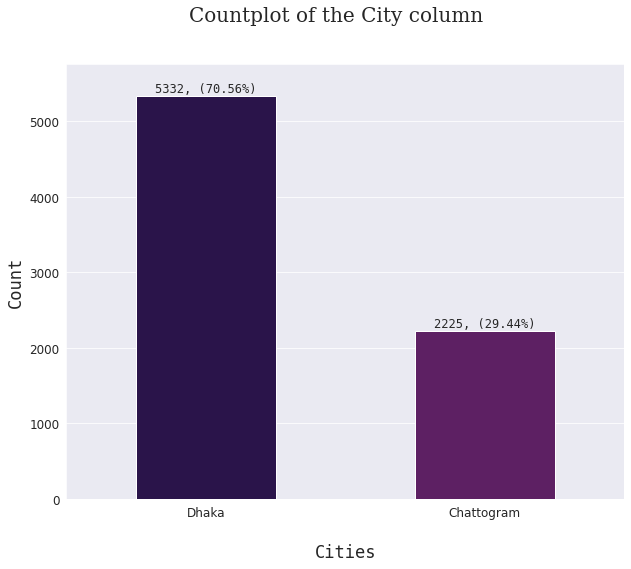

In [ ]:
title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace'}

with sns.axes_style("darkgrid"):
    figure, ax = plt.subplots(figsize=(10, 8))
    figure.suptitle("Countplot of the City column\n", fontsize=20, **title_font)

    fig = sns.countplot(
            data=prop_data,
            x='City',
            palette=sns.color_palette('inferno')
    )
    fig.set_xlabel('\nCities', fontsize=17, **label_font)
    fig.set_ylabel('Count', fontsize=17, **label_font)
    fig.tick_params(axis='x', labelsize=12)
    fig.tick_params(axis='y', labelsize=12)
    for p, val in zip(fig.patches, prop_data['City'].value_counts(ascending=False)):
        fig.annotate(f"{val}, ({(val / prop_data.shape[0] * 100):.2f}%)", (p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 4),
                    textcoords='offset points',
                    fontsize=12, ha='center', **label_font)
    Width(ax, 0.5)
    ax.margins(y=0.08)
plt.show()

>> Let's see how many No sector/block info is there in Sector/Block column

In [ ]:
prop_data.loc[prop_data['Sector_or_Block'] == 'No Sector/Block'].loc[:, 'Sector_or_Block'].value_counts()

No Sector/Block    5121
Name: Sector_or_Block, dtype: int64

### Countplot of the Sector_or_Block column having no Sector/Block info

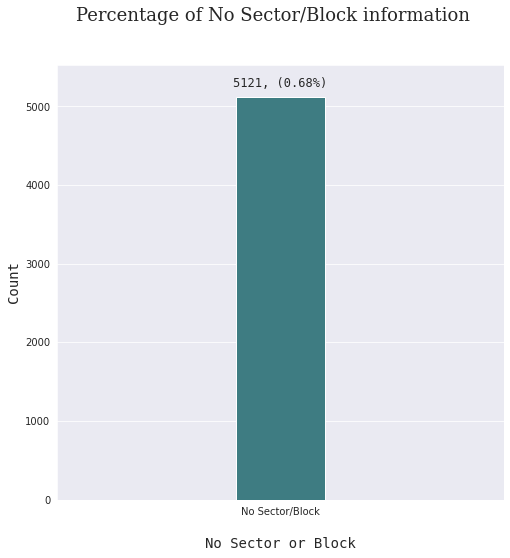

In [ ]:
# plt.figure(figsize=(10, 8))
# plt.subplots_adjust(top=0.5)

title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace'}

x = prop_data.loc[prop_data['Sector_or_Block'] == 'No Sector/Block']\
                        .loc[:, 'Sector_or_Block']
with sns.axes_style("darkgrid"):
    figure, ax = plt.subplots(figsize=(8, 8))
    figure.suptitle("Percentage of No Sector/Block information", fontsize=18, **title_font)


    fig = sns.countplot(x=x,
                        palette='crest')
    
    ax.set_xlabel('\nNo Sector or Block', fontsize=14, **label_font)
    ax.set_ylabel('Count', fontsize=14, **label_font)

    Width(ax, 0.2)
    for p in fig.patches:
        fig.annotate(f"{x.shape[0]}, ({(x.shape[0]/ prop_data.shape[0]):.2f}%)", (p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=12, ha='center', **label_font)
    ax.margins(y=0.08)

# plt.tight_layout()
plt.show()

## Distributions

In [ ]:
print(numericals)

['Beds', 'Baths', 'TotalRooms', 'Area', 'Price']


<ipython-input-11-77b2e88344fc>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(data=prop_data,
<ipython-input-11-77b2e88344fc>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(data=prop_data,
<ipython-input-11-77b2e88344fc>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(data=prop_data,
<ipython-input-11-77b2e88344fc>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(data=prop_data,
<ipython-input-11-77b2e88344fc>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(data=prop_data,


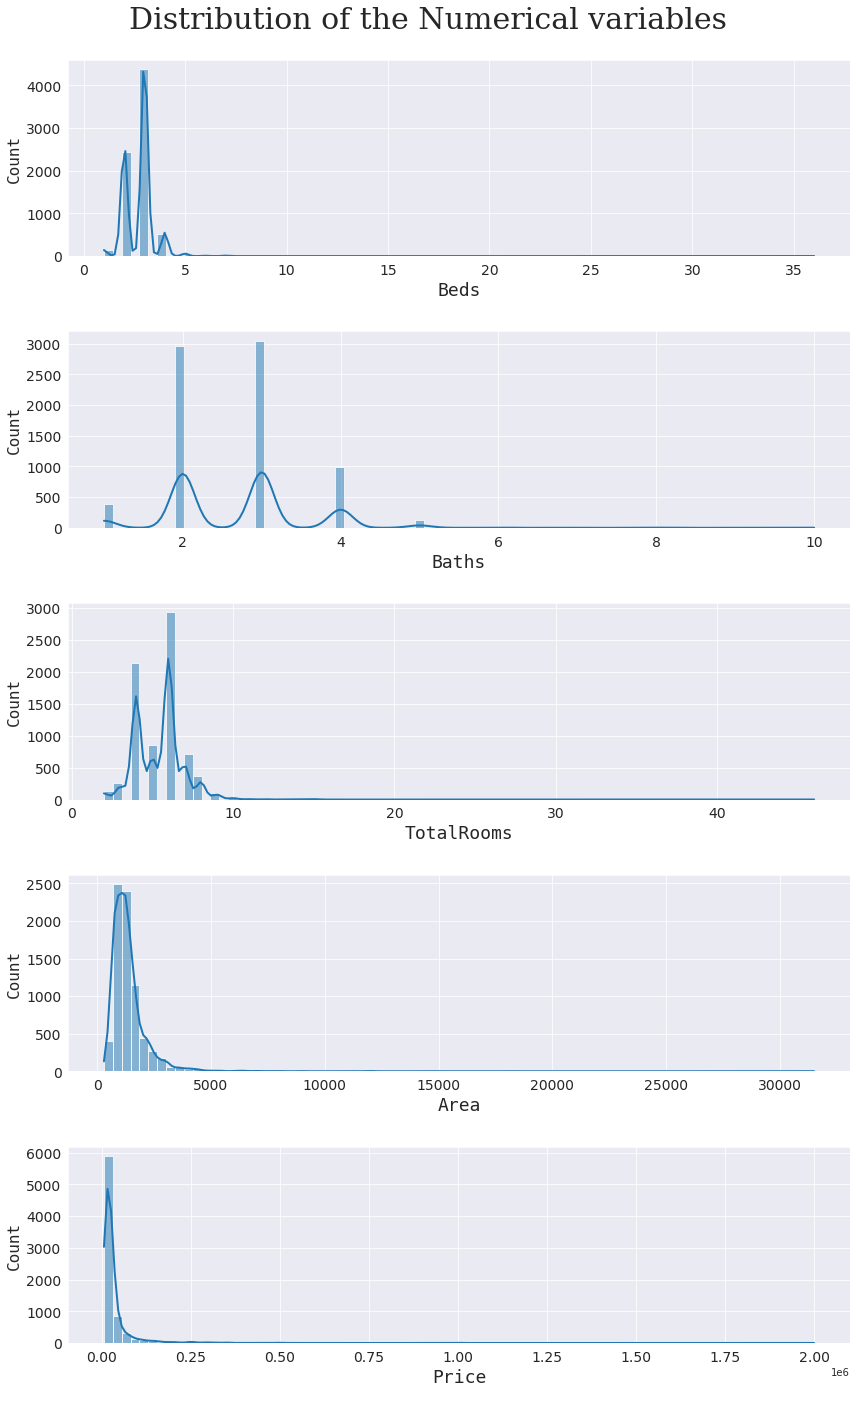

In [ ]:
# overall distributions of the numerical columns

title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace'}

n_rows, n_cols = 5, 1

with sns.axes_style("darkgrid"):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Distribution of the Numerical variables\n", fontsize=30, **title_font)

    for i, col in enumerate(numericals):
        # j, i = idx // 2, idx % 2

        fig = sns.histplot(data=prop_data, 
                        x=col,
                        kde=True,
                        ax=axes[i],
                        palette=sns.color_palette('inferno'),
                        line_kws={"linewidth": 2,}, 
                        bins=80,
                        )
        
        axes[i].set_xlabel(col + "\n", fontsize=18, **label_font)
        axes[i].set_ylabel('Count', fontsize=16, **label_font)
        # axes[i].set_xticklabels(axes[j, i].get_xticks(),fontsize=14)
        axes[i].tick_params(axis='x', labelsize=14)
        # axes[i].set_yticklabels(axes[j, i].get_yticks(),fontsize=14)
        axes[i].tick_params(axis='y', labelsize=14)

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

>> We can gain this insight from a pivot table, which will be kind of pain to see.

In [ ]:
table = pd.pivot_table(
    data=prop_data,
    index='City',
    values=['Price', 'TotalRooms', 'Area'],
    aggfunc=['mean', 'median', 'max', 'min']
)
table['count'] = prop_data.loc[:, 'City'].value_counts()
table['percentage'] = table['count'] / prop_data.shape[0]

In [ ]:
table

mean                           median                      \
                   Area         Price TotalRooms    Area    Price TotalRooms   
City                                                                           
Chattogram  1207.938876  20106.768539   5.106067  1150.0  16000.0          5   
Dhaka       1440.496812  39909.534884   5.590773  1220.5  20000.0          6   

              max                        min                    count  \
             Area      Price TotalRooms Area   Price TotalRooms         
City                                                                    
Chattogram   7000   300000.0         15  400  5500.0          2  2225   
Dhaka       31500  2000000.0         46  300  7000.0          2  5332   

           percentage  
                       
City                   
Chattogram   0.294429  
Dhaka        0.705571

>> Mean property price in Chattogram is almost 20,000 whereas in Dhaka is almost 40,000. Almost 71% data are from Dhaka

>> Now to see this data visually

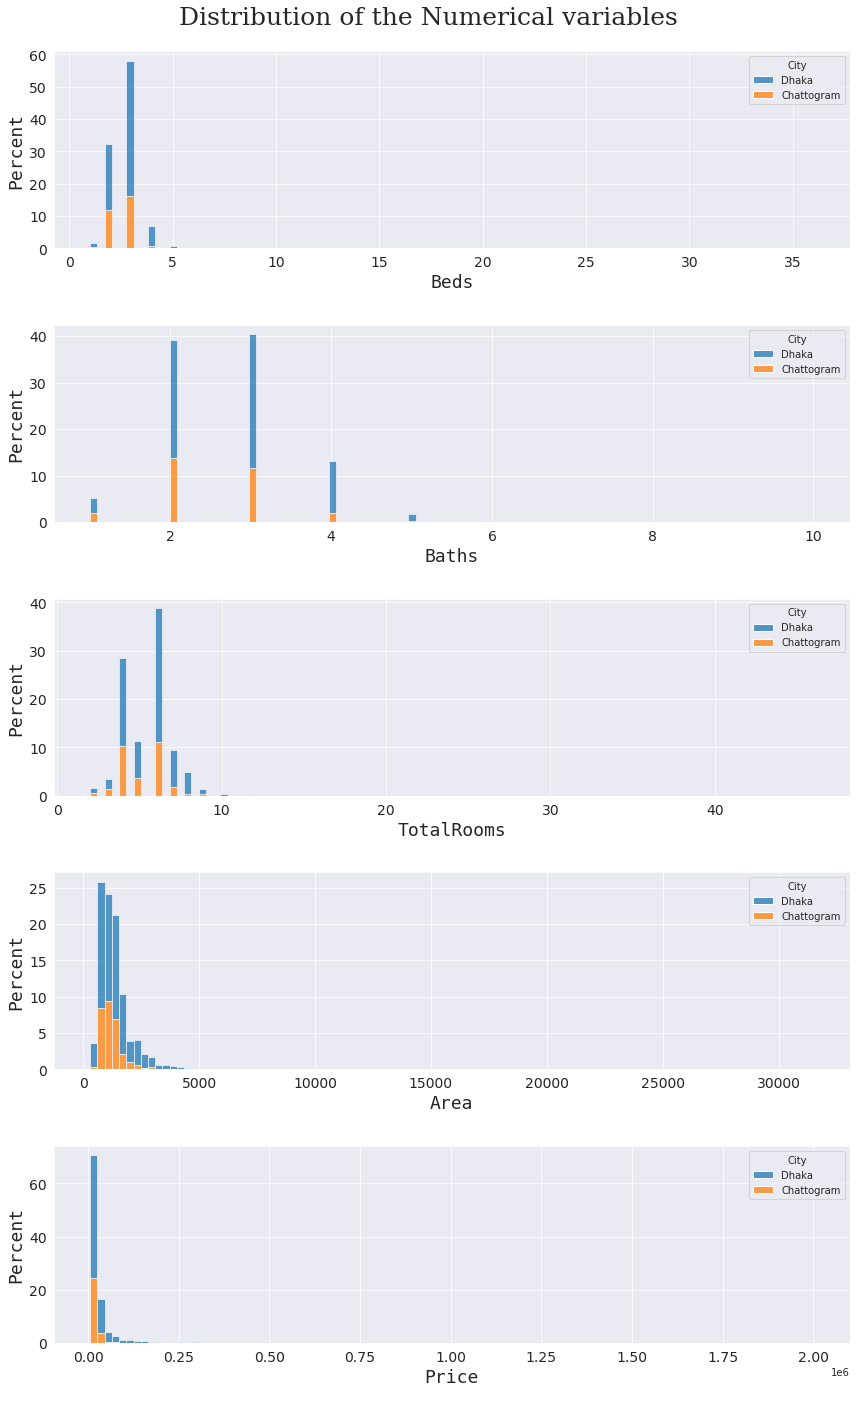

In [ ]:
# overall distributions of the numerical columns

title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace'}

n_rows, n_cols = 5, 1

with sns.axes_style("darkgrid"):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Distribution of the Numerical variables\n", fontsize=25, **title_font)

    for i, col in enumerate(numericals):
        # j, i = idx // 2, idx % 2

        fig = sns.histplot(data=prop_data, 
                        x=col,
                        stat='percent',
                        kde=False,
                        hue='City',
                        multiple='stack',
                        ax=axes[i],
                        # palette=sns.color_palette('inferno'),
                        line_kws={"linewidth": 2,}, 
                        bins=100,
                        )
        
        axes[i].set_xlabel(col + "\n", fontsize=18, **label_font)
        axes[i].set_ylabel("Percent", fontsize=18, **label_font)
        # axes[i].set_xticklabels(axes[j, i].get_xticks(),fontsize=14)
        axes[i].tick_params(axis='x', labelsize=14)
        # axes[i].set_yticklabels(axes[j, i].get_yticks(),fontsize=14)
        axes[i].tick_params(axis='y', labelsize=14)

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

>> Correlation of the **Price** column with the other numerical variables

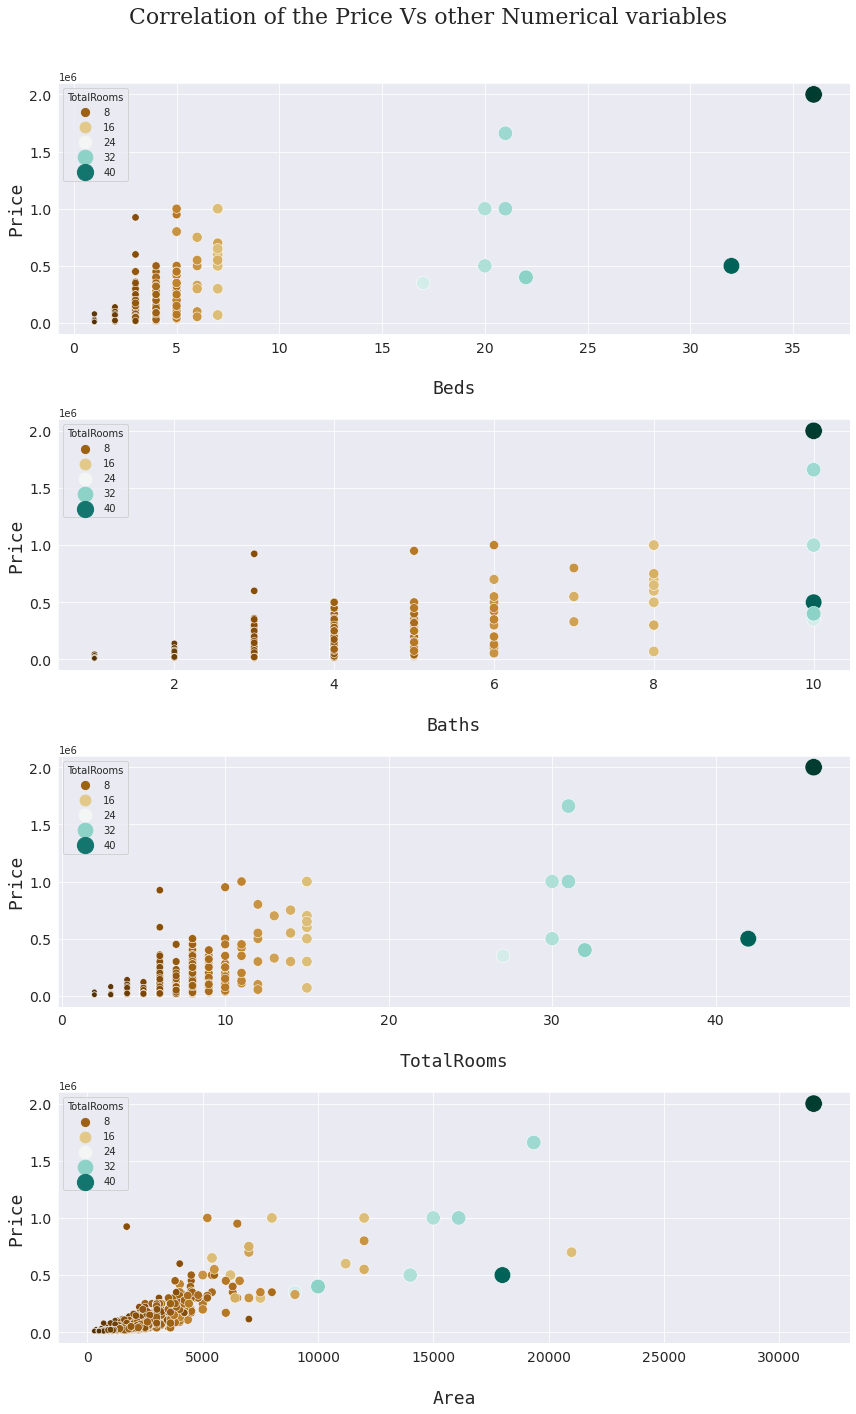

In [ ]:
n_rows, n_cols = 4, 1

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Correlation of the Price Vs other Numerical variables\n\n", 
                    fontsize=22, 
                    **title_font)

    for i, col in enumerate(numericals[:-1]):
        # j, i = idx // 2, idx % 2

        fig = sns.scatterplot(data=prop_data,
                            x=col,
                            y='Price', 
                            palette='BrBG',
                            size='TotalRooms',
                            hue='TotalRooms',
                            sizes=(30, 300),
                            ax=axes[i]
                            )
        axes[i].set_xlabel("\n" + col, fontsize=18, **label_font)
        axes[i].set_ylabel("Price", fontsize=18, **label_font)
        # axes[i].set_xticklabels(axes[j, i].get_xticks(),fontsize=14)
        axes[i].tick_params(axis='x', labelsize=14)
        # axes[i].set_yticklabels(axes[j, i].get_yticks(),fontsize=14)
        axes[i].tick_params(axis='y', labelsize=14) 

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

>> It's there to see that, Increase of the Beds, bath, TotalRooms and Area increases the price. 

>> Although, the bath column having a little difficulities there. Also, the trend of increase of a numerical variable increases price is kinda shaky. Because you will see a lot of big houses which has Area > 10,000+, has price less than those which are in between 5,000 to 10,000. This again is also true for the Price-V-Total Rooms. 

>> The previous figure with '**hue**' set to **City**

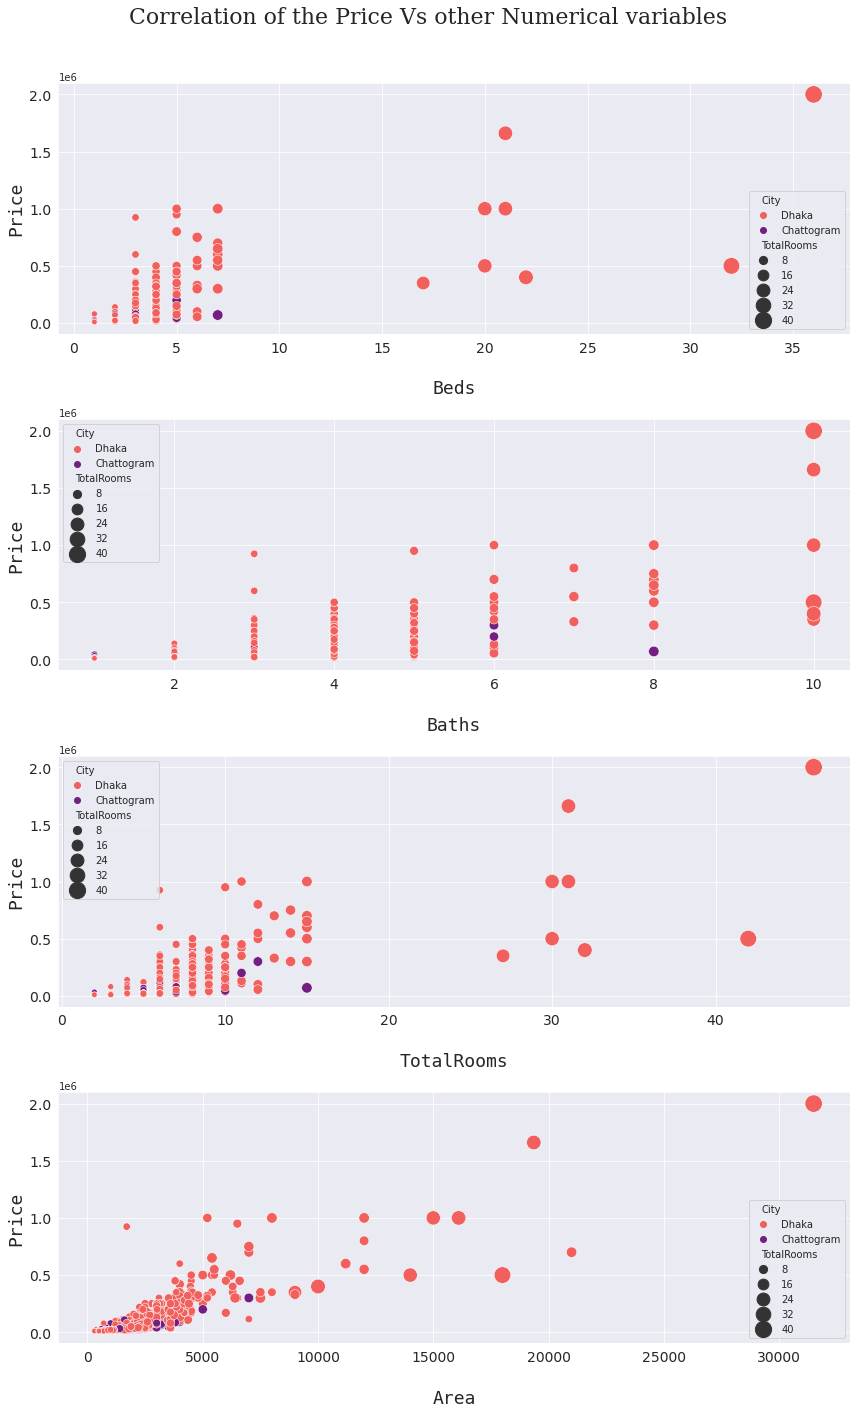

In [ ]:
n_rows, n_cols = 4, 1

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Correlation of the Price Vs other Numerical variables\n\n", 
                    fontsize=22, 
                    **title_font)

    for i, col in enumerate(numericals[:-1]):
        # j, i = idx // 2, idx % 2

        fig = sns.scatterplot(data=prop_data,
                            x=col,
                            y='Price', 
                            palette='magma_r',
                            size='TotalRooms',
                            hue='City',
                            sizes=(30, 300),
                            ax=axes[i]
                            )
        axes[i].set_xlabel("\n" + col, fontsize=18, **label_font)
        axes[i].set_ylabel("Price", fontsize=18, **label_font)
        # axes[i].set_xticklabels(axes[j, i].get_xticks(),fontsize=14)
        axes[i].tick_params(axis='x', labelsize=14)
        # axes[i].set_yticklabels(axes[j, i].get_yticks(),fontsize=14)
        axes[i].tick_params(axis='y', labelsize=14) 

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

>> We've seen this from the distribution plots, most of the houses are situated in Dhaka, So, it's a no brainer that most of the hue mapping maps to Dhaka.
>> Most houses which are big and has more than 15 rooms are inside Dhaka. 

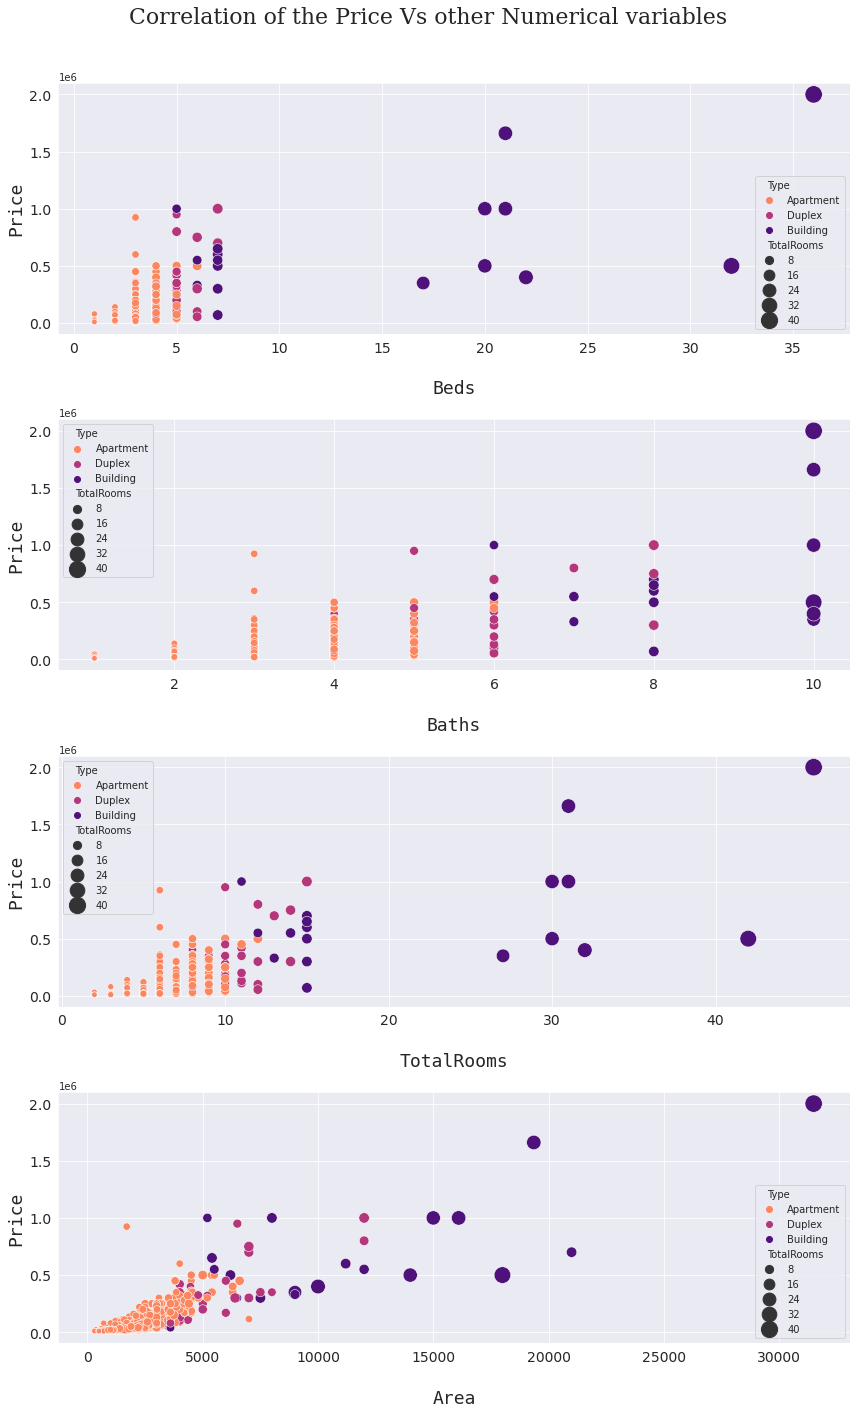

In [ ]:
n_rows, n_cols = 4, 1

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Correlation of the Price Vs other Numerical variables\n\n", 
                    fontsize=22, 
                    **title_font)

    for i, col in enumerate(numericals[:-1]):
        # j, i = idx // 2, idx % 2

        fig = sns.scatterplot(data=prop_data,
                            x=col,
                            y='Price', 
                            palette='magma_r',
                            size='TotalRooms',
                            hue='Type',
                            sizes=(30, 300),
                            ax=axes[i]
                            )
        axes[i].set_xlabel("\n" + col, fontsize=18, **label_font)
        axes[i].set_ylabel("Price", fontsize=18, **label_font)
        # axes[i].set_xticklabels(axes[j, i].get_xticks(),fontsize=14)
        axes[i].tick_params(axis='x', labelsize=14)
        # axes[i].set_yticklabels(axes[j, i].get_yticks(),fontsize=14)
        axes[i].tick_params(axis='y', labelsize=14) 

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

>> I think the most important thing in here is the **Price** Vs **Area** plot. Most of the apartment type house are inside the 5,000 sqft brakcet and the "increase price with increasing area" is evident there. This also hold true for the '**Duplex**' type houses. For the '**Building**' this trend kind of lacking. Of course most of the houses are of '**Apartment**' type.

In [ ]:
table = pd.pivot_table(
    data=prop_data,
    index=['City', 'Type'],
    values=['Price', 'Area', 'TotalRooms'],
    aggfunc=['mean', 'median', 'min', 'max']
)

table

mean                           median            \
                              Area          Price TotalRooms   Area     Price   
City       Type                                                                 
Chattogram Apartment   1200.412269   19813.964817   5.091114   1150   16000.0   
           Building    3200.000000   70000.000000  15.000000   3200   70000.0   
           Duplex      3307.142857  105714.285714   8.428571   2500   60000.0   
Dhaka      Apartment   1377.403073   35752.966616   5.500759   1200   20000.0   
           Building   11703.000000  696500.000000  21.350000   9500  550000.0   
           Duplex      4625.000000  259450.000000   9.575000   4000  135000.0   

                                  min                        max             \
                     TotalRooms  Area    Price TotalRooms   Area      Price   
City       Type                                                               
Chattogram Apartment        5.0   400   5500.0          2   4000   130000.0   
           Building        15.0  3200  70000.0         15   3200    70000.0   
           Duplex           8.0  1700  25000.0          6   7000   300000.0   
Dhaka      Apartment        6.0   300   7000.0          2   7000   924000.0   
           Building        15.0  3600  40000.0          9  31500  2000000.0   
           Duplex           9.5  1300  30000.0          6  12000  1000000.0   

                                 
                     TotalRooms  
City       Type                  
Chattogram Apartment         10  
           Building          15  
           Duplex            12  
Dhaka      Apartment         12  
           Building          46  
           Duplex            15

>> The mean prices looks scary for the properties of Dhaka in contrast with Chattogram. 

>> Density Estimation plot

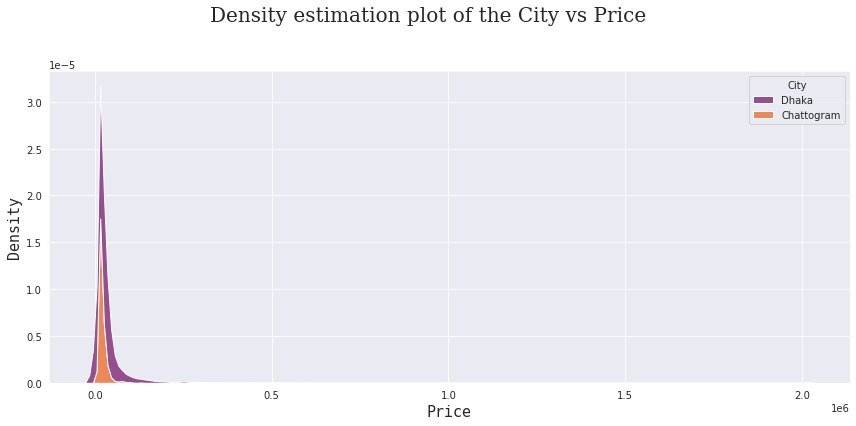

In [ ]:

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(figsize=(12, 6))
    figure.suptitle("Density estimation plot of the City vs Price\n",
                                fontsize=20, 
                                **title_font)

    fig = sns.kdeplot(data=prop_data, x="Price",
                    hue="City", 
                    multiple="stack",
                    palette='inferno',
                    ax=axes)
    
    axes.set_xlabel('Price', fontsize=15, **label_font)
    axes.set_ylabel('Density', fontsize=15, **label_font)
    # axes.set_xscale('log')
    # axes.set_yscale('log')
    # axes.xaxis.set_major_locator(ticker.MultipleLocator(100000))
    # axes.xaxis.set_major_formatter(ticker.ScalarFormatter())
    # ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    # plt.xticks(np.arange(min(prop_data['Price']) + 10000, max(prop_data['Price']) + 5000, 100000))
    # ax.get_xaxis().get_major_formatter().set_scientific(False)
    # plt.ticklabel_format(style='plain', useOffset=False)
    
plt.tight_layout()
plt.show()

>> Zooming in to the left, we see that most of the properties falls between the **price** range of **10,000** to **30,000** **BDT**

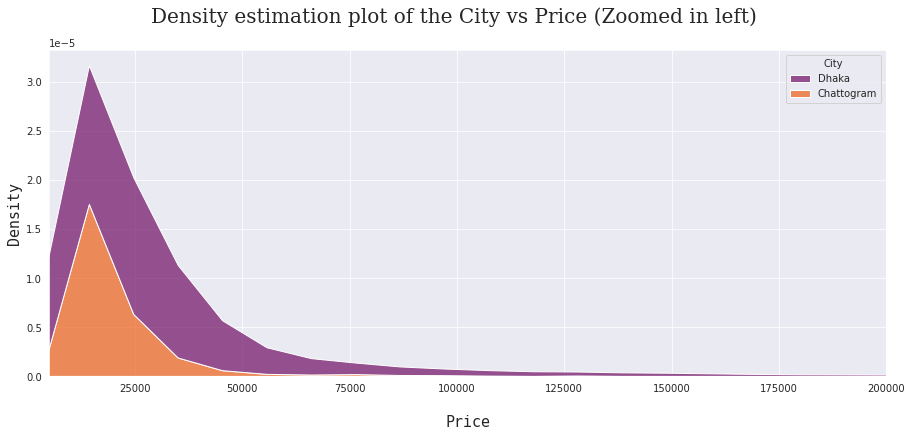

In [ ]:

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(figsize=(15, 6))
    figure.suptitle("Density estimation plot of the City vs Price (Zoomed in left)\n",
                                fontsize=20, 
                                **title_font)

    fig = sns.kdeplot(data=prop_data, x="Price",
                    hue="City", 
                    multiple="stack",
                    palette='inferno',
                    ax=axes)
    
    plt.xlim(5000, 200000)
    axes.set_xlabel('\n' + 'Price', fontsize=15, **label_font)
    axes.set_ylabel('Density', fontsize=15, **label_font)
    # axes.set_xscale('log')
    # axes.set_yscale('log')
    # axes.xaxis.set_major_locator(ticker.MultipleLocator(100000))
    # axes.xaxis.set_major_formatter(ticker.ScalarFormatter())
    # ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    # plt.xticks(np.arange(min(prop_data['Price']) + 10000, max(prop_data['Price']) + 5000, 100000))
    # ax.get_xaxis().get_major_formatter().set_scientific(False)
    # plt.ticklabel_format(style='plain', useOffset=False)

plt.show()

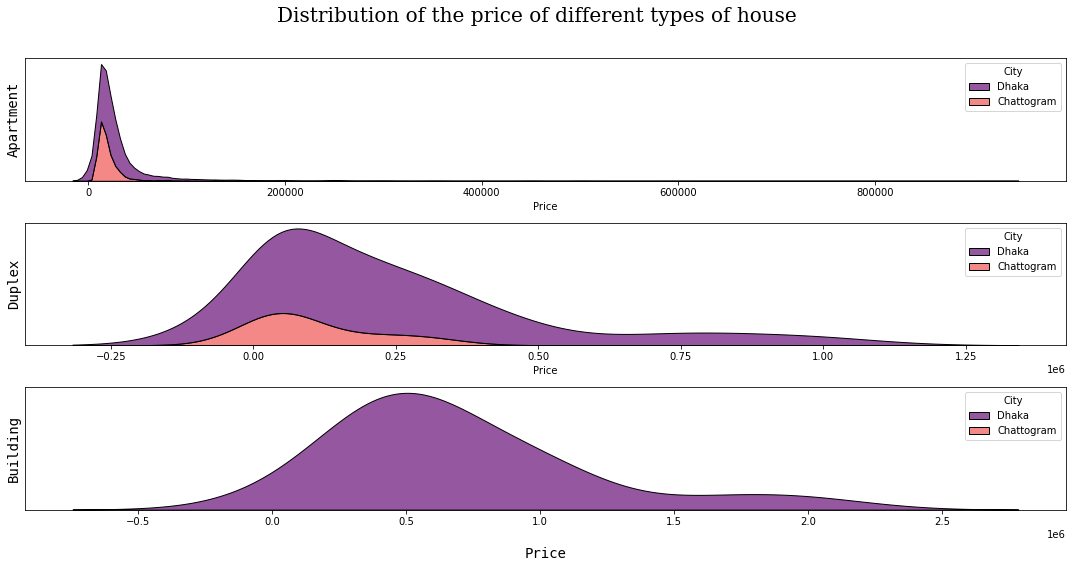

In [ ]:
types = prop_data['Type'].value_counts().index

n_rows, n_cols = 3, 1

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 8))
figure.suptitle("Distribution of the price of different types of house\n", fontsize=20, **title_font)

for i, t in enumerate(types):
    fig = sns.kdeplot(data=prop_data.loc[prop_data['Type'] == t], hue='City', 
                      x='Price',
                      ax=axes[i], 
                      multiple='stack',
                      palette='magma',
                      fill=True,
                      warn_singular=False)
    axes[i].set_ylabel(t, fontsize=14, **label_font)
    axes[i].set_yticks([])

axes[i].set_xlabel("\nPrice", fontsize=14, **label_font)
plt.tight_layout()
plt.show()

>> Regression plot

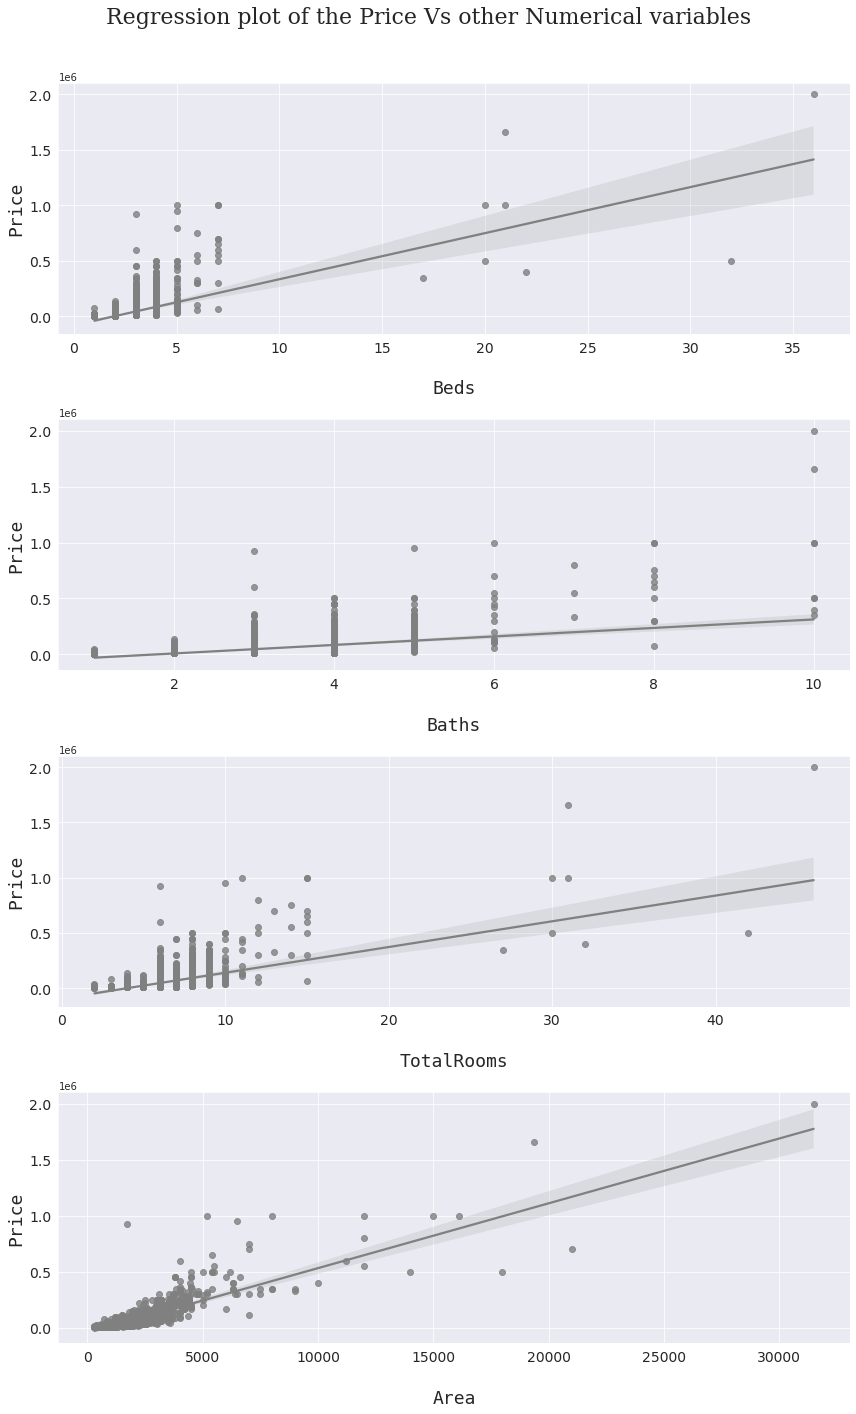

In [ ]:
n_rows, n_cols = 4, 1

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Regression plot of the Price Vs other Numerical variables\n\n", 
                    fontsize=22, 
                    **title_font)

    for i, col in enumerate(numericals[:-1]):
        # j, i = idx // 2, idx % 2

        fig = sns.regplot(data=prop_data,
                            x=col,
                            y='Price',
                            color='grey', 
                            # palette='magma_r',
                            # size='TotalRooms',
                            # hue='Type',
                            # sizes=(30, 300),
                            ax=axes[i]
                            )
        axes[i].set_xlabel("\n" + col, fontsize=18, **label_font)
        axes[i].set_ylabel("Price", fontsize=18, **label_font)
        # axes[i].set_xticklabels(axes[j, i].get_xticks(),fontsize=14)
        axes[i].tick_params(axis='x', labelsize=14)
        # axes[i].set_yticklabels(axes[j, i].get_yticks(),fontsize=14)
        axes[i].tick_params(axis='y', labelsize=14) 

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

>> How many does each city has?

In [ ]:
prop_data.loc[:, 'Town'].value_counts()

Uttara                      1184
Mirpur                       995
Double Mooring               630
Dakshin Khan                 346
Bashundhara R-A              333
                            ... 
Jatra Bari                     1
Nasirabad C and B Colony       1
Kachukhet                      1
Nasirabad                      1
31 No. Alkoron Ward            1
Name: Town, Length: 96, dtype: int64

## Proportion of Towns

In [ ]:
town_per_city = pd.pivot_table(
    data=prop_data,
    index=['Town', 'City'],
    values='Price',
    aggfunc='count'
).sort_values(by='Price', ascending=False)

# town_per_city['Count'] = prop_data.loc[:, 'Town'].value_counts()
# town_per_city['Percentage'] = town_per_city['Price'] / prop_data.shape[0]
# town_per_city
town_per_city = town_per_city.reset_index()
town_per_city['Percentage'] = round((town_per_city['Price'] / prop_data.shape[0]) * 100, 2)
town_per_city.rename(columns={'Price': 'Count'}, inplace=True)

In [ ]:
town_per_city['Town_city'] = town_per_city['Town'] + ", " + town_per_city['City']
town_per_city

Town        City  Count  Percentage  \
0                     Uttara       Dhaka   1184       15.67   
1                     Mirpur       Dhaka    995       13.17   
2             Double Mooring  Chattogram    630        8.34   
3               Dakshin Khan       Dhaka    346        4.58   
4            Bashundhara R-A       Dhaka    333        4.41   
..                       ...         ...    ...         ...   
91                 Nasirabad  Chattogram      1        0.01   
92  Nasirabad C and B Colony  Chattogram      1        0.01   
93          Riaj Uddin Bazar  Chattogram      1        0.01   
94       31 No. Alkoron Ward  Chattogram      1        0.01   
95                   Kotwali  Chattogram      1        0.01   

                               Town_city  
0                          Uttara, Dhaka  
1                          Mirpur, Dhaka  
2             Double Mooring, Chattogram  
3                    Dakshin Khan, Dhaka  
4                 Bashundhara R-A, Dhaka  
..                                   ...  
91                 Nasirabad, Chattogram  
92  Nasirabad C and B Colony, Chattogram  
93          Riaj Uddin Bazar, Chattogram  
94       31 No. Alkoron Ward, Chattogram  
95                   Kotwali, Chattogram  

[96 rows x 5 columns]

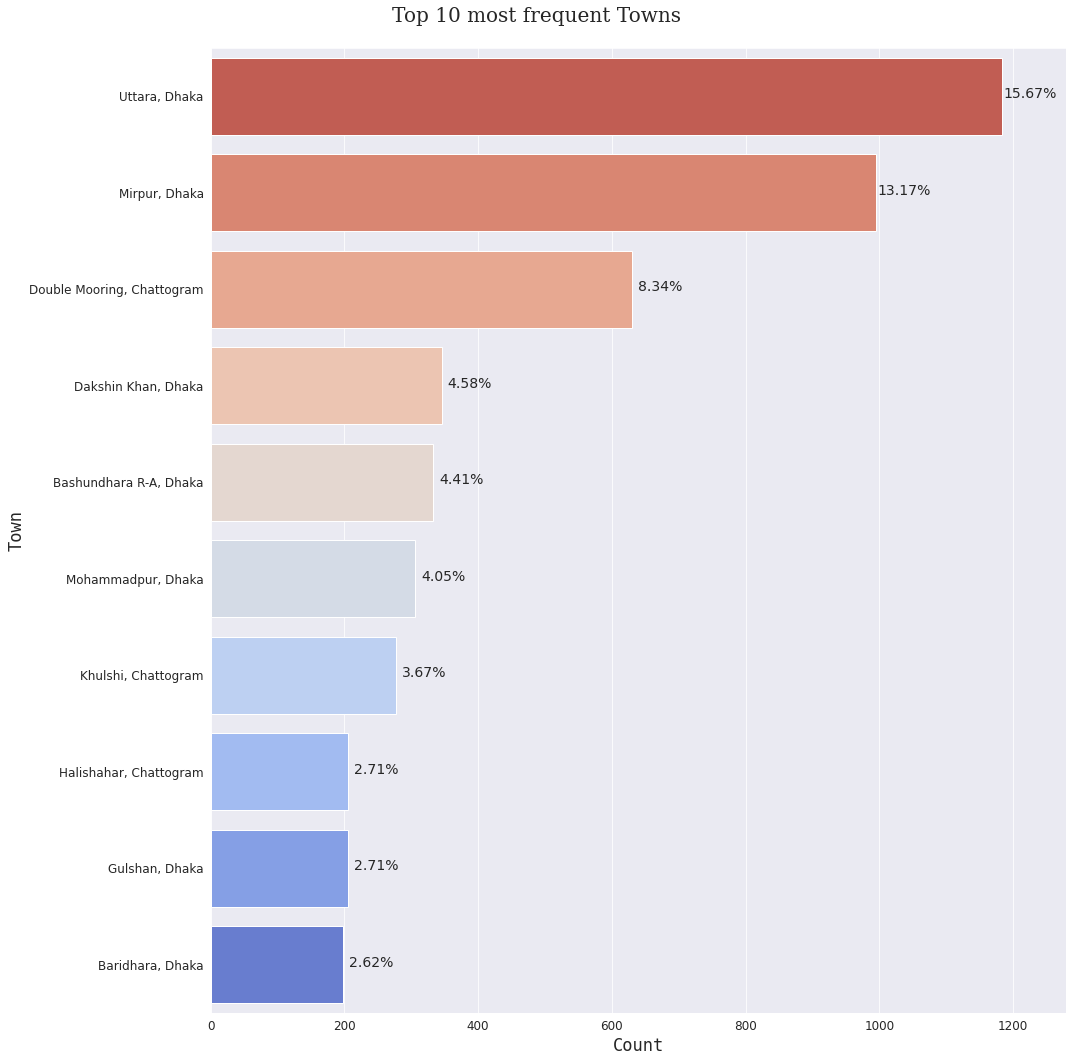

In [ ]:
with sns.axes_style("darkgrid"):
    figure, ax = plt.subplots(figsize=(15, 15))
    figure.suptitle("Top 10 most frequent Towns\n", fontsize=20, **title_font)

    fig = sns.countplot(
            data=prop_data,
            # x='Town',
            y='Town',
            # hue='City',
            order=prop_data['Town'].value_counts().index[:10],
            palette='coolwarm_r'
    )
    fig.set_xlabel('Count', fontsize=17, **label_font)
    ax.set_yticklabels(town_per_city['Town_city'][:10])
    fig.set_ylabel('Town', fontsize=17, **label_font)
    fig.tick_params(axis='x', labelsize=12)
    fig.tick_params(axis='y', labelsize=12)
    for p, val in zip(fig.patches, town_per_city['Percentage'][:10]):
    #     fig.annotate(f"{val}", (p.get_x() + p.get_width() / 2, p.get_height()),
    #                 xytext=(0, 4),
    #                 textcoords='offset points',
    #                 fontsize=12, ha='center', **label_font)
        fig.annotate(f"{val}%", (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(28, -2),
                     textcoords='offset points',
                     fontsize=14, ha='center')
    # Width(ax, 0.9)
    ax.margins(x=0.08)
plt.tight_layout()
plt.show()

>> Frequency of the Town that has renting information.

## Expensive Towns and their Regions

>> Top Expensive Towns in Dhaka

In [ ]:
# price_tag = 60000

# top_towns_dhaka = pd.pivot_table(
#     data=prop_data.loc[prop_data['City'] == "Dhaka"].query("Price > " + str(price_tag)),
#     index='Town',
#     values=['Price', 'Area', 'TotalRooms'],
#     aggfunc=['mean', 'count']
# ).sort_values(by=('mean', 'Price'), ascending=False)

In [ ]:
# top_towns_dhaka.reset_index()

In [ ]:
price_tag = 80000

top_most_expensive_towns_dhaka = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == "Dhaka"].query("Price >= " + str(price_tag)),
    index='Town',
    values=['Price', 'Area', 'TotalRooms'],
    aggfunc=['mean', 'median', 'count', 'max']
).sort_values(by=('mean', 'Price'), ascending=False)

In [ ]:
top_most_expensive_towns_dhaka = top_most_expensive_towns_dhaka.reset_index()

In [ ]:
top_most_expensive_towns_dhaka

Town         mean                            median            \
                            Area          Price TotalRooms    Area     Price   
0          Lalmatia  7250.000000  315000.000000  10.000000  7250.0  315000.0   
1           Nikunja  7666.666667  310000.000000  12.333333  7500.0  300000.0   
2         Baridhara  3569.770588  236158.823529   7.817647  3000.0  150000.0   
3         Dhanmondi  3228.250000  192000.000000   7.583333  2919.5  100000.0   
4   Bashundhara R-A  5628.875000  184375.000000  12.250000  3251.0  105000.0   
5           Gulshan  3219.402116  182820.105820   7.285714  3000.0  150000.0   
6            Uttara  3855.800000  169500.000000   9.675000  3000.0  100000.0   
7       Banani DOHS  3106.153846  146923.076923   7.692308  3000.0  150000.0   
8            Banani  2614.266667  138000.000000   6.977778  2450.0  120000.0   
9          Khilkhet  4000.000000  130000.000000  11.000000  4000.0  130000.0   
10        Kalabagan  2800.000000  120000.000000   8.000000  2800.0  120000.0   
11         Banasree  3500.000000  100000.000000  10.000000  3500.0  100000.0   
12   Baridhara DOHS  2570.000000   99333.333333   7.666667  2600.0   90000.0   
13         Shahbagh  2800.000000   95000.000000   7.333333  2800.0   90000.0   
14   Mohakhali DOHS  2550.000000   90833.333333   8.000000  2600.0   90000.0   
15     Shiddheswari  3200.000000   90000.000000   7.000000  3200.0   90000.0   
16     Kalachandpur  2900.000000   85000.000000   7.000000  2900.0   85000.0   
17           Mirpur  2300.000000   85000.000000   8.000000  2300.0   85000.0   
18      Mohammadpur  2544.000000   80000.000000   7.000000  2544.0   80000.0   
19          Niketan  2600.000000   80000.000000   7.000000  2600.0   80000.0   

              count                     max                        
   TotalRooms  Area Price TotalRooms   Area      Price TotalRooms  
0          10     2     2          2  12000   550000.0         14  
1          13     3     3          3   9000   330000.0         15  
2           7   170   170        170  31500  2000000.0         46  
3           7    12    12         12   7500   924000.0         11  
4           9    16    16         16  21000   700000.0         42  
5           7   189   189        189   8000  1000000.0         15  
6           8    40    40         40  16100  1000000.0         32  
7           8    13    13         13   4500   200000.0          9  
8           6    45    45         45   5000   500000.0         12  
9          11     1     1          1   4000   130000.0         11  
10          8     1     1          1   2800   120000.0          8  
11         10     1     1          1   3500   100000.0         10  
12          8    15    15         15   3500   150000.0         10  
13          7     3     3          3   2800   110000.0          8  
14          8     6     6          6   3000   110000.0         10  
15          7     1     1          1   3200    90000.0          7  
16          7     1     1          1   2900    85000.0          7  
17          8     1     1          1   2300    85000.0          8  
18          7     2     2          2   3000    80000.0          8  
19          7     1     1          1   2600    80000.0          7

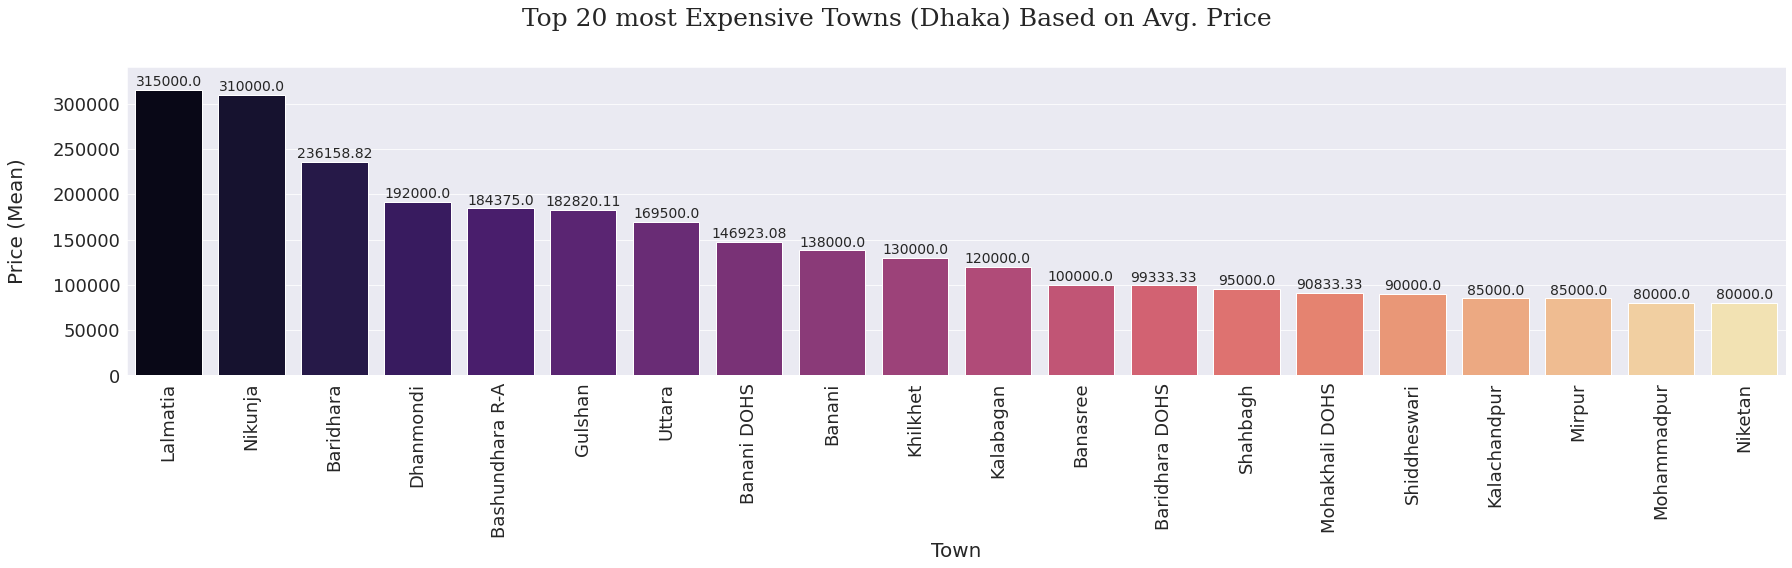

In [ ]:
with sns.axes_style("darkgrid"):
    figure, axes = plt.subplots(figsize=(25, 8))
    figure.suptitle("Top 20 most Expensive Towns (Dhaka) Based on Avg. Price\n", fontsize=25, **title_font)

    fig = sns.barplot(data=top_most_expensive_towns_dhaka,
            x='Town',
            y=('mean', 'Price'),
            palette='magma')
    
    axes.tick_params(axis='x', labelrotation=90, labelsize=18)
    axes.tick_params(axis='y', labelsize=18)
    axes.set_xlabel('Town', fontsize=20)
    axes.set_ylabel("Price (Mean)\n", fontsize=20)

    for p, val in zip(fig.patches, round(top_most_expensive_towns_dhaka[('mean', 'Price')], 2)):
        fig.annotate(f"{val}", (p.get_x() + p.get_width() / 2, p.get_height()),
                     xytext=(0, 4),
                     textcoords='offset points',
                     ha='center', fontsize=14)
        
    axes.margins(y=0.08)



plt.tight_layout()
plt.show()

In [ ]:
# top_most_expensive_towns_dhaka

>> Top Expensive Towns in Chattogram

In [ ]:
price_tag = 50000

top_most_expensive_towns_ctg = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == "Chattogram"].query("Price >= " + str(price_tag)),
    index=['Town'],
    values=['Price', 'Area', 'TotalRooms'],
    aggfunc=['mean', 'median', 'count', 'max']
).sort_values(by=('mean', 'Price'), ascending=False)

In [ ]:
top_most_expensive_towns_ctg

mean                           median  \
                                  Area          Price TotalRooms   Area   
Town                                                                      
Muradpur                   3600.000000  143333.333333   8.333333   2200   
Khulshi                    2431.202703   74594.594595   7.297297   2355   
Double Mooring             3200.000000   70000.000000  15.000000   3200   
Jamal Khan                 1500.000000   70000.000000   7.000000   1500   
Panchlaish                 3000.000000   60000.000000   8.000000   3000   
22 No. Enayet Bazaar Ward  3500.000000   58000.000000   8.000000   3500   
15 No. Bagmoniram Ward     1650.000000   55000.000000   6.000000   1650   
16 No. Chawk Bazaar Ward   3500.000000   50000.000000   9.000000   3500   
Chattogram                 1650.000000   50000.000000   4.000000   1650   

                                              count                    max  \
                             Price TotalRooms  Area Price TotalRooms  Area   
Town                                                                         
Muradpur                   80000.0          7     3     3          3  7000   
Khulshi                    70000.0          7    74    74         74  5000   
Double Mooring             70000.0         15     1     1          1  3200   
Jamal Khan                 70000.0          7     1     1          1  1500   
Panchlaish                 60000.0          8     2     2          2  3000   
22 No. Enayet Bazaar Ward  58000.0          8     1     1          1  3500   
15 No. Bagmoniram Ward     55000.0          6     1     1          1  1650   
16 No. Chawk Bazaar Ward   50000.0          9     1     1          1  3500   
Chattogram                 50000.0          4     1     1          1  1650   

                                                
                              Price TotalRooms  
Town                                            
Muradpur                   300000.0         12  
Khulshi                    200000.0         11  
Double Mooring              70000.0         15  
Jamal Khan                  70000.0          7  
Panchlaish                  60000.0          8  
22 No. Enayet Bazaar Ward   58000.0          8  
15 No. Bagmoniram Ward      55000.0          6  
16 No. Chawk Bazaar Ward    50000.0          9  
Chattogram                  50000.0          4

In [ ]:
top_most_expensive_towns_ctg = top_most_expensive_towns_ctg.reset_index()
top_most_expensive_towns_ctg

Town         mean                           median  \
                                     Area          Price TotalRooms   Area   
0                   Muradpur  3600.000000  143333.333333   8.333333   2200   
1                    Khulshi  2431.202703   74594.594595   7.297297   2355   
2             Double Mooring  3200.000000   70000.000000  15.000000   3200   
3                 Jamal Khan  1500.000000   70000.000000   7.000000   1500   
4                 Panchlaish  3000.000000   60000.000000   8.000000   3000   
5  22 No. Enayet Bazaar Ward  3500.000000   58000.000000   8.000000   3500   
6     15 No. Bagmoniram Ward  1650.000000   55000.000000   6.000000   1650   
7   16 No. Chawk Bazaar Ward  3500.000000   50000.000000   9.000000   3500   
8                 Chattogram  1650.000000   50000.000000   4.000000   1650   

                      count                    max                       
     Price TotalRooms  Area Price TotalRooms  Area     Price TotalRooms  
0  80000.0          7     3     3          3  7000  300000.0         12  
1  70000.0          7    74    74         74  5000  200000.0         11  
2  70000.0         15     1     1          1  3200   70000.0         15  
3  70000.0          7     1     1          1  1500   70000.0          7  
4  60000.0          8     2     2          2  3000   60000.0          8  
5  58000.0          8     1     1          1  3500   58000.0          8  
6  55000.0          6     1     1          1  1650   55000.0          6  
7  50000.0          9     1     1          1  3500   50000.0          9  
8  50000.0          4     1     1          1  1650   50000.0          4

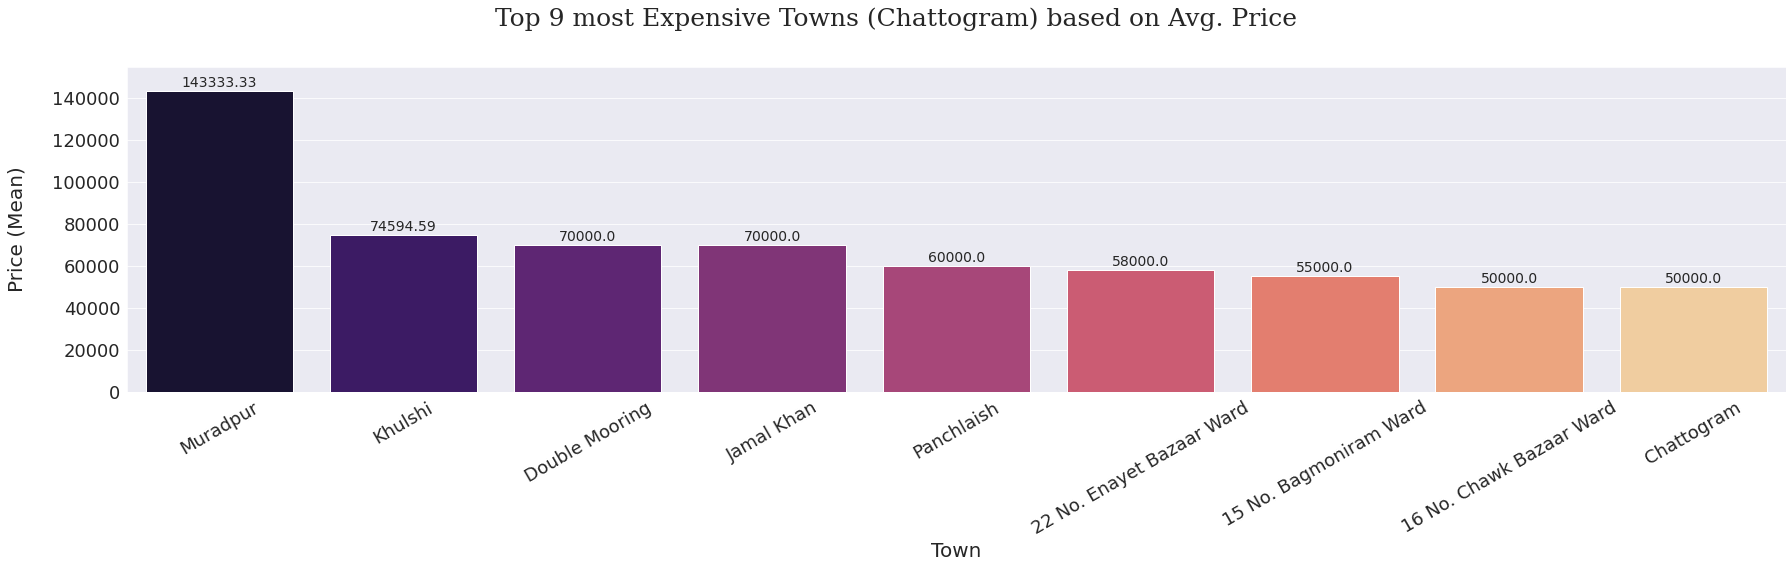

In [ ]:
with sns.axes_style("darkgrid"):
    figure, axes = plt.subplots(figsize=(25, 8))
    figure.suptitle("Top 9 most Expensive Towns (Chattogram) based on Avg. Price\n", fontsize=25, **title_font)

    fig = sns.barplot(data=top_most_expensive_towns_ctg,
            x='Town',
            y=('mean', 'Price'),
            palette='magma')
    
    axes.tick_params(axis='x', labelrotation=30, labelsize=18)
    axes.tick_params(axis='y', labelsize=18)
    axes.set_xlabel('Town', fontsize=20)
    axes.set_ylabel("Price (Mean)\n", fontsize=20)

    for p, val in zip(fig.patches, round(top_most_expensive_towns_ctg[('mean', 'Price')], 2)):
        fig.annotate(f"{val}", (p.get_x() + p.get_width() / 2, p.get_height()),
                     xytext=(0, 4),
                     textcoords='offset points',
                     ha='center', fontsize=14)
        
    axes.margins(y=0.08)



plt.tight_layout()
plt.show()

>> Which are the top most expensive regions in the top most expensive towns


In [ ]:
price_tag = 80000

top_most_expensive_regions_dhaka = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == "Dhaka"].query("Price >= " + str(price_tag)),
    index=['Town', 'Region'],
    values=['Price', 'Area', 'TotalRooms'],
    aggfunc=['mean', 'median', 'count', 'max']
).sort_values(by=('mean', 'Price'), ascending=False)

In [ ]:
top_most_expensive_regions_dhaka = top_most_expensive_regions_dhaka.reset_index()
top_most_expensive_regions_dhaka

Town             Region          mean                  \
                                                Area           Price   
0            Uttara          Road No 2  16100.000000  1000000.000000   
1          Lalmatia           Lalmatia   7250.000000   315000.000000   
2           Nikunja          Nikunja 1   7666.666667   310000.000000   
3         Baridhara          Baridhara   3569.770588   236158.823529   
4           Gulshan          Gulshan 2   3215.312000   195504.000000   
5         Dhanmondi          Dhanmondi   3228.250000   192000.000000   
6   Bashundhara R-A    Bashundhara R-A   5628.875000   184375.000000   
7           Gulshan          Gulshan 1   3227.390625   158046.875000   
8            Uttara             Uttara   3546.894737   149473.684211   
9       Banani DOHS        Banani DOHS   3106.153846   146923.076923   
10           Banani             Banani   2614.266667   138000.000000   
11         Khilkhet        Bepari Para   4000.000000   130000.000000   
12        Kalabagan          Kalabagan   2800.000000   120000.000000   
13         Banasree           Banasree   3500.000000   100000.000000   
14           Uttara  Shayesta Khan Ave   3350.000000   100000.000000   
15   Baridhara DOHS     Baridhara DOHS   2570.000000    99333.333333   
16         Shahbagh           Shahbagh   2800.000000    95000.000000   
17   Mohakhali DOHS     Mohakhali DOHS   2550.000000    90833.333333   
18     Shiddheswari       Shiddheswari   3200.000000    90000.000000   
19     Kalachandpur       Kalachandpur   2900.000000    85000.000000   
20           Mirpur        Mirpur DOHS   2300.000000    85000.000000   
21      Mohammadpur        Mohammadpur   2544.000000    80000.000000   
22          Niketan            Niketan   2600.000000    80000.000000   

                median                       count                     max  \
   TotalRooms     Area      Price TotalRooms  Area Price TotalRooms   Area   
0   31.000000  16100.0  1000000.0         31     1     1          1  16100   
1   10.000000   7250.0   315000.0         10     2     2          2  12000   
2   12.333333   7500.0   300000.0         13     3     3          3   9000   
3    7.817647   3000.0   150000.0          7   170   170        170  31500   
4    7.320000   3000.0   160000.0          7   125   125        125   7000   
5    7.583333   2919.5   100000.0          7    12    12         12   7500   
6   12.250000   3251.0   105000.0          9    16    16         16  21000   
7    7.218750   2925.0   140000.0          7    64    64         64   8000   
8    9.157895   2950.0   100000.0          8    38    38         38  14000   
9    7.692308   3000.0   150000.0          8    13    13         13   4500   
10   6.977778   2450.0   120000.0          6    45    45         45   5000   
11  11.000000   4000.0   130000.0         11     1     1          1   4000   
12   8.000000   2800.0   120000.0          8     1     1          1   2800   
13  10.000000   3500.0   100000.0         10     1     1          1   3500   
14   8.000000   3350.0   100000.0          8     1     1          1   3350   
15   7.666667   2600.0    90000.0          8    15    15         15   3500   
16   7.333333   2800.0    90000.0          7     3     3          3   2800   
17   8.000000   2600.0    90000.0          8     6     6          6   3000   
18   7.000000   3200.0    90000.0          7     1     1          1   3200   
19   7.000000   2900.0    85000.0          7     1     1          1   2900   
20   8.000000   2300.0    85000.0          8     1     1          1   2300   
21   7.000000   2544.0    80000.0          7     2     2          2   3000   
22   7.000000   2600.0    80000.0          7     1     1          1   2600   

                          
        Price TotalRooms  
0   1000000.0         31  
1    550000.0         14  
2    330000.0         15  
3   2000000.0         46  
4   1000000.0         15  
5    924000.0         11  
6    700000.0         42  
7    350000.0       

In [ ]:
top_most_expensive_regions_dhaka = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == "Dhaka"].query("Price >= " + str(price_tag)),
    index=['Town', 'Region'],
    values=['Price', 'Area', 'TotalRooms'],
    aggfunc=['mean', 'median', 'count', 'max']
).sort_values(by=('mean', 'Price'), ascending=False)

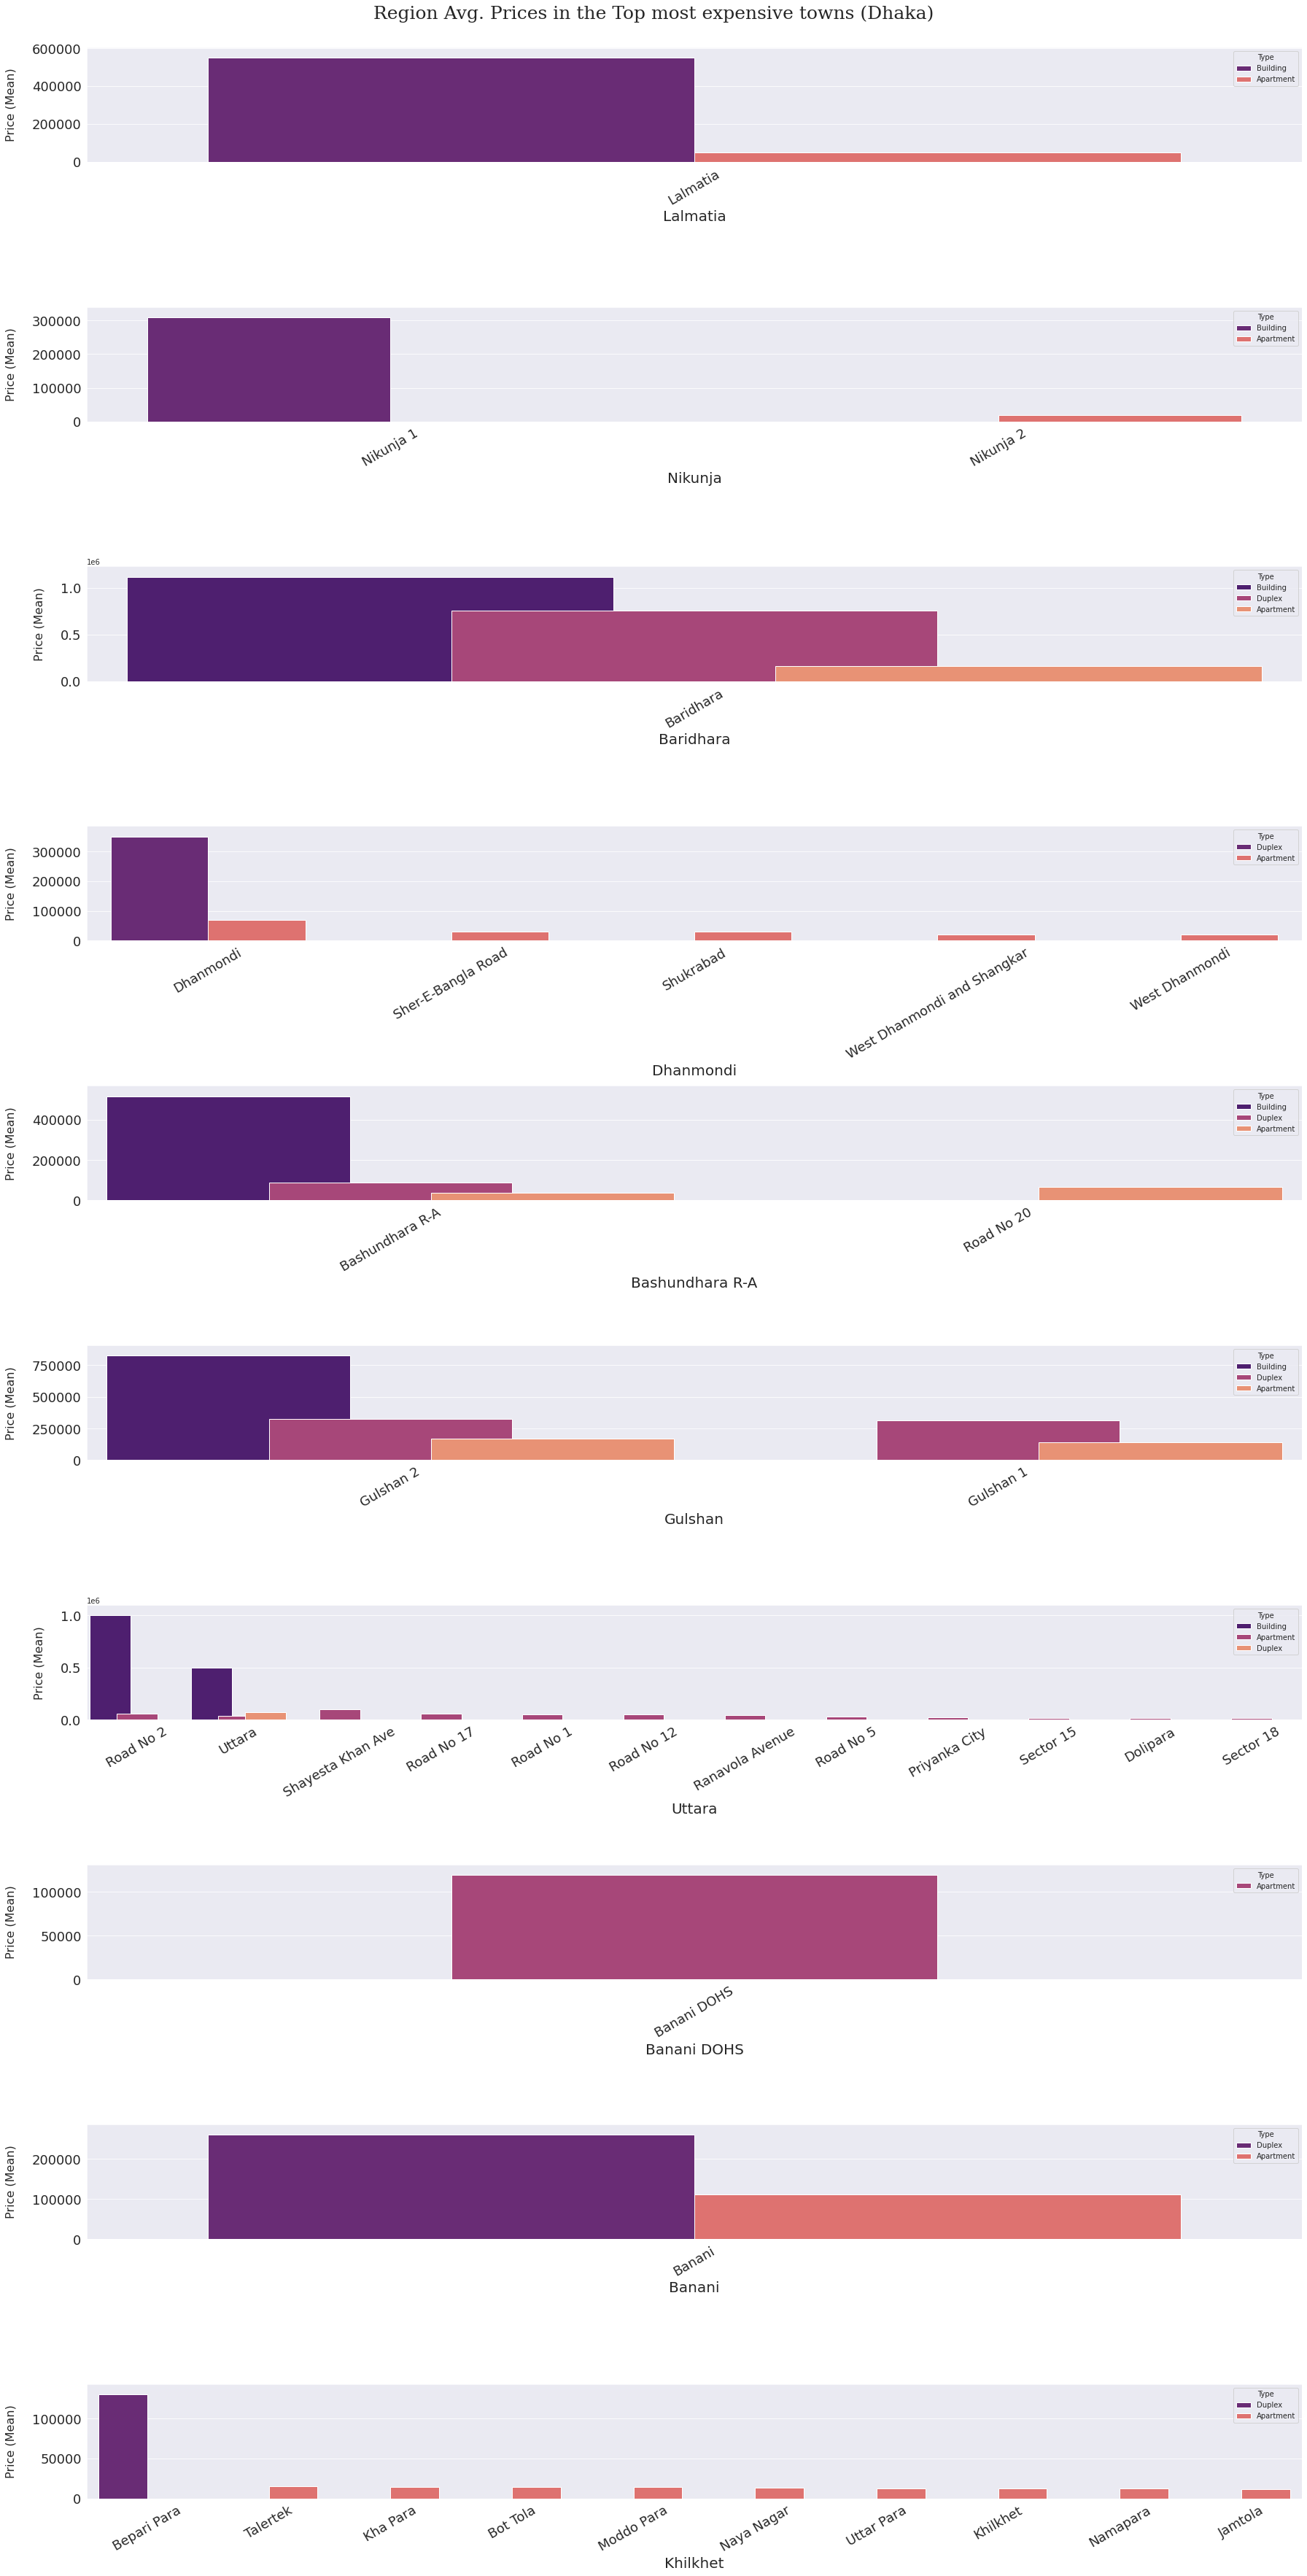

In [ ]:
price_tag = 80000

with sns.axes_style("darkgrid"):
    n_rows, n_cols = (len(top_most_expensive_towns_dhaka[:10]), 1)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 50))
    figure.suptitle("Region Avg. Prices in the Top most expensive towns (Dhaka)\n\n\n", fontsize=25, **title_font)

    for i, town in enumerate(top_most_expensive_towns_dhaka['Town'][:10]):

        fig = sns.barplot(data=pd.pivot_table(
            data=prop_data.loc[prop_data['Town'] == town],
            index=['Type', 'Town', 'Region'], 
            values='Price',
            aggfunc='mean'
        ).sort_values(by='Price', ascending=False).reset_index(),

                x='Region',
                y='Price',
                hue='Type',
                ax=axes[i],
                palette='magma')
        
        axes[i].tick_params(axis='x', labelrotation=30, labelsize=18)
        axes[i].tick_params(axis='y', labelsize=18)
        axes[i].set_xlabel(town, fontsize=20)
        axes[i].set_ylabel("Price (Mean)\n", fontsize=16)

        # for p, val in zip(fig.patches, round(top_most_expensive_towns_ctg[('mean', 'Price')], 2)):
        #     fig.annotate(f"{val}", (p.get_x() + p.get_width() / 2, p.get_height()),
        #                 xytext=(0, 4),
        #                 textcoords='offset points',
        #                 ha='center', fontsize=14)
            
        axes[i].margins(y=0.1)
        Width(axes[i], 0.4)



plt.tight_layout()
plt.show()

>> There seem to be a lot of price variation in the regions of expensive towns (Dhaka).

>> The property "Type" made the difference here. The Building or Duplex house which are expensive contributed to the huge difference. Which is evident from the figure

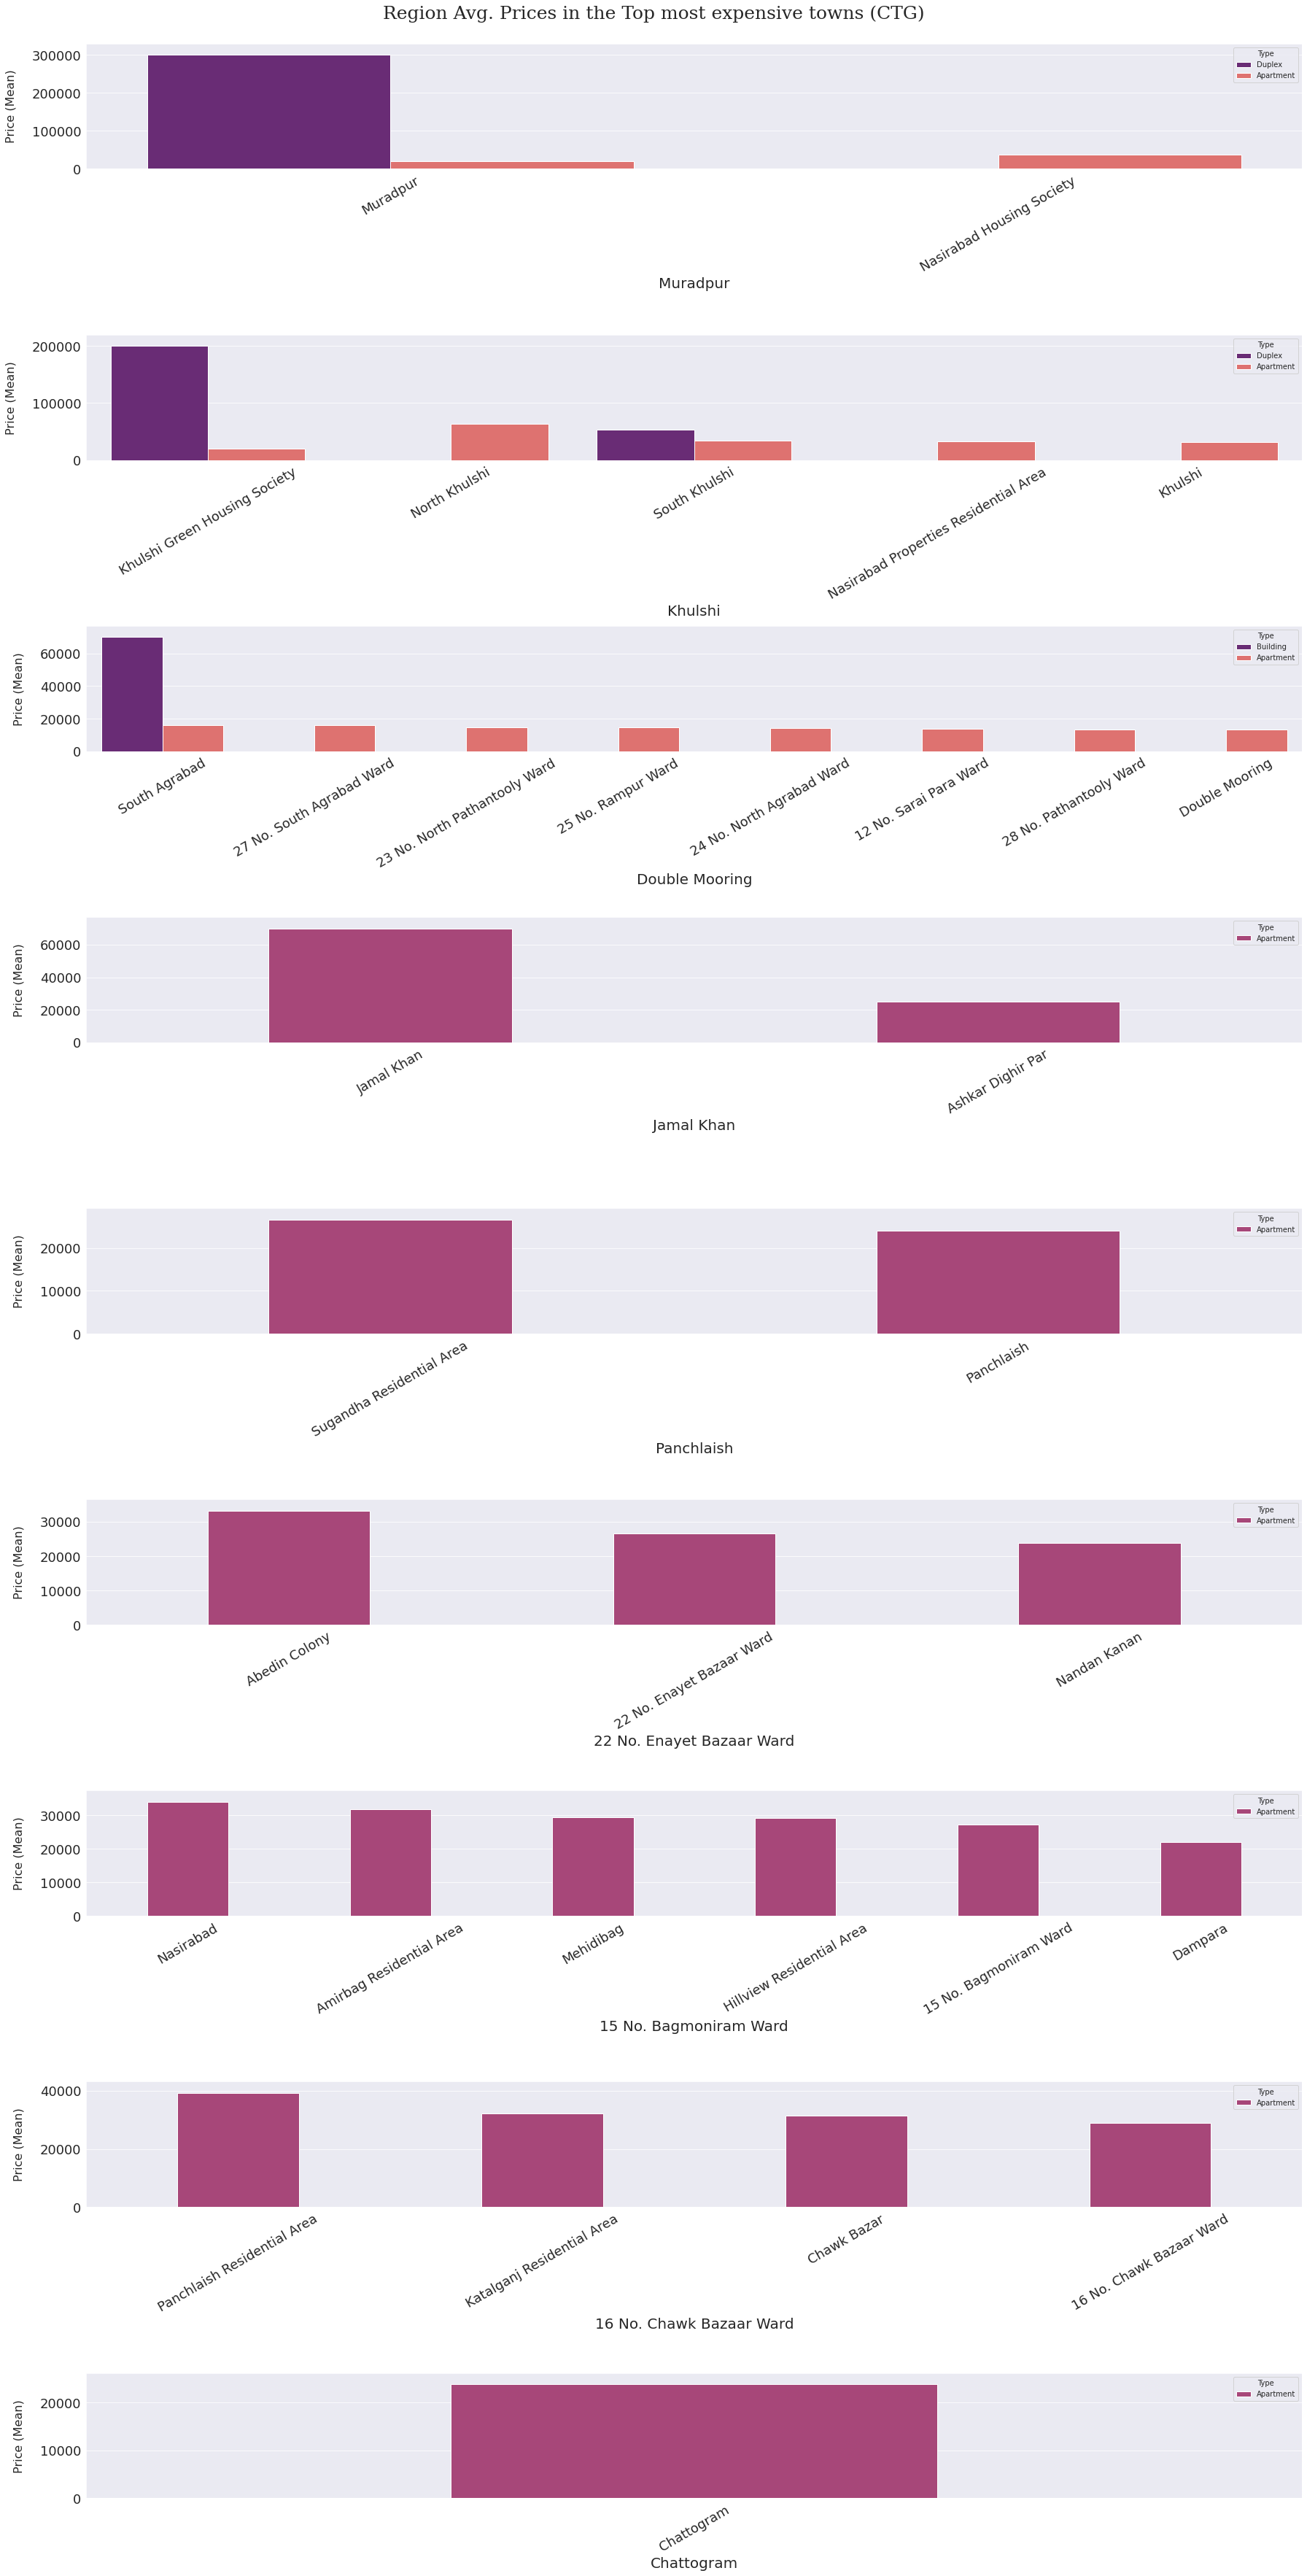

In [ ]:
price_tag = 80000

with sns.axes_style("darkgrid"):
    n_rows, n_cols = (len(top_most_expensive_towns_ctg), 1)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 50))
    figure.suptitle("Region Avg. Prices in the Top most expensive towns (CTG)\n\n\n", fontsize=25, **title_font)

    for i, town in enumerate(top_most_expensive_towns_ctg['Town'][:10]):

        fig = sns.barplot(data=pd.pivot_table(
            data=prop_data.loc[prop_data['Town'] == town],
            index=['Type', 'Town', 'Region'], 
            values='Price',
            aggfunc='mean'
        ).sort_values(by='Price', ascending=False).reset_index(),

                x='Region',
                y='Price',
                hue='Type',
                ax=axes[i],
                palette='magma')
        
        axes[i].tick_params(axis='x', labelrotation=30, labelsize=18)
        axes[i].tick_params(axis='y', labelsize=18)
        axes[i].set_xlabel(town, fontsize=20)
        axes[i].set_ylabel("Price (Mean)\n", fontsize=16)

        # for p, val in zip(fig.patches, round(top_most_expensive_towns_ctg[('mean', 'Price')], 2)):
        #     fig.annotate(f"{val}", (p.get_x() + p.get_width() / 2, p.get_height()),
        #                 xytext=(0, 4),
        #                 textcoords='offset points',
        #                 ha='center', fontsize=14)
            
        axes[i].margins(y=0.1)
        Width(axes[i], 0.4)



plt.tight_layout()
plt.show()

>> Price variaton in the regions of the expensive areas in Chattogram seems more steady.

## Less expensive towns and their Regions

In [ ]:
price_tag = 15000

most_inexpensive_towns_dhaka = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == "Dhaka"].query("Price <= " + str(price_tag)),
    index='Town',
    values=['Price', 'Area', 'TotalRooms'],
    aggfunc=['mean', 'median', 'count', 'max']
).sort_values(by=('mean', 'Price'), ascending=True)

most_inexpensive_towns_dhaka

mean                          median           \
                           Area         Price TotalRooms   Area    Price   
Town                                                                       
Demra                625.000000   7250.000000   3.000000    625   7250.0   
Dhaka                700.000000  10500.000000   3.000000    700  10500.0   
Lalbagh              600.000000  12000.000000   3.000000    600  12000.0   
Kafrul               725.000000  12000.000000   3.500000    725  12000.0   
Jatra Bari           800.000000  12000.000000   4.000000    800  12000.0   
Kachukhet            650.000000  12000.000000   3.000000    650  12000.0   
Mirpur               773.834043  12177.446809   4.010638    700  12500.0   
Khilkhet             698.636364  12204.545455   4.022727    700  11500.0   
Uttar Khan           856.250000  12212.500000   4.662500    800  12000.0   
Dakshin Khan         845.840000  12330.400000   4.340000    750  12000.0   
Hazaribag            735.714286  12500.000000   3.714286    750  12000.0   
Cantonment           935.961538  12509.615385   4.750000    900  12500.0   
Ibrahimpur           798.888889  13222.222222   3.888889    800  14000.0   
Banasree             865.294118  13294.117647   4.235294    900  14000.0   
Badda                737.037037  13333.333333   3.925926    720  14000.0   
Bashabo              825.000000  13375.000000   4.250000    925  15000.0   
Kalachandpur         650.000000  13500.000000   3.500000    700  14500.0   
Joar Sahara          775.000000  13583.333333   4.000000    725  13500.0   
Malibagh             550.000000  13750.000000   3.000000    550  13500.0   
Agargaon             736.363636  13863.636364   3.636364    800  15000.0   
Mohammadpur          789.275362  13869.565217   4.108696    750  14500.0   
Dhanmondi            720.000000  14000.000000   3.333333    800  15000.0   
Baridhara            700.000000  14000.000000   4.000000    700  14000.0   
Kuril                700.000000  14000.000000   4.000000    700  14000.0   
North Shahjahanpur   950.000000  14000.000000   4.000000    950  14000.0   
Rampura              725.000000  14166.666667   3.666667    750  14500.0   
Sutrapur             988.888889  14333.333333   4.777778   1000  15000.0   
Uttara              1367.764398  14422.513089   5.691099   1654  15000.0   
Tejgaon              600.000000  14500.000000   3.500000    600  14500.0   
Khilgaon             650.000000  14750.000000   3.750000    650  15000.0   
Turag               1170.000000  14777.777778   5.722222   1200  15000.0   
Adabor               837.878788  14939.393939   4.181818    800  15000.0   
Maghbazar            700.000000  15000.000000   4.000000    700  15000.0   
Shyamoli             706.666667  15000.000000   4.000000    700  15000.0   
Bashundhara R-A      800.000000  15000.000000   4.000000    800  15000.0   
Taltola              700.000000  15000.000000   4.000000    700  15000.0   
Mohakhali            625.000000  15000.000000   3.000000    625  15000.0   

                              count                    max                      
                   TotalRooms  Area Price TotalRooms  Area    Price TotalRooms  
Town                                                                            
Demra                     3.0     2     2          2   650   7500.0          3  
Dhaka                     3.0     2     2          2   700  10500.0          3  
Lalbagh                   3.0     2     2          2   600  12000.0          3  
Kafrul                    3.5     2     2          2   750  13000.0          4  
Jatra Bari                4.0     1     1          1   800  12000.0          4  
Kachukhet                 3.0     1     1          1   650  12000.0          3  
Mirpur                    4.0   470   470        470  1400  15000.0          6  
Khilkhet                  4.0    44    44         44  1300  15000.0          6  
Uttar Khan                4.0   160   160        160  1200  15000.0          6  
Dakshin Khan  

>> The most **inexpensive** area in **Dhaka** is **Demra**, with avg. rent of 7250 BDT

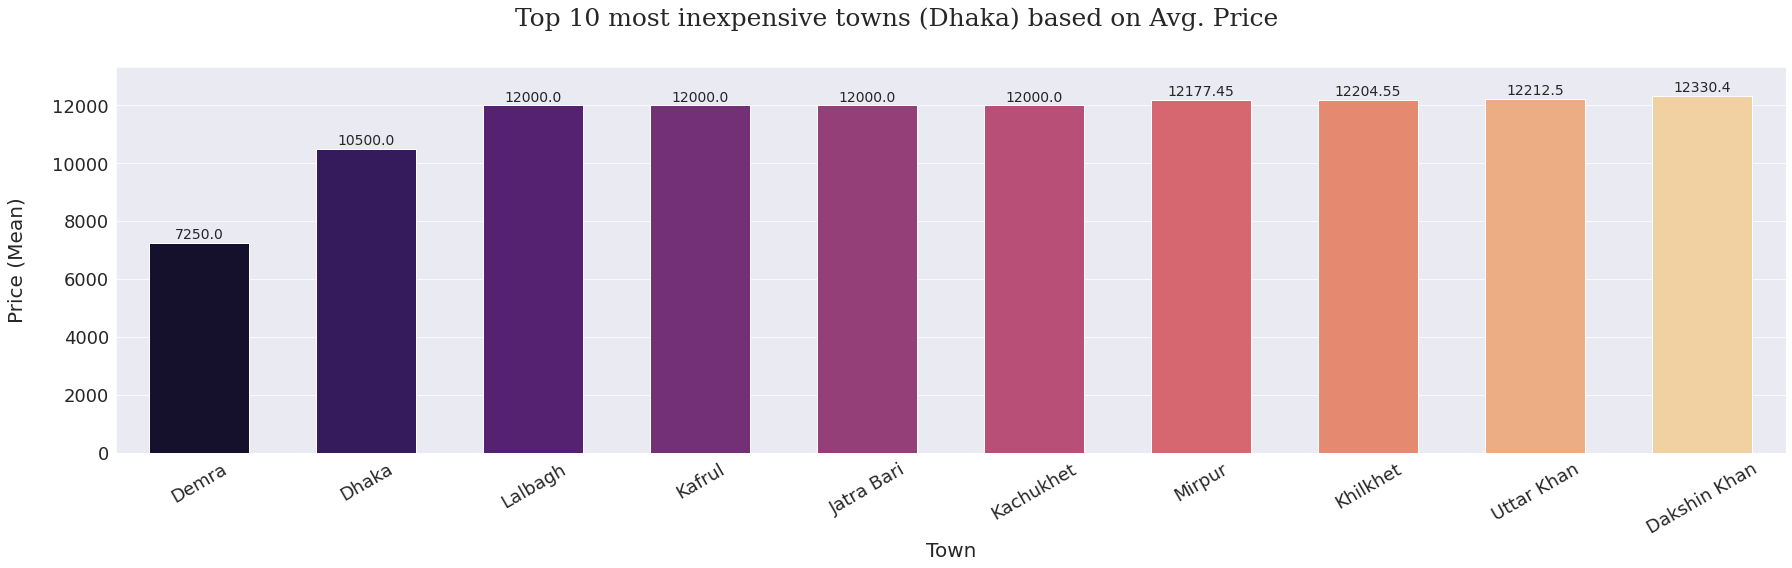

In [ ]:
with sns.axes_style("darkgrid"):
    figure, axes = plt.subplots(figsize=(25, 8))
    figure.suptitle("Top 10 most inexpensive towns (Dhaka) based on Avg. Price\n", fontsize=25, **title_font)

    fig = sns.barplot(data=most_inexpensive_towns_dhaka.reset_index().head(10),
            x='Town',
            y=('mean', 'Price'),
            palette='magma')
    
    axes.tick_params(axis='x', labelrotation=30, labelsize=18)
    axes.tick_params(axis='y', labelsize=18)
    axes.set_xlabel('Town', fontsize=20)
    axes.set_ylabel("Price (Mean)\n", fontsize=20)

    for p, val in zip(fig.patches, round(most_inexpensive_towns_dhaka[('mean', 'Price')], 2)):
        fig.annotate(f"{val}", (p.get_x() + p.get_width() / 2, p.get_height()),
                     xytext=(0, 4),
                     textcoords='offset points',
                     ha='center', fontsize=14)
        
    axes.margins(y=0.08)
    Width(axes, 0.6)



plt.tight_layout()
plt.show()

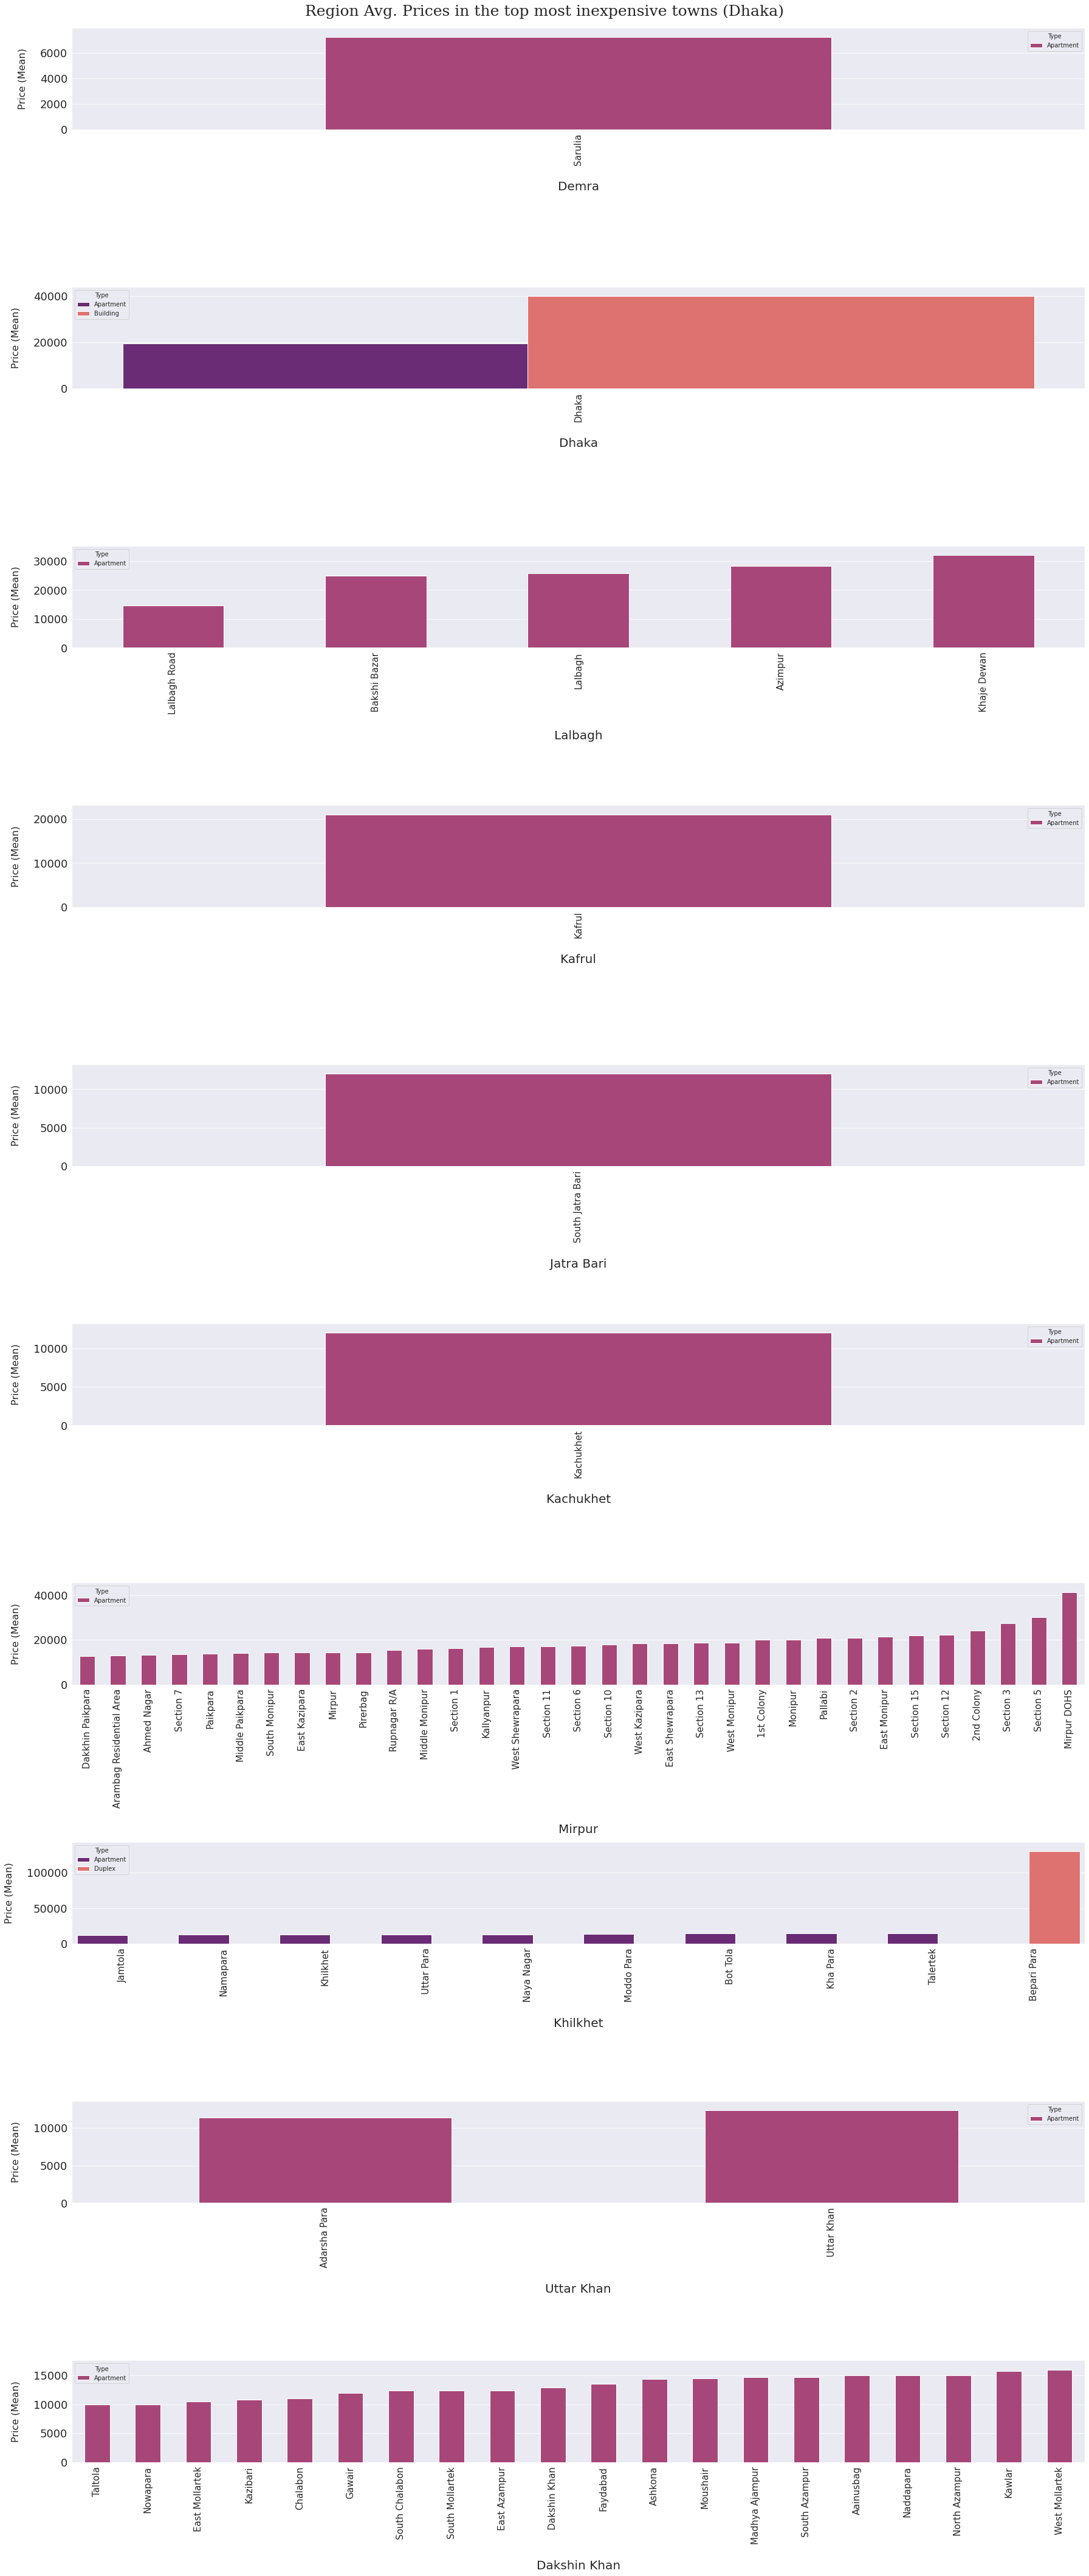

In [ ]:
price_tag = 80000

with sns.axes_style("darkgrid"):
    n_rows, n_cols = (len(most_inexpensive_towns_dhaka[:10]), 1)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 60))
    figure.suptitle("Region Avg. Prices in the top most inexpensive towns (Dhaka)\n\n\n", fontsize=25, **title_font)

    for i, town in enumerate(most_inexpensive_towns_dhaka.reset_index()['Town'][:10]):

        fig = sns.barplot(data=pd.pivot_table(
            data=prop_data.loc[prop_data['Town'] == town],
            index=['Type', 'Town', 'Region'], 
            values='Price',
            aggfunc='mean'
        ).sort_values(by='Price', ascending=True).reset_index(),

                x='Region',
                y='Price',
                hue='Type',
                ax=axes[i],
                palette='magma')
        
        axes[i].tick_params(axis='x', labelrotation=90, labelsize=15)
        axes[i].tick_params(axis='y', labelsize=18)
        axes[i].set_xlabel("\n" + town, fontsize=20)
        axes[i].set_ylabel("Price (Mean)\n", fontsize=16)

        # for p, val in zip(fig.patches, round(top_most_expensive_towns_ctg[('mean', 'Price')], 2)):
        #     fig.annotate(f"{val}", (p.get_x() + p.get_width() / 2, p.get_height()),
        #                 xytext=(0, 4),
        #                 textcoords='offset points',
        #                 ha='center', fontsize=14)
            
        axes[i].margins(y=0.1)
        Width(axes[i], 0.5)

plt.tight_layout()
plt.show()

## Sector-Block information

In [ ]:
town_sector_table_dhaka = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == 'Dhaka'],
    index='Town',
    values='Sector_or_Block',
    aggfunc='count'
).sort_values(by='Sector_or_Block', ascending=False).reset_index().head(20)

In [ ]:
town_sector_table_dhaka

Town  Sector_or_Block
0            Uttara             1184
1            Mirpur              995
2      Dakshin Khan              346
3   Bashundhara R-A              333
4       Mohammadpur              306
5           Gulshan              205
6         Baridhara              198
7             Badda              179
8        Uttar Khan              160
9            Adabor              156
10         Banasree              122
11        Dhanmondi              103
12         Agargaon               81
13       Cantonment               74
14      Aftab Nagar               70
15           Banani               65
16         Khilgaon               55
17         Khilkhet               55
18         Shyamoli               48
19        Hazaribag               46

In [ ]:
# pd.pivot_table(
#     data=prop_data[(prop_data['City'] == 'Dhaka') & (prop_data['Town'] == 'Uttara')],
#     index=['Town', 'Sector_or_Block'],
#     values='Price',
#     aggfunc='mean'
#     ).sort_values(by='Sector_or_Block', ascending=True).reset_index()

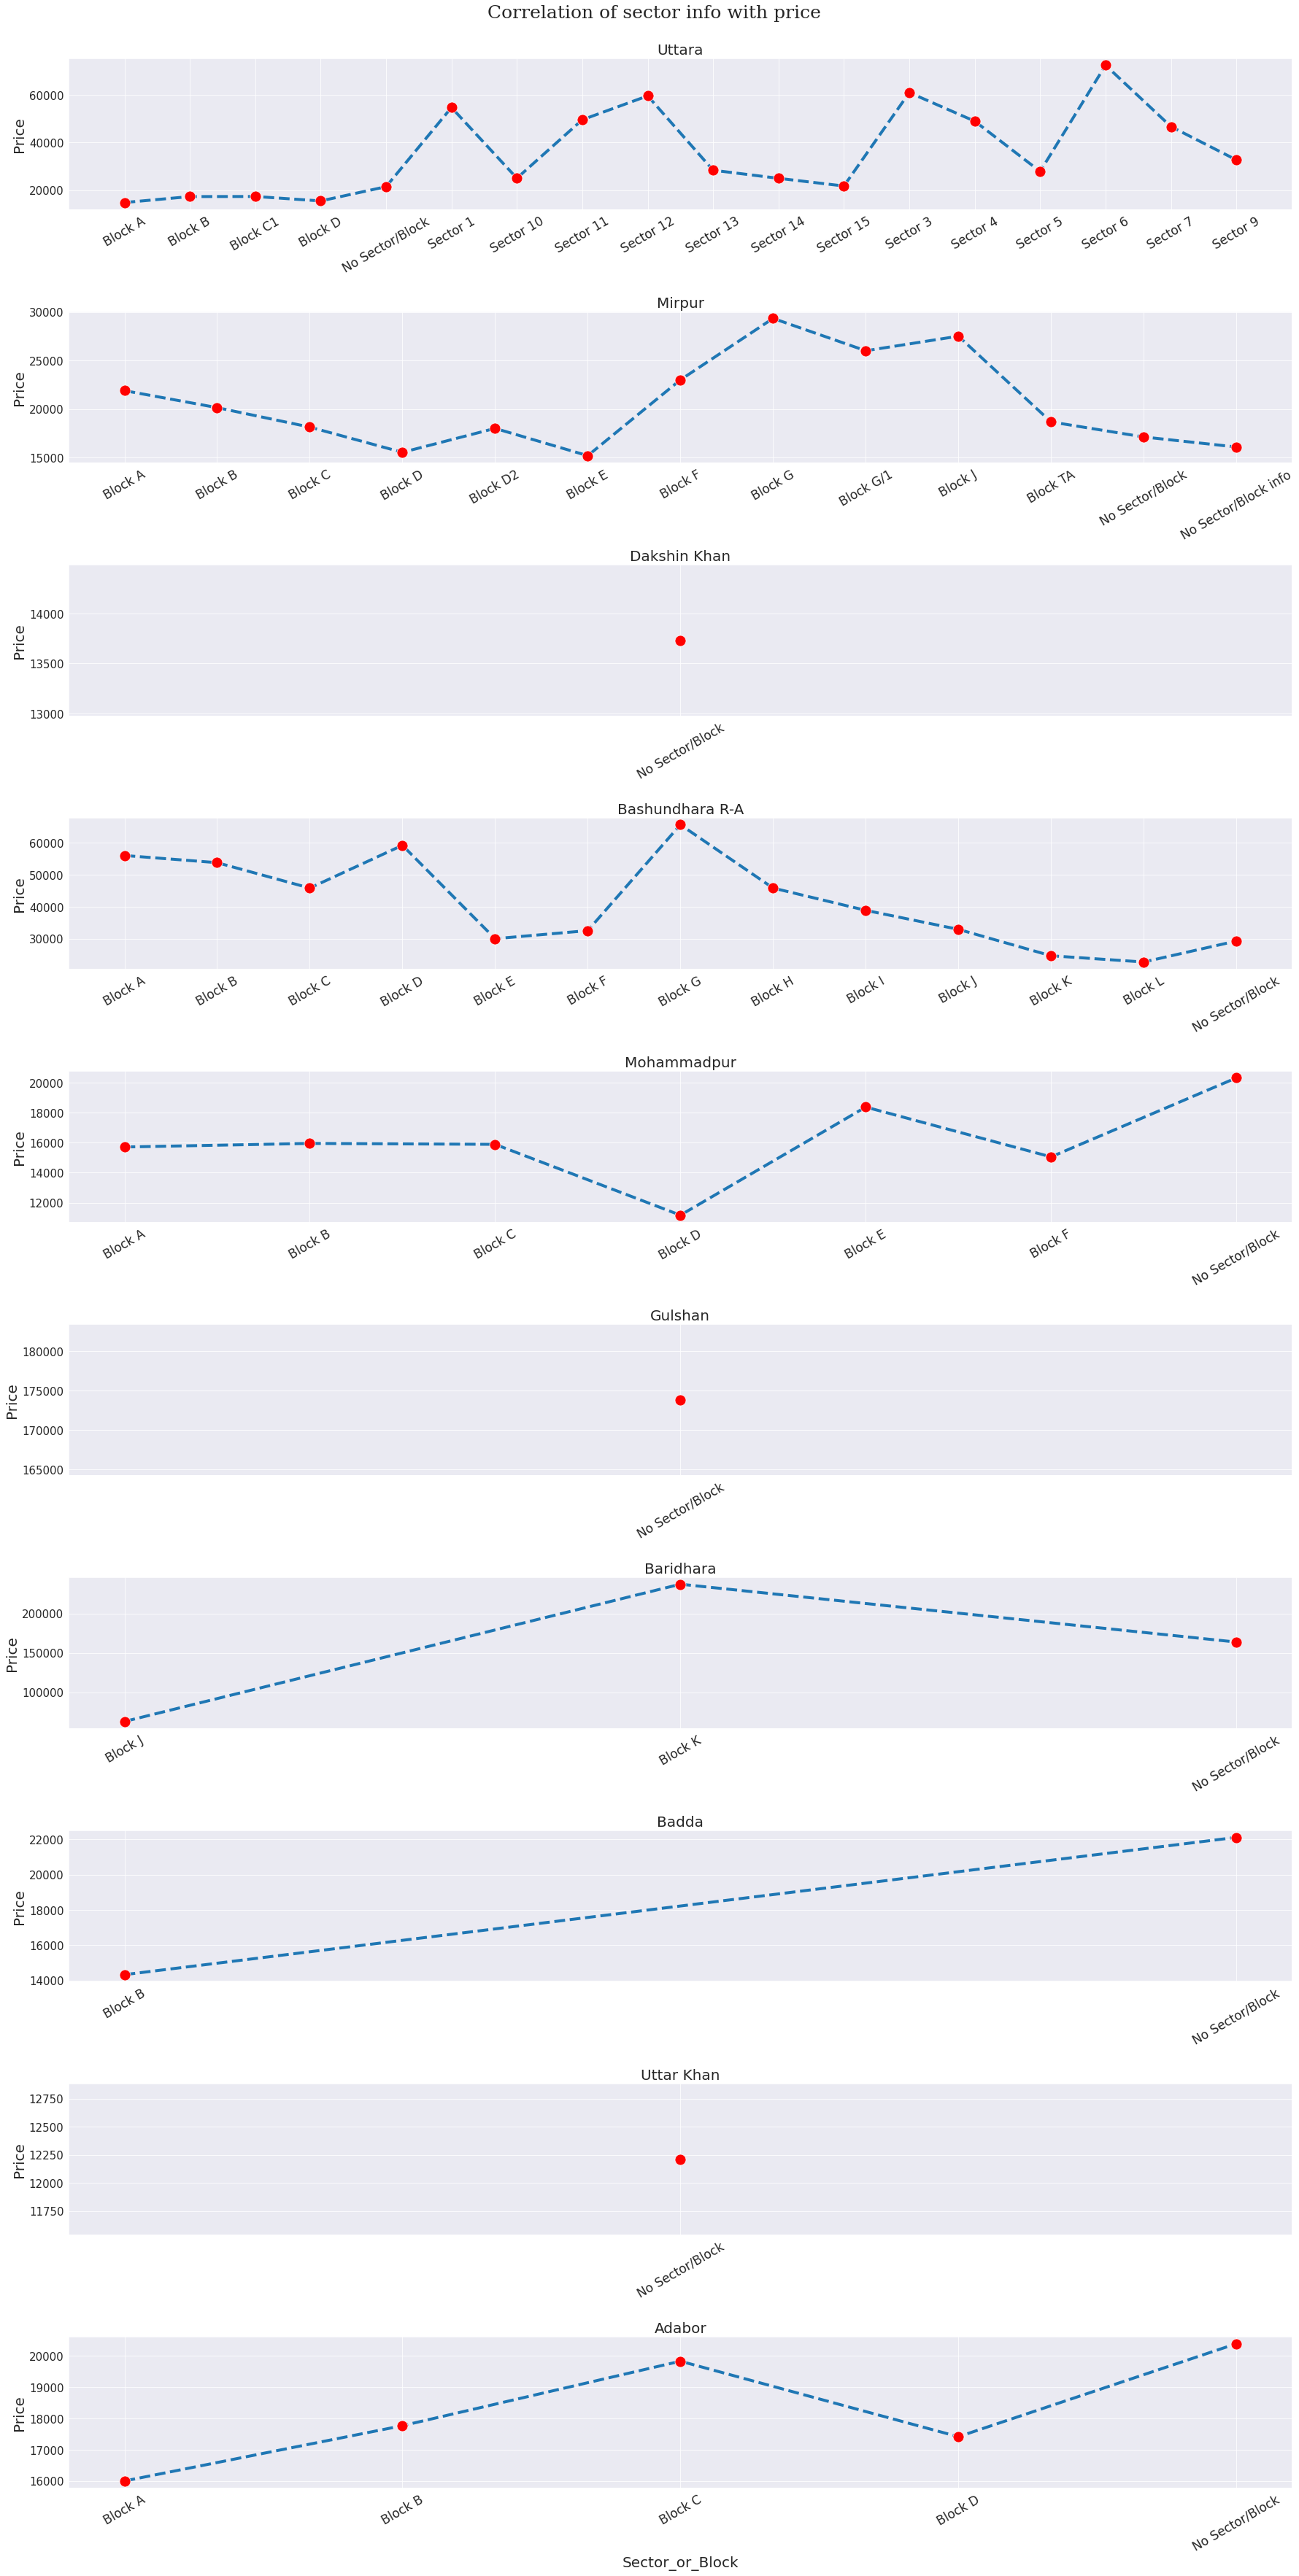

In [ ]:
with sns.axes_style('darkgrid'):
    n_rows, n_cols = (len(town_sector_table_dhaka[:10]), 1)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 50))
    figure.suptitle("Correlation of sector info with price\n\n\n", fontsize=25,**title_font)

    for i, col in enumerate(town_sector_table_dhaka['Town'][:10]):
        fig = sns.lineplot(
            data=pd.pivot_table(
                    data=prop_data[(prop_data['Town'] == col)],
                    index=['Town', 'Sector_or_Block'],
                    values='Price',
                    aggfunc='mean'
                    ).sort_values(by='Sector_or_Block', ascending=True).reset_index(),
                x='Sector_or_Block', 
                y='Price', 
                # size=12,
                lw=4,
                linestyle='--',
                markers=True,
                marker='o',
                markersize=15,
                markerfacecolor='red',
                ax=axes[i]
        )
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Price', fontsize=20)
        axes[i].set_title(col, fontsize=20)
        # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, fontsize=17)
        axes[i].tick_params(axis='x', labelrotation=30, labelsize=17)
        # axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=15)
        # axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=15)
        axes[i].tick_params(axis='y', labelsize=15)

        # fig.set_xticklabels(fig.get_xticklabels(), rotation=90, fontsize=20)
        # fig.set_yticklabels(fig.get_yticks(), fontsize=20)
axes[i].set_xlabel('Sector_or_Block', fontsize=20)    
plt.tight_layout()
plt.show()

>> So, wanted to find out, if there's a relation between the sectro or block information vs the Price. I was thinking, maybe average rent in sector is higher than secotor 1, rent in sector 3 is more than sector 2 and so on, or the vice versa. Well, looking at the figure, it doesn't reflect my theory

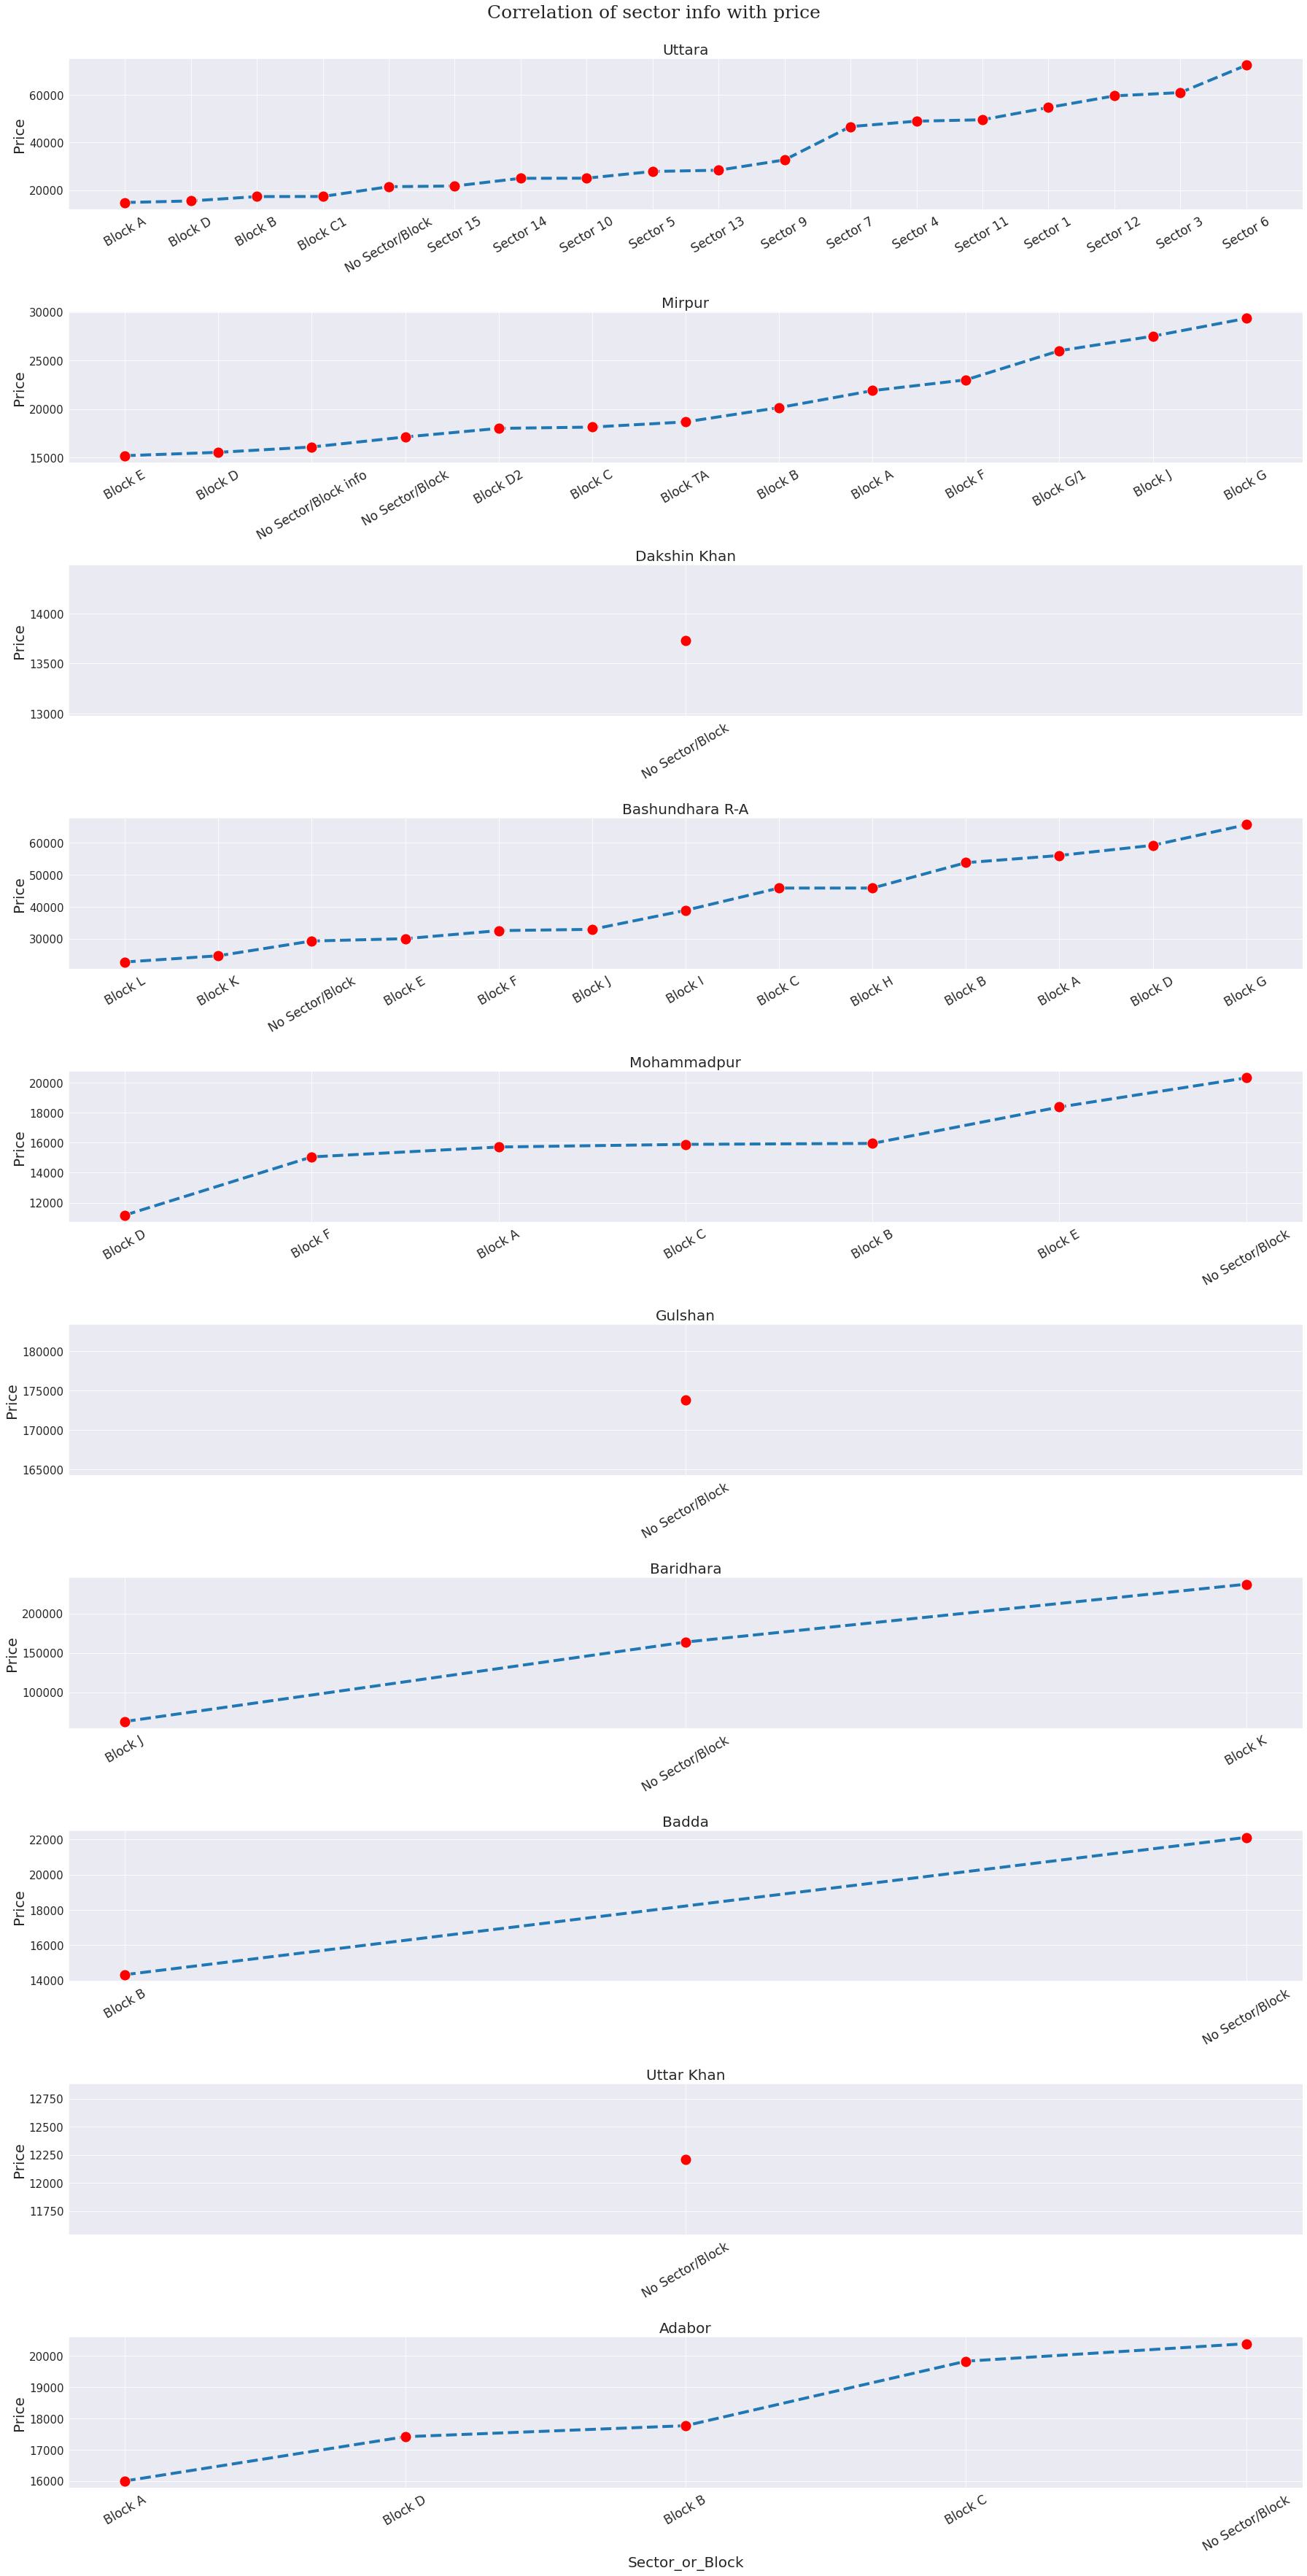

In [ ]:
with sns.axes_style('darkgrid'):
    n_rows, n_cols = (len(town_sector_table_dhaka[:10]), 1)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 50))
    figure.suptitle("Correlation of sector info with price\n\n\n", fontsize=25,**title_font)

    for i, col in enumerate(town_sector_table_dhaka['Town'][:10]):
        fig = sns.lineplot(
            data=pd.pivot_table(
                    data=prop_data[(prop_data['Town'] == col)],
                    index=['Town', 'Sector_or_Block'],
                    values='Price',
                    aggfunc='mean'
                    ).sort_values(by='Price', ascending=True).reset_index(),
                x='Sector_or_Block', 
                y='Price', 
                # size=12,
                lw=4,
                linestyle='--',
                markers=True,
                marker='o',
                markersize=15,
                markerfacecolor='red',
                ax=axes[i]
        )
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Price', fontsize=20)
        axes[i].set_title(col, fontsize=20)
        # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, fontsize=17)
        axes[i].tick_params(axis='x', labelrotation=30, labelsize=17)
        # axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=15)
        # axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=15)
        axes[i].tick_params(axis='y', labelsize=15)

        # fig.set_xticklabels(fig.get_xticklabels(), rotation=90, fontsize=20)
        # fig.set_yticklabels(fig.get_yticks(), fontsize=20)
axes[i].set_xlabel('Sector_or_Block', fontsize=20)    
plt.tight_layout()
plt.show()

>> Nope, the increase of rent is random in contrast with the sector or block inforamation. Or am I missing anything?

>> Let's see the same thing for Chattogram, then we will wrap it up

In [ ]:
town_sector_table_ctg = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == 'Chattogram'],
    index='Town',
    values='Sector_or_Block',
    aggfunc='count'
).sort_values(by='Sector_or_Block', ascending=False).reset_index().head(20)

In [ ]:
town_sector_table_ctg

Town  Sector_or_Block
0                Double Mooring              630
1                       Khulshi              277
2                    Halishahar              205
3                       Bayazid              193
4     11 No. South Kattali Ward              147
5    9 No. North Pahartali Ward               82
6        15 No. Bagmoniram Ward               74
7                       Bakalia               70
8                   Sholokbahar               64
9           4 No Chandgaon Ward               61
10               East Nasirabad               53
11     16 No. Chawk Bazaar Ward               52
12  7 No. West Sholoshohor Ward               50
13    10 No. North Kattali Ward               39
14                   Panchlaish               38
15   30 No. East Madarbari Ward               26
16                     Muradpur               24
17    22 No. Enayet Bazaar Ward               21
18                      Patenga               21
19        36 Goshail Danga Ward               14

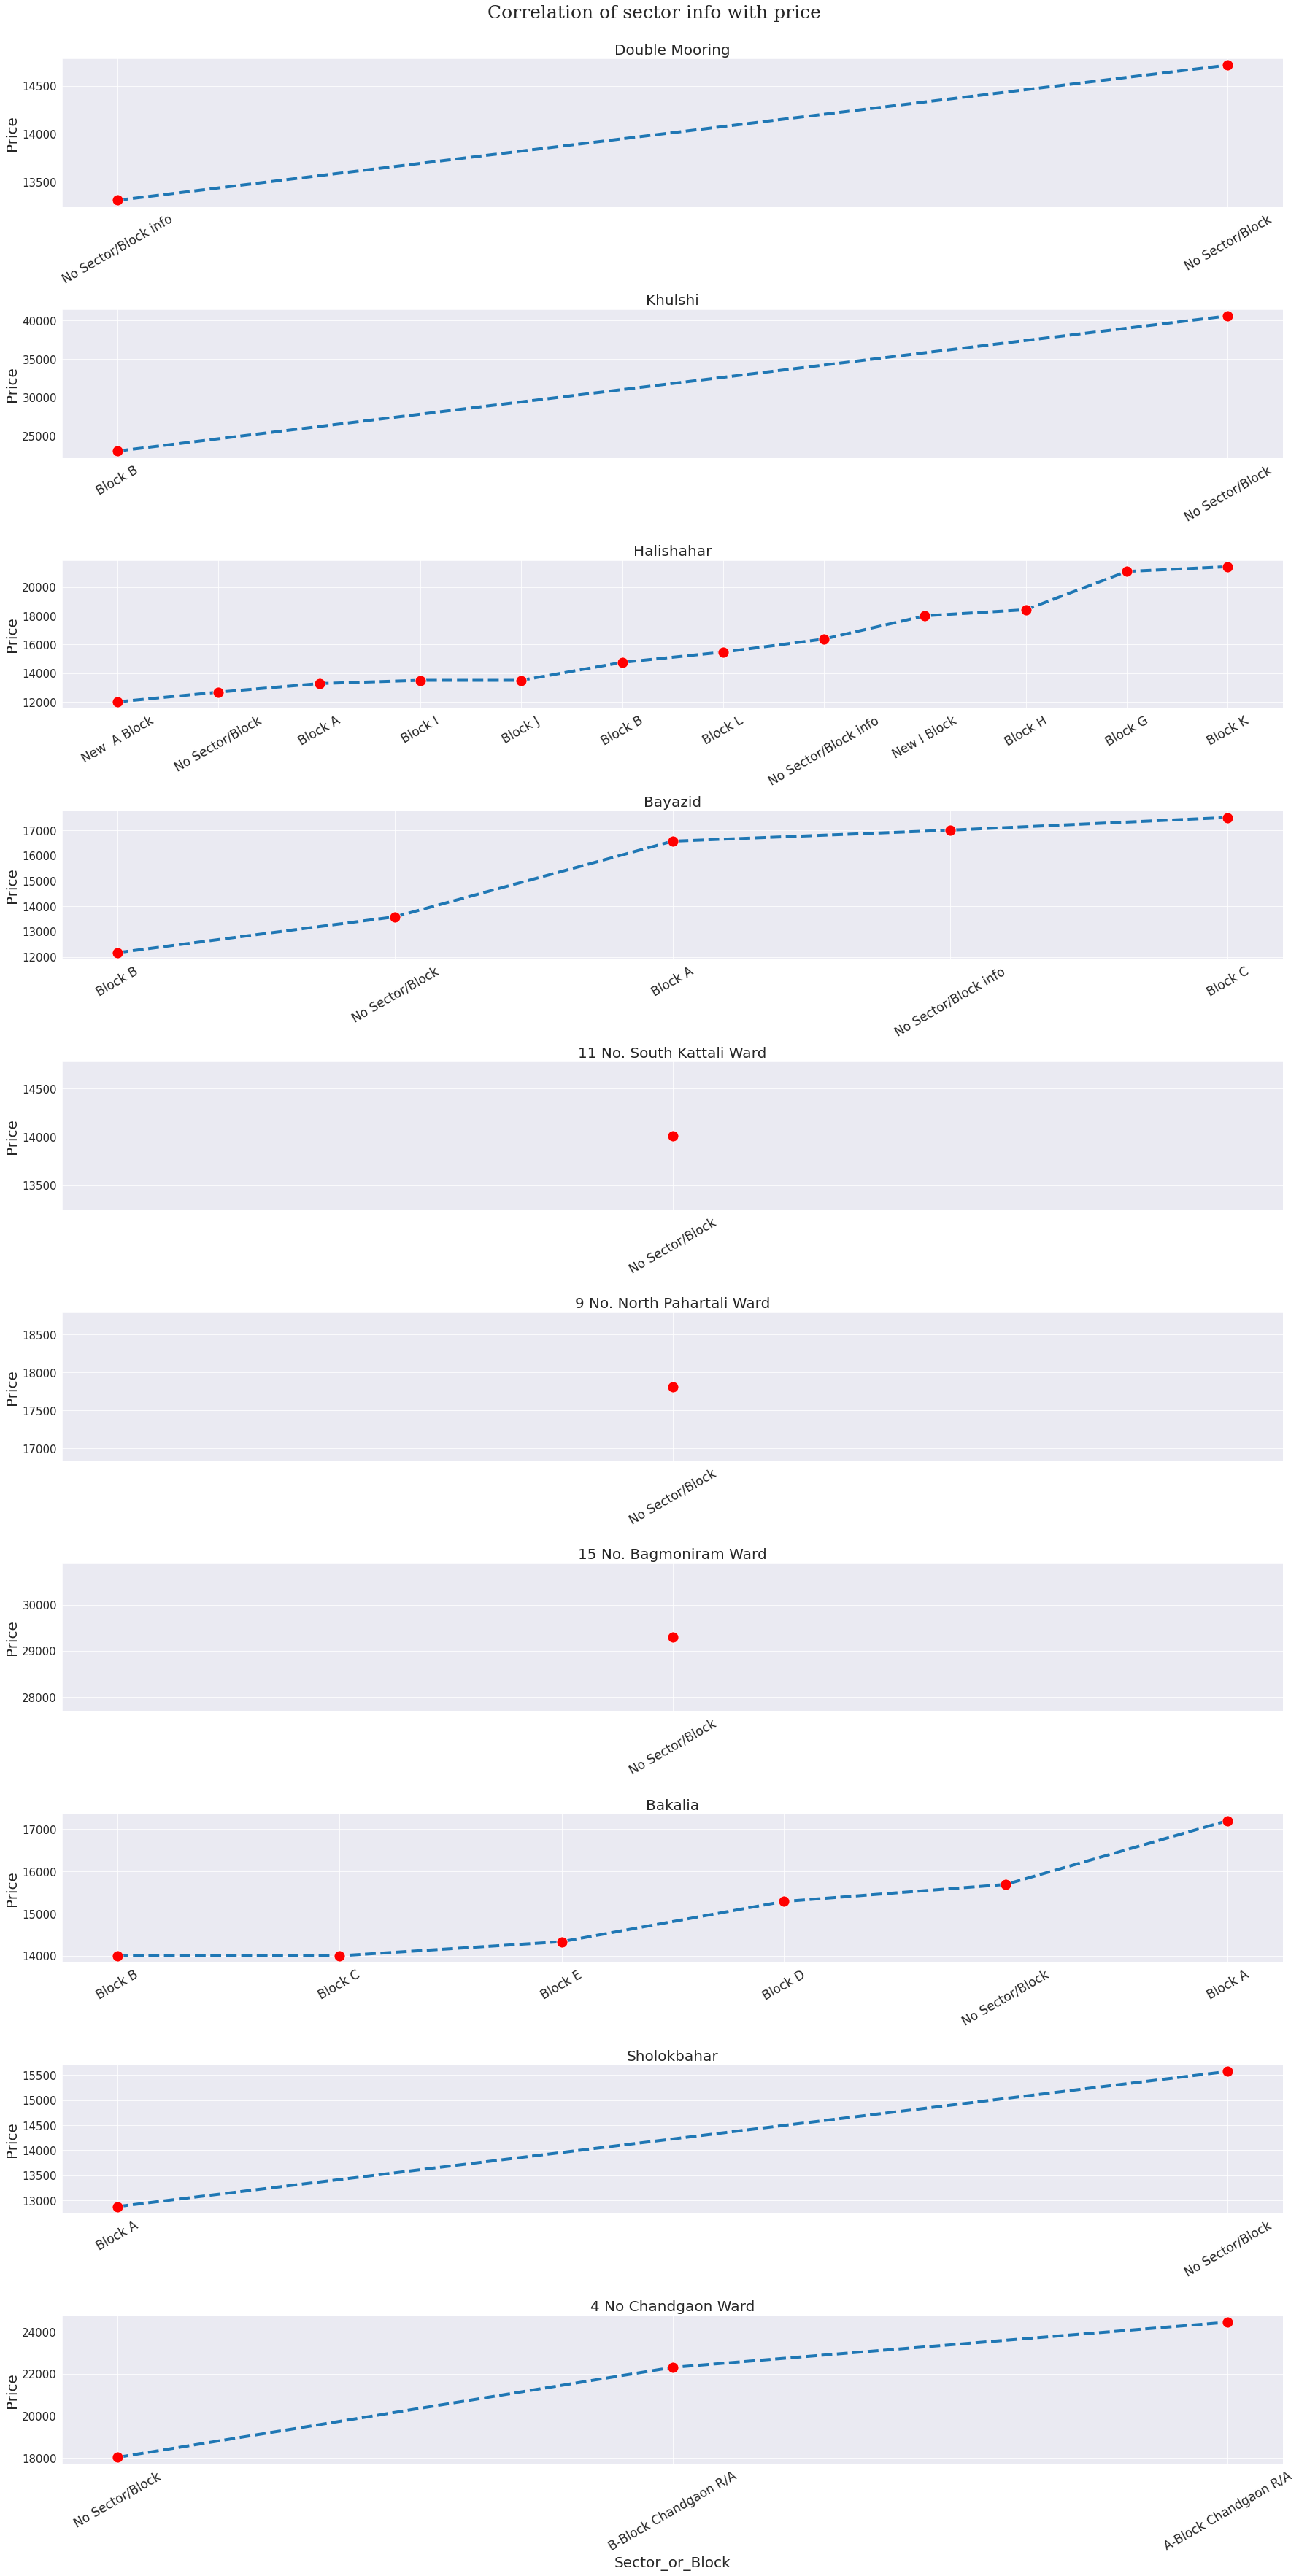

In [ ]:
with sns.axes_style('darkgrid'):
    n_rows, n_cols = (len(town_sector_table_ctg['Town'][:10]), 1)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 50))
    figure.suptitle("Correlation of sector info with price\n\n\n", fontsize=25,**title_font)

    for i, col in enumerate(town_sector_table_ctg['Town'][:10]):
        fig = sns.lineplot(
            data=pd.pivot_table(
                data=prop_data.loc[prop_data['Town'] == col],
                index=['Town', 'Sector_or_Block'],
                values='Price',
                aggfunc='mean'
            ).sort_values(by='Price', ascending=True).reset_index(),
            x='Sector_or_Block',
            y='Price',
            lw=4,
            linestyle='--',
            markers=True,
            marker='o',
            markersize=15,
            markerfacecolor='red',
            ax=axes[i]
        )
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Price', fontsize=20)
        axes[i].set_title(col, fontsize=20)
        # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, fontsize=17)
        axes[i].tick_params(axis='x', labelrotation=30, labelsize=17)
        # axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=15)
        # axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=15)
        axes[i].tick_params(axis='y', labelsize=15)

        # fig.set_xticklabels(fig.get_xticklabels(), rotation=90, fontsize=20)
        # fig.set_yticklabels(fig.get_yticks(), fontsize=20)

axes[i].set_xlabel('Sector_or_Block', fontsize=20)    
plt.tight_layout()
plt.show()

>> Did not find any conclusive evidence that supports that change of rent follows a particular sector or block order. 

## Heatmap

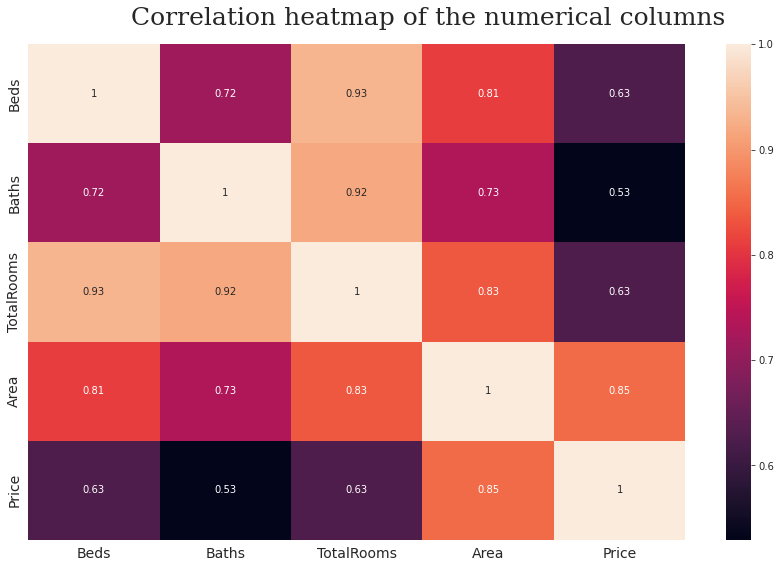

In [ ]:
with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(figsize=(12, 8))
    figure.suptitle("Correlation heatmap of the numerical columns", fontsize=25, **title_font)
    
    fig = sns.heatmap(prop_data.corr(), annot=True)
    
    axes.tick_params(axis='x', labelsize=14)
    axes.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

>> Every numerical variable is somewhat correlated to the price (target) variable. The 'Beds' and 'Baths' variable is highly correlated to the 'TotalRoom' varible, which is expected, because 'TotalRooms' was created by adding 'Beds' and 'Baths' variables

In [ ]:
beds_baths_table = pd.pivot_table(
        data=prop_data,
        index=['City', 'Beds', 'Baths'],
        values='Price',
        aggfunc=['mean', 'median', 'count']
)

In [ ]:
round(beds_baths_table, 2)

mean     median count
                            Price      Price Price
City       Beds Baths                             
Chattogram 1    1        10700.00    10000.0    36
                2        11500.00    11500.0     2
           2    1        10833.66    10500.0   101
                2        13222.84    12000.0   771
                3        20269.23    17000.0    13
                4        24000.00    24000.0     2
           3    1        23666.67    16000.0     3
                2        16304.56    15500.0   263
                3        23114.04    20000.0   844
                4        37352.17    32000.0   115
                5        34500.00    34500.0     2
           4    3        27875.00    25000.0    16
                4        59129.03    58000.0    31
                5        73750.00    80000.0    20
           5    4        38000.00    38000.0     1
                5        67500.00    67500.0     2
                6       200000.00   200000.0     1
           6    6       300000.00   300000.0     1
           7    8        70000.00    70000.0     1
Dhaka      1    1        11518.48    10000.0    92
                2        38666.67    21000.0     3
           2    1        11243.23    10500.0   155
                2        15826.83    15000.0  1373
                3        34035.71    22000.0    28
           3    2        17811.01    16000.0   545
                3        36406.95    25000.0  2085
                4        47721.04    35000.0   518
                5        60000.00    55000.0    11
           4    2        20000.00    20000.0     2
                3        40833.33    35000.0    60
                4       114332.28    75000.0   316
                5       158000.00   110000.0    69
           5    3       120000.00   120000.0     3
                4        93461.54    70000.0    13
                5       211481.48   130000.0    27
                6       371428.57   350000.0     7
                7       800000.00   800000.0     1
           6    6       301250.00   300000.0     4
                7       330000.00   330000.0     1
                8       525000.00   525000.0     2
           7    6       700000.00   700000.0     1
                7       550000.00   550000.0     1
                8       678571.43   650000.0     7
           17   10      350000.00   350000.0     1
           20   10      750000.00   750000.0     2
           21   10     1330000.00  1330000.0     2
           22   10      400000.00   400000.0     1
           32   10      500000.00   500000.0     1
           36   10     2000000.00  2000000.0     1

>> Let's create two tables, One for each cities

In [ ]:
beds_baths_dhaka = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == 'Dhaka'],
    index=['City', 'Type', 'Beds', 'Baths'],
    values='Price',
    aggfunc=['mean', 'median', 'count']
).sort_values(by=('count', 'Price'), ascending=False)

In [ ]:
round(beds_baths_dhaka, 2)

mean     median count
                                 Price      Price Price
City  Type      Beds Baths                             
Dhaka Apartment 3    3        36354.40    25000.0  2081
                2    2        15826.83    15000.0  1373
                3    2        17811.01    16000.0   545
                     4        47673.45    35000.0   516
                4    4       113598.07    75000.0   311
                2    1        11243.23    10500.0   155
                1    1        11518.48    10000.0    92
                4    5       152983.61   110000.0    61
                     3        40169.49    35000.0    59
                2    3        34035.71    22000.0    28
                5    5       159473.68   100000.0    19
                     4        74583.33    70000.0    12
                3    5        62200.00    55000.0    10
      Duplex    5    5       335000.00   265000.0     8
      Building  7    8       625000.00   625000.0     6
      Duplex    4    5       205000.00   212500.0     6
                     4       160000.00    90000.0     5
                5    6       230000.00   140000.0     5
                3    3        63750.00    60000.0     4
      Apartment 5    3       120000.00   120000.0     3
                1    2        38666.67    21000.0     3
      Building  21   10     1330000.00  1330000.0     2
                20   10      750000.00   750000.0     2
      Duplex    3    4        60000.00    60000.0     2
                6    6        77500.00    77500.0     2
      Building  4    5       170000.00   170000.0     2
      Duplex    6    8       525000.00   525000.0     2
      Apartment 4    2        20000.00    20000.0     2
      Duplex    5    7       800000.00   800000.0     1
                     4       320000.00   320000.0     1
                4    3        80000.00    80000.0     1
                7    6       700000.00   700000.0     1
      Building  7    7       550000.00   550000.0     1
      Duplex    3    5        38000.00    38000.0     1
      Building  36   10     2000000.00  2000000.0     1
                32   10      500000.00   500000.0     1
                22   10      400000.00   400000.0     1
                17   10      350000.00   350000.0     1
                6    7       330000.00   330000.0     1
                     6       550000.00   550000.0     1
                5    6      1000000.00  1000000.0     1
      Apartment 6    6       500000.00   500000.0     1
                5    6       450000.00   450000.0     1
      Duplex    7    8      1000000.00  1000000.0     1

>> In Dhaka, havng 3 beds and 3 baths is the most frequent typ of property. And average rent is 36354.40 BDT

>> We can also do the same thing for the city 'Chattogram'

In [ ]:
beds_baths_ctg = pd.pivot_table(
    data=prop_data.loc[prop_data['City'] == 'Chattogram'],
    index=['City', 'Type', 'Beds', 'Baths'],
    values='Price',
    aggfunc=['mean', 'median', 'count']
).sort_values(by=('count', 'Price'), ascending=False)

In [ ]:
round(beds_baths_ctg)

mean    median count
                                    Price     Price Price
City       Type      Beds Baths                          
Chattogram Apartment 3    3       23098.0   20000.0   842
                     2    2       13223.0   12000.0   771
                     3    2       16305.0   15500.0   263
                          4       37352.0   32000.0   115
                     2    1       10834.0   10500.0   101
                     1    1       10700.0   10000.0    36
                     4    4       59036.0   56500.0    28
                          5       73750.0   80000.0    20
                          3       27875.0   25000.0    16
                     2    3       20269.0   17000.0    13
           Duplex    4    4       60000.0   60000.0     3
           Apartment 3    1       23667.0   16000.0     3
                     5    5       67500.0   67500.0     2
           Duplex    3    3       30000.0   30000.0     2
           Apartment 3    5       34500.0   34500.0     2
                     1    2       11500.0   11500.0     2
                     2    4       24000.0   24000.0     2
                     5    4       38000.0   38000.0     1
           Building  7    8       70000.0   70000.0     1
           Duplex    5    6      200000.0  200000.0     1
                     6    6      300000.0  300000.0     1

>> Having 3 Beds and 3 Baths is also the most frequent type of property in 'Chattogram'. With the agv. rent of 23098.0 BDT. That's almost 13,000 Taka less than that of Dhaka. Well, of course Dhaka is the capital of Bangladesh. 

## Boxplot

In [ ]:
categoricals

['Type', 'Address', 'Sector_or_Block', 'Region', 'Town', 'City']

In [ ]:
len(numericals)

5

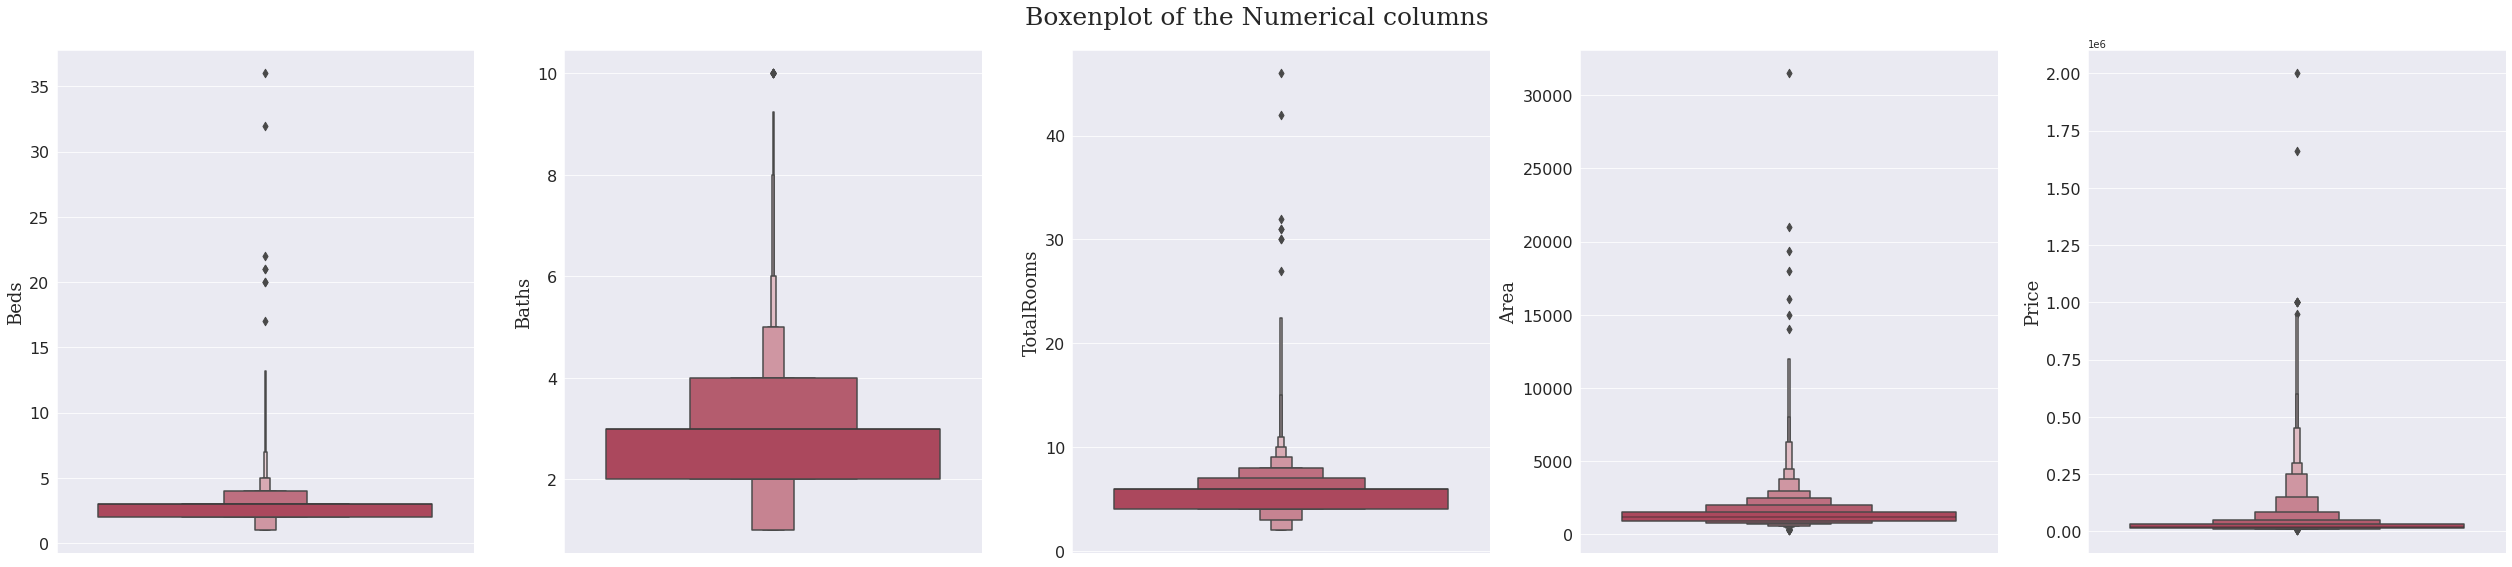

In [ ]:
with sns.axes_style('darkgrid'):
    n_rows, n_cols = (1, len(numericals))
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(35, 8))
    figure.suptitle("Boxenplot of the Numerical columns", fontsize=25, **title_font)

    for i, col in enumerate(numericals):
        fig = sns.boxenplot(
            data=prop_data,
            y=col,
            # x='Price',
            # hue='City',
            palette='inferno',
            ax=axes[i]
        )
        axes[i].set_ylabel(col, fontsize=18, **title_font)
        axes[i].tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.show()

outlier, anomaly, categorical conversion, model training


# Outliers

>> Let's drop some columns

In [ ]:
prop_data.drop(['Address', 'Sector_or_Block'], axis=1, inplace=True)

In [ ]:
prop_data

Beds  Baths  TotalRooms  Area       Type           Region  \
0        3      4           7  2200  Apartment  Bashundhara R-A   
1        3      4           7  1400  Apartment    South Khulshi   
2        3      4           7  1950  Apartment  Bashundhara R-A   
3        3      3           6  2000  Apartment           Uttara   
4        3      4           7  1650  Apartment  Bashundhara R-A   
...    ...    ...         ...   ...        ...              ...   
7552     4      4           8  3600     Duplex           Uttara   
7553     3      2           5   900  Apartment           Uttara   
7554     2      2           4  1000  Apartment           Uttara   
7555     3      4           7  3600  Apartment        Gulshan 1   
7556     4      4           8  2600  Apartment   Baridhara DOHS   

                 Town        City     Price  Town_enc  Region_enc  
0     Bashundhara R-A       Dhaka   50000.0        26           0  
1             Khulshi  Chattogram   30000.0        55           0  
2     Bashundhara R-A       Dhaka   30000.0        26           0  
3              Uttara       Dhaka   35000.0        94           0  
4     Bashundhara R-A       Dhaka   25000.0        26           0  
...               ...         ...       ...       ...         ...  
7552           Uttara       Dhaka   80000.0        94           0  
7553           Uttara       Dhaka   19000.0        94           0  
7554           Uttara       Dhaka   22000.0        94           0  
7555          Gulshan       Dhaka  175000.0        37           0  
7556   Baridhara DOHS       Dhaka   90000.0        24           0  

[7557 rows x 11 columns]

In [ ]:
# def find_outliers(df):
#     q1 = df.quantile(0.25)
#     q3 = df.quantile(0.75)

#     iqr = q3 - q1

#     outliers = df.loc[(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))]

#     return outliers

In [ ]:
# outliers = find_outliers(prop_data['Area'])
# outliers

In [ ]:
round(prop_data.describe(), 2)

Beds    Baths  TotalRooms      Area       Price  Town_enc  \
count  7557.00  7557.00     7557.00   7557.00     7557.00   7557.00   
mean      2.75     2.69        5.45   1372.03    34079.03     49.45   
std       0.98     0.90        1.74    956.76    64711.61     28.82   
min       1.00     1.00        2.00    300.00     5500.00      0.00   
25%       2.00     2.00        4.00    900.00    15000.00     26.00   
50%       3.00     3.00        6.00   1200.00    19000.00     38.00   
75%       3.00     3.00        6.00   1550.00    30000.00     66.00   
max      36.00    10.00       46.00  31500.00  2000000.00     95.00   

       Region_enc  
count     7557.00  
mean         3.18  
std          5.29  
min          0.00  
25%          0.00  
50%          1.00  
75%          4.00  
max         32.00

# Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

>> First, we encode the Town column

In [ ]:
oe = OrdinalEncoder(dtype=np.int32) # instantiate the LabelEncoder 
prop_data['Town_enc'] = oe.fit_transform(prop_data.loc[:, ['Town']])

In [ ]:
prop_data.loc[:, ['Town', 'Town_enc']].sort_values(by='Town_enc')

Town  Town_enc
3439  10 No. North Kattali Ward         0
66    10 No. North Kattali Ward         0
6615  10 No. North Kattali Ward         0
2357  10 No. North Kattali Ward         0
2354  10 No. North Kattali Ward         0
...                         ...       ...
6573                     Uttara        94
4915                     Uttara        94
1213                   Zafrabad        95
1214                   Zafrabad        95
7081                   Zafrabad        95

[7557 rows x 2 columns]

In [ ]:
prop_data.loc[:, 'Town_enc'].nunique()

96

In [ ]:
# oe.categories_

>> Next, we encode the Region column grouped by the Towns

In [ ]:
prop_data['Region_enc'] = prop_data.groupby('Town')['Region'].transform(lambda x: pd.factorize(x)[0])

In [ ]:
prop_data.loc[:, ['Region', 'Region_enc']]

Region  Region_enc
0     Bashundhara R-A           0
1       South Khulshi           0
2     Bashundhara R-A           0
3              Uttara           0
4     Bashundhara R-A           0
...               ...         ...
7552           Uttara           0
7553           Uttara           0
7554           Uttara           0
7555        Gulshan 1           0
7556   Baridhara DOHS           0

[7557 rows x 2 columns]

In [ ]:
prop_data

Beds  Baths  TotalRooms  Area       Type           Region  \
0        3      4           7  2200  Apartment  Bashundhara R-A   
1        3      4           7  1400  Apartment    South Khulshi   
2        3      4           7  1950  Apartment  Bashundhara R-A   
3        3      3           6  2000  Apartment           Uttara   
4        3      4           7  1650  Apartment  Bashundhara R-A   
...    ...    ...         ...   ...        ...              ...   
7552     4      4           8  3600     Duplex           Uttara   
7553     3      2           5   900  Apartment           Uttara   
7554     2      2           4  1000  Apartment           Uttara   
7555     3      4           7  3600  Apartment        Gulshan 1   
7556     4      4           8  2600  Apartment   Baridhara DOHS   

                 Town        City     Price  Town_enc  Region_enc  
0     Bashundhara R-A       Dhaka   50000.0        26           0  
1             Khulshi  Chattogram   30000.0        55           0  
2     Bashundhara R-A       Dhaka   30000.0        26           0  
3              Uttara       Dhaka   35000.0        94           0  
4     Bashundhara R-A       Dhaka   25000.0        26           0  
...               ...         ...       ...       ...         ...  
7552           Uttara       Dhaka   80000.0        94           0  
7553           Uttara       Dhaka   19000.0        94           0  
7554           Uttara       Dhaka   22000.0        94           0  
7555          Gulshan       Dhaka  175000.0        37           0  
7556   Baridhara DOHS       Dhaka   90000.0        24           0  

[7557 rows x 11 columns]

>> Let's drop the Town and Region columns from the dataframe

In [ ]:
prop_data.drop(['Town', 'Region'], axis=1, inplace=True)

>> Save the dataset

In [ ]:
prop_data.to_csv("/content/drive/MyDrive/Dataset/bd_housing_data/property_listing_data_in_Bangladesh_new_mod2.csv", index=False)

# Load the data set from here (Mod 2)

In [3]:
prop_data = pd.read_csv("/content/drive/MyDrive/Dataset/bd_housing_data/property_listing_data_in_Bangladesh_new_mod2.csv")

# Train Test split

In [4]:
# define random state

rs = 11

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_val_set = train_test_split(prop_data, test_size=0.15,
                                           random_state=rs, stratify=prop_data['City'])

In [6]:
print(f"train_set shape {train_set.shape}")
print(f"test_val_set shape {test_val_set.shape}")

train_set shape (6423, 9)
test_val_set shape (1134, 9)


In [7]:
# create a validaton and test set out of test_val_set of equal size

val_set, test_set = train_test_split(test_val_set, test_size=0.5,
                                     random_state=rs)

In [8]:
print(f"val_set shape {val_set.shape}")
print(f"test_set shape {test_set.shape}")

val_set shape (567, 9)
test_set shape (567, 9)


In [9]:
# Create X_train, y_train, X_test, y_test, X_val, y_val  out of train set, val_set, test_set

X_train, y_train = train_set.drop('Price', axis=1), train_set.loc[:, 'Price']   # For Trainig

X_val, y_val = val_set.drop('Price', axis=1), val_set.loc[:, 'Price']           # For validating, tuning

X_test, y_test = test_set.drop('Price', axis=1), test_set.loc[:, 'Price']       # For testing


In [10]:
X_train

Beds  Baths  TotalRooms  Area       Type        City  Town_enc  \
7507     3      3           6  2100  Apartment  Chattogram        55   
866      3      3           6  1200  Apartment       Dhaka        14   
3656     2      1           3   500  Apartment       Dhaka        30   
6319     3      2           5   900  Apartment       Dhaka        16   
6882     3      3           6  1600  Apartment       Dhaka        94   
...    ...    ...         ...   ...        ...         ...       ...   
6228     2      2           4   850  Apartment       Dhaka        63   
899      3      4           7  1750  Apartment       Dhaka        87   
1930     2      2           4   700  Apartment  Chattogram        38   
7314     4      4           8  2000  Apartment       Dhaka        26   
5749     2      2           4   700  Apartment       Dhaka        63   

      Region_enc  
7507           2  
866            2  
3656           9  
6319           1  
6882           5  
...          ...  
6228          19  
899            0  
1930           0  
7314           0  
5749          24  

[6423 rows x 8 columns]

# Pipelining

>> Pipeline the process of scaling and encoding categories

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

In [12]:
# create lists for categorical and numerical variables, this was done before,
# but as the dataframe was updated, needed to do it again

categoricals = []
numericals = []

for col in X_train.columns:
    if X_train[col].dtype == 'float64' or X_train[col].dtype == 'int64':
        numericals.append(col)
    else:
        categoricals.append(col)

In [13]:
print(categoricals)
print()
print(numericals)

['Type', 'City']

['Beds', 'Baths', 'TotalRooms', 'Area', 'Town_enc', 'Region_enc']


In [14]:
numericals = numericals[:-2]
print(numericals)

['Beds', 'Baths', 'TotalRooms', 'Area']


In [15]:
# define the Pipeline

full_transformer = ColumnTransformer(
    transformers=[
                  ("bin_encoder", OrdinalEncoder(dtype=np.int32), categoricals),
                  ("numerical", StandardScaler(), numericals)],
                 remainder='passthrough'
)

In [16]:
X_train = full_transformer.fit_transform(X_train.copy())
X_train.shape

(6423, 8)

In [17]:
full_transformer.get_feature_names_out()

array(['bin_encoder__Type', 'bin_encoder__City', 'numerical__Beds',
       'numerical__Baths', 'numerical__TotalRooms', 'numerical__Area',
       'remainder__Town_enc', 'remainder__Region_enc'], dtype=object)

In [18]:
X_train = pd.DataFrame(X_train,
                       columns=['Type_enc', 'City_enc', 'Beds', 'Baths',
                                'TotalRooms', 'Area', 'Town_enc', 'Region_enc'])

In [19]:
X_train

Type_enc  City_enc      Beds     Baths  TotalRooms      Area  Town_enc  \
0          0.0       0.0  0.242686  0.334111    0.309242  0.741051      55.0   
1          0.0       1.0  0.242686  0.334111    0.309242 -0.180625      14.0   
2          0.0       1.0 -0.761032 -1.881684   -1.398147 -0.897485      30.0   
3          0.0       1.0  0.242686 -0.773786   -0.259887 -0.487851      16.0   
4          0.0       1.0  0.242686  0.334111    0.309242  0.229009      94.0   
...        ...       ...       ...       ...         ...       ...       ...   
6418       0.0       1.0 -0.761032 -0.773786   -0.829017 -0.539055      63.0   
6419       0.0       1.0  0.242686  1.442009    0.878372  0.382621      87.0   
6420       0.0       0.0 -0.761032 -0.773786   -0.829017 -0.692668      38.0   
6421       0.0       1.0  1.246404  1.442009    1.447501  0.638643      26.0   
6422       0.0       1.0 -0.761032 -0.773786   -0.829017 -0.692668      63.0   

      Region_enc  
0            2.0  
1            2.0  
2            9.0  
3            1.0  
4            5.0  
...          ...  
6418        19.0  
6419         0.0  
6420         0.0  
6421         0.0  
6422        24.0  

[6423 rows x 8 columns]

>> Saving the pipeline

In [20]:
# # saving the pipeline, using joblib

import joblib

file_path = '/content/drive/MyDrive/Dataset/bd_housing_data/property_pipeline_new.sav'

joblib.dump(full_transformer, file_path)

['/content/drive/MyDrive/Dataset/bd_housing_data/property_pipeline_new.sav']

# Model Training

## Initial Setup

In [21]:
# transform the X_val and X_test

X_val = full_transformer.transform(X_val.copy())
X_test = full_transformer.transform(X_test.copy())

In [22]:
X_val = pd.DataFrame(X_val,
                       columns=['Type_enc', 'City_enc', 'Beds', 'Baths',
                                'TotalRooms', 'Area', 'Town_enc', 'Region_enc'])
X_test = pd.DataFrame(X_test,
                       columns=['Type_enc', 'City_enc', 'Beds', 'Baths',
                                'TotalRooms', 'Area', 'Town_enc', 'Region_enc'])

## Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=rs)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=11)

>> Feature importances

In [60]:
for i, j in zip(dt_reg.feature_names_in_, dt_reg.feature_importances_):
    print(f"Feature importance of {i}: {j}")

Feature importance of Type_enc: 0.00637701019040603
Feature importance of City_enc: 0.001131079354780009
Feature importance of Beds: 0.03158280713368902
Feature importance of Baths: 0.009648709354451265
Feature importance of TotalRooms: 0.030393545263932942
Feature importance of Area: 0.8556908041283185
Feature importance of Town_enc: 0.05850330840555825
Feature importance of Region_enc: 0.006672736168864029


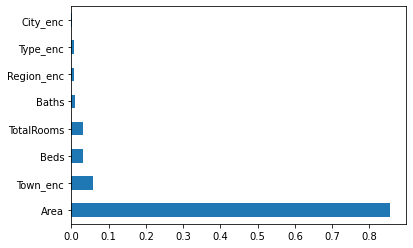

In [61]:
feat_importances = pd.Series(dt_reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [62]:
dt_train_pred = dt_reg.predict(X_train)

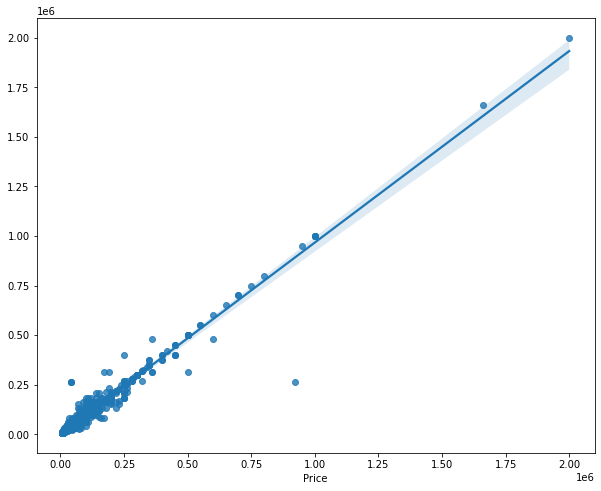

In [63]:
# let's plot this 
plt.figure(figsize=(10, 8))

sns.regplot(x=y_train, y=dt_train_pred)
plt.show()

## Model Evaluation

In [64]:
# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [65]:
print(f"MAE:     {mean_absolute_error(y_train, dt_train_pred)}")
print(f"MSE:     {mean_squared_error(y_train, dt_train_pred)}")
print(f"RMSE:    {sqrt(mean_squared_error(y_train, dt_train_pred))}")
print(f"R2:      {r2_score(y_train, dt_train_pred)}")

MAE:     2349.098348558819
MSE:     153581929.71678376
RMSE:    12392.817666567347
R2:      0.9657294180974524


## On validation set

In [66]:
y_val_pred = dt_reg.predict(X_val)

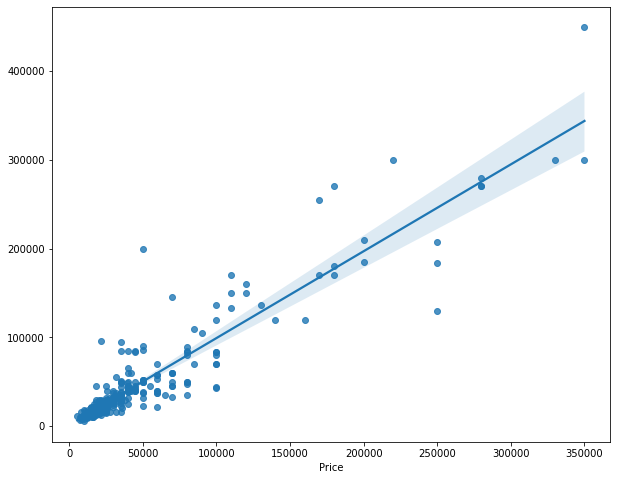

In [67]:
# let's plot this 
plt.figure(figsize=(10, 8))

sns.regplot(x=y_val, y=y_val_pred)
plt.show()

In [68]:
print(f"MAE:     {mean_absolute_error(y_val, y_val_pred)}")
print(f"MSE:     {mean_squared_error(y_val, y_val_pred)}")
print(f"RMSE:    {sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"R2:      {r2_score(y_val, y_val_pred)}")

MAE:     6556.158980307638
MSE:     265183963.64462107
RMSE:    16284.470014238139
R2:      0.8619653810068959


>> Eval on test set + try some other ML models + some hyper tuning perhaps

>> Let's see how this perform on the test set

In [69]:
y_test_pred = dt_reg.predict(X_test)

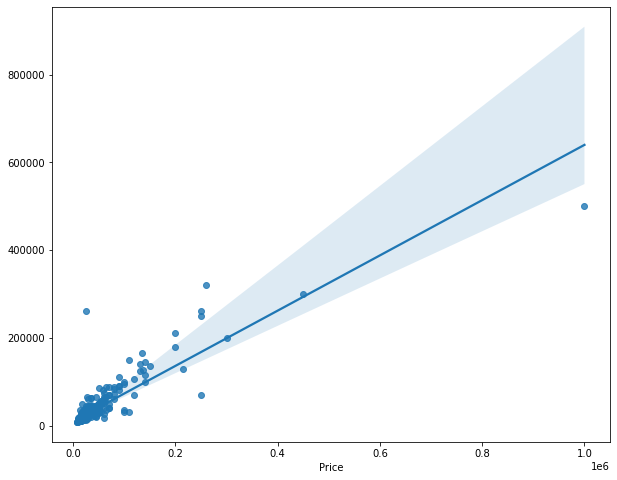

In [70]:
# let's plot this 
plt.figure(figsize=(10, 8))

sns.regplot(x=y_test, y=y_test_pred)
plt.show()

In [71]:
print(f"MAE:     {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE:     {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE:    {sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R2:      {r2_score(y_test, y_test_pred)}")

MAE:     6776.882255994523
MSE:     764928756.1843696
RMSE:    27657.345429096582
R2:      0.7539414352230372


>> Cross Validating

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

In [77]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Scores, Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

display_scores(rmse_scores)

Scores: [34231.06807582 27326.28741555 35519.97571847 45092.3155102
 57806.19541929]
Scores, Mean: 39995.168427864206
Standard Deviation: 10554.300920735252


>> Let's train only using the important features, declared by the Decision Tree Regressor model

# With important features

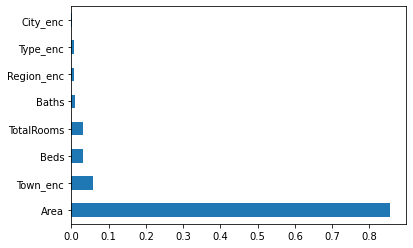

In [36]:
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [37]:
X_train_imp_feat = X_train[['Area', 'Town_enc', 'TotalRooms', 'Beds']]

In [47]:
X_val_imp_feat = X_val[['Area', 'Town_enc', 'TotalRooms', 'Beds']]
X_test_imp_feat = X_test[['Area', 'Town_enc', 'TotalRooms', 'Beds']]

In [41]:
dt_reg_1 = DecisionTreeRegressor(random_state=rs)
dt_reg_1.fit(X_train_imp_feat, y_train)

DecisionTreeRegressor(random_state=11)

In [42]:
y_train_imp_feat_pred = dt_reg_1.predict(X_train_imp_feat)

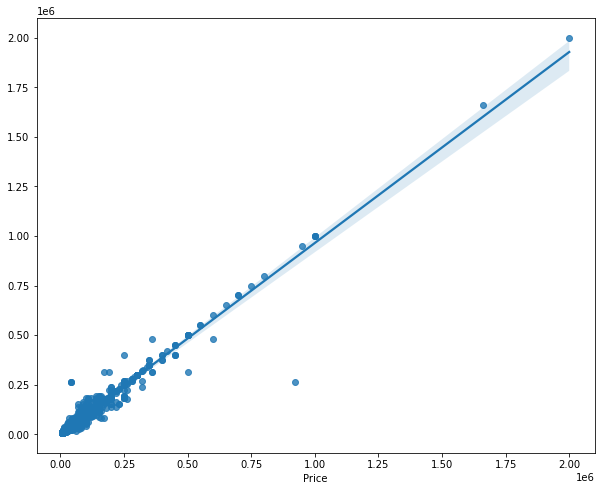

In [43]:
# let's plot this 
plt.figure(figsize=(10, 8))

sns.regplot(x=y_train, y=y_train_imp_feat_pred)
plt.show()

In [44]:
print(f"MAE:     {mean_absolute_error(y_train, y_train_imp_feat_pred)}")
print(f"MSE:     {mean_squared_error(y_train, y_train_imp_feat_pred)}")
print(f"RMSE:    {sqrt(mean_squared_error(y_train, y_train_imp_feat_pred))}")
print(f"R2:      {r2_score(y_train, y_train_imp_feat_pred)}")

MAE:     2957.8055146517654
MSE:     164506537.31108397
RMSE:    12826.010186768292
R2:      0.9632916791003967


In [82]:
scores = cross_val_score(dt_reg_1, X_train_imp_feat, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

In [83]:
display_scores(rmse_scores)

Scores: [34480.68744022 27160.19020757 34405.64718331 40270.74950819
 56110.56008016]
Scores, Mean: 38485.566883890235
Standard Deviation: 9744.498172329651


## Validaton set

In [48]:
y_val_imp_feat_pred = dt_reg_1.predict(X_val_imp_feat)

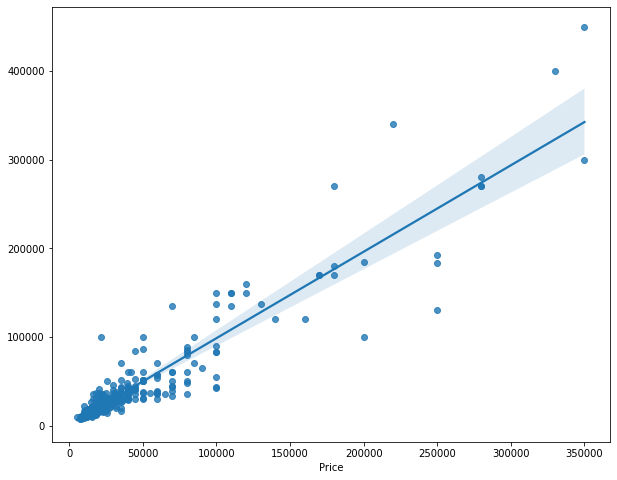

In [49]:
# let's plot this 
plt.figure(figsize=(10, 8))

sns.regplot(x=y_val, y=y_val_imp_feat_pred)
plt.show()

In [50]:
print(f"MAE:     {mean_absolute_error(y_val, y_val_imp_feat_pred)}")
print(f"MSE:     {mean_squared_error(y_val, y_val_imp_feat_pred)}")
print(f"RMSE:    {sqrt(mean_squared_error(y_val, y_val_imp_feat_pred))}")
print(f"R2:      {r2_score(y_val, y_val_imp_feat_pred)}")

MAE:     6439.222087342237
MSE:     241215167.4979539
RMSE:    15531.103228616887
R2:      0.8744417147880079


>> Bit of improvement from the previous evaluation on the validation set

>> Test set

In [56]:
y_test_imp_feat_pred = dt_reg_1.predict(X_test_imp_feat)

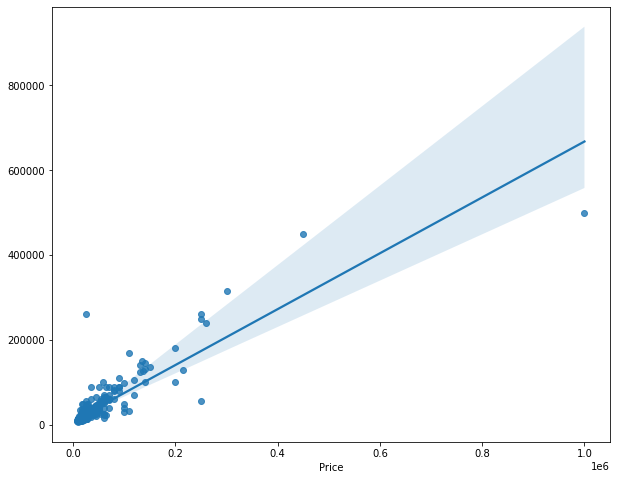

In [57]:
# let's plot this 
plt.figure(figsize=(10, 8))

sns.regplot(x=y_test, y=y_test_imp_feat_pred)
plt.show()

In [58]:
print(f"MAE:     {mean_absolute_error(y_test, y_test_imp_feat_pred)}")
print(f"MSE:     {mean_squared_error(y_test, y_test_imp_feat_pred)}")
print(f"RMSE:    {sqrt(mean_squared_error(y_test, y_test_imp_feat_pred))}")
print(f"R2:      {r2_score(y_test, y_test_imp_feat_pred)}")

MAE:     6997.226371143475
MSE:     747273321.1627456
RMSE:    27336.300429332892
R2:      0.759620749756333


## Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

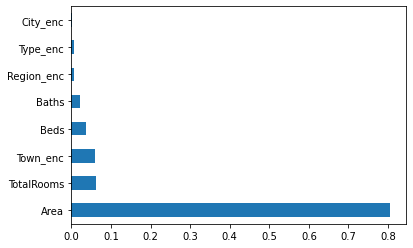

In [87]:
feat_importances = pd.Series(forest_reg.feature_importances_, index=forest_reg.feature_names_in_)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [88]:
forest_train_pred = forest_reg.predict(X_train)

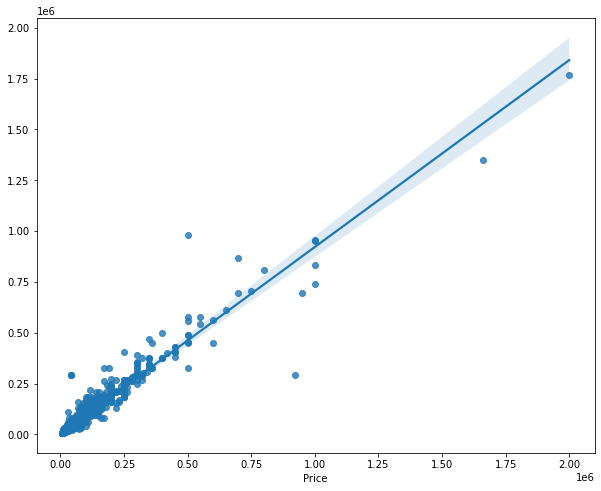

In [89]:
# let's plot this 
plt.figure(figsize=(10, 8))

sns.regplot(x=y_train, y=forest_train_pred)
plt.show()

In [90]:
print(f"MAE:     {mean_absolute_error(y_train, forest_train_pred)}")
print(f"MSE:     {mean_squared_error(y_train, forest_train_pred)}")
print(f"RMSE:    {sqrt(mean_squared_error(y_train, forest_train_pred))}")
print(f"R2:      {r2_score(y_train, forest_train_pred)}")

MAE:     3993.932806716566
MSE:     275386796.3222383
RMSE:    16594.782201711427
R2:      0.938549634220346


In [91]:
scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

In [92]:
display_scores(rmse_scores)

Scores: [31005.98379483 23035.33846269 28797.65002054 44530.56751296
 40331.63273998]
Scores, Mean: 33540.23450620142
Standard Deviation: 7825.316411825663


In [98]:
mae_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=5)
display_scores(-mae_scores)

Scores: [7675.04984641 5660.14209954 8060.24618584 8236.27418021 8241.45302568]
Scores, Mean: 7574.63306753528
Standard Deviation: 979.1421873512352


>> It's better than the Decision Trees

## On validation set

In [93]:
forest_val_pred = forest_reg.predict(X_val)

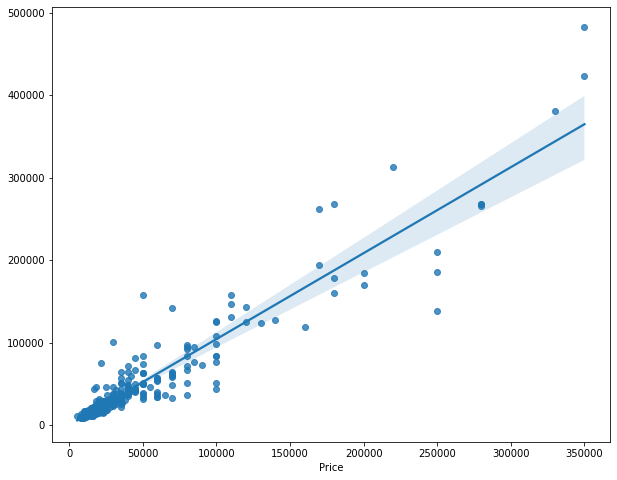

In [94]:
# let's plot this 
plt.figure(figsize=(10, 8))

sns.regplot(x=y_val, y=forest_val_pred)
plt.show()

In [95]:
print(f"MAE:     {mean_absolute_error(y_val, forest_val_pred)}")
print(f"MSE:     {mean_squared_error(y_val, forest_val_pred)}")
print(f"RMSE:    {sqrt(mean_squared_error(y_val, forest_val_pred))}")
print(f"R2:      {r2_score(y_val, forest_val_pred)}")

MAE:     6179.792177772628
MSE:     241329380.6387831
RMSE:    15534.779710017876
R2:      0.8743822641064445


# Rough

In [ ]:
# with sns.axes_style('darkgrid'):
#     n_rows, n_cols = (1, len(numericals))
#     figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(35, 8))
#     figure.suptitle("Boxenplot of the Numerical columns", fontsize=25, **title_font)

#     for i, col in enumerate(numericals):
#         fig = sns.boxenplot(
#             data=prop_data,
#             y=col,
#             x='Price',
#             hue='City',
#             palette='inferno',
#             ax=axes[i]
#         )
#         axes[i].set_ylabel(col, fontsize=12, **title_font)


# plt.tight_layout()
# plt.show()

In [ ]:
# sns.scatterplot(data=prop_data.loc[prop_data['City'] == 'Dhaka'],
#                             x='Beds',
#                             y='Baths', 
#                             palette='BrBG',
#                             size='TotalRooms',
#                             hue='TotalRooms',
#                             sizes=(30, 300),
#                             # ax=axes[i]
#                             )

In [ ]:
# with sns.axes_style('darkgrid'):
#     # figure, axes = plt.subplots(figsize=(15, 10))

#     fig = sns.jointplot(
#             data=prop_data,
#             x='Beds',
#             y='Baths',
#             # hue='Price',
#             kind='reg',
#             height=10, 
#             ratio=10
#     )

#     fig2 = sns.scatterplot(
#         data=prop_data,
#         x='Beds',
#         y='Baths',
#         hue='Price',
#         palette='husl',
#         ax=fig.ax_joint
#     )

# plt.show()